#### Initializations

In [1]:
library(tidyverse)
library(lme4)
library(lattice)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




In [2]:
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
options(bitmapType = "cairo")
library(showtext)
font_add_google("Lato", "lato")
showtext_opts(dpi = 300)
showtext_auto()


Loading required package: sysfonts

Loading required package: showtextdb



### Simple Linear Mixed Effect Models

#### Model Description Interpretation

In [3]:
# See dataset
Dyestuff %>% head()
Dyestuff %>% summary()

Batch Yield
1 A     1545 
2 A     1440 
3 A     1440 
4 A     1520 
5 A     1580 
6 B     1540

 Batch     Yield     
 A:5   Min.   :1440  
 B:5   1st Qu.:1469  
 C:5   Median :1530  
 D:5   Mean   :1528  
 E:5   3rd Qu.:1575  
 F:5   Max.   :1635  

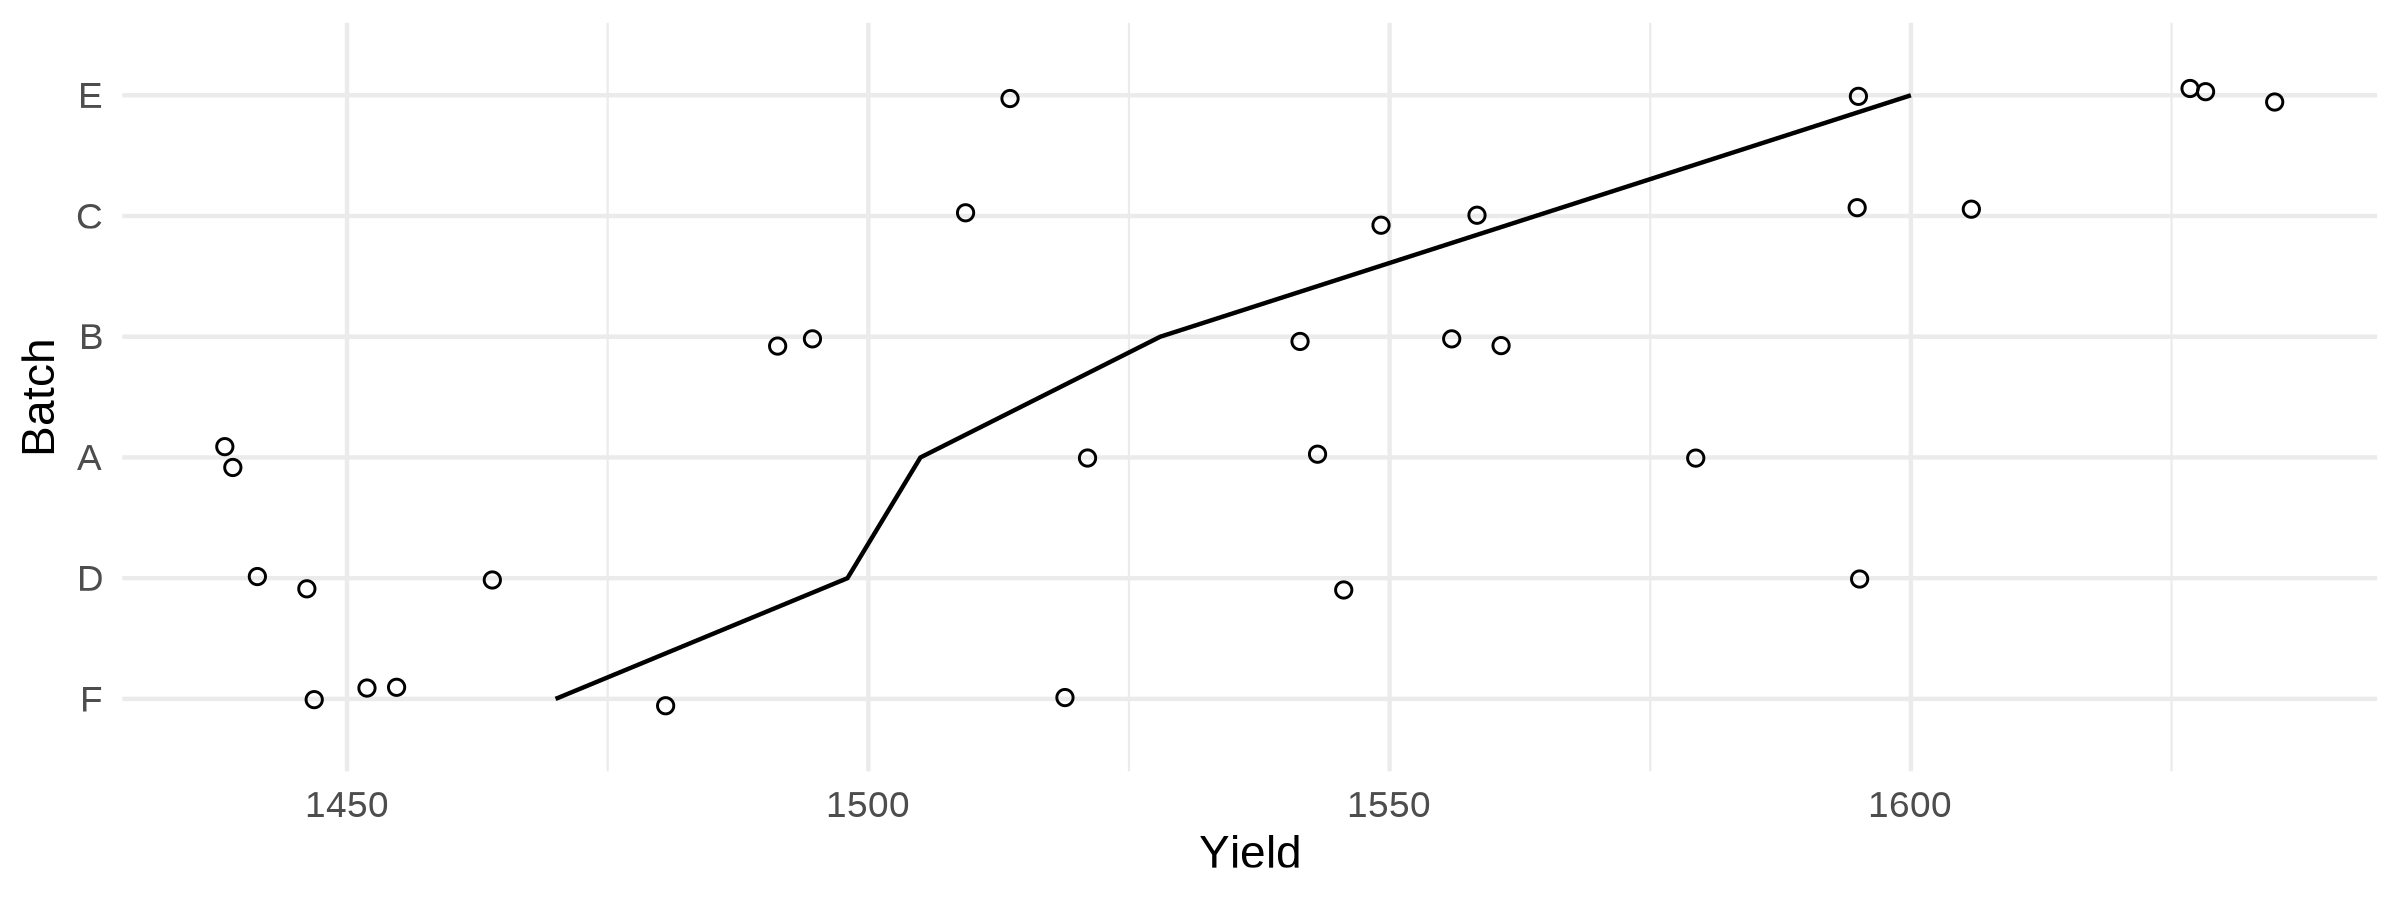

In [4]:
mean_dyestuff <- Dyestuff %>%
    group_by(Batch) %>%
    summarise(Yield = mean(Yield), .groups = "drop")

options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
Dyestuff %>%
    mutate(Batch = fct_reorder(Batch, Yield, mean)) %>%
    ggplot(aes(x = Yield, y = Batch)) +
    geom_jitter(shape = 21, height = 0.1) +
    geom_line(data=mean_dyestuff, aes(group = 1)) +
    theme_minimal()

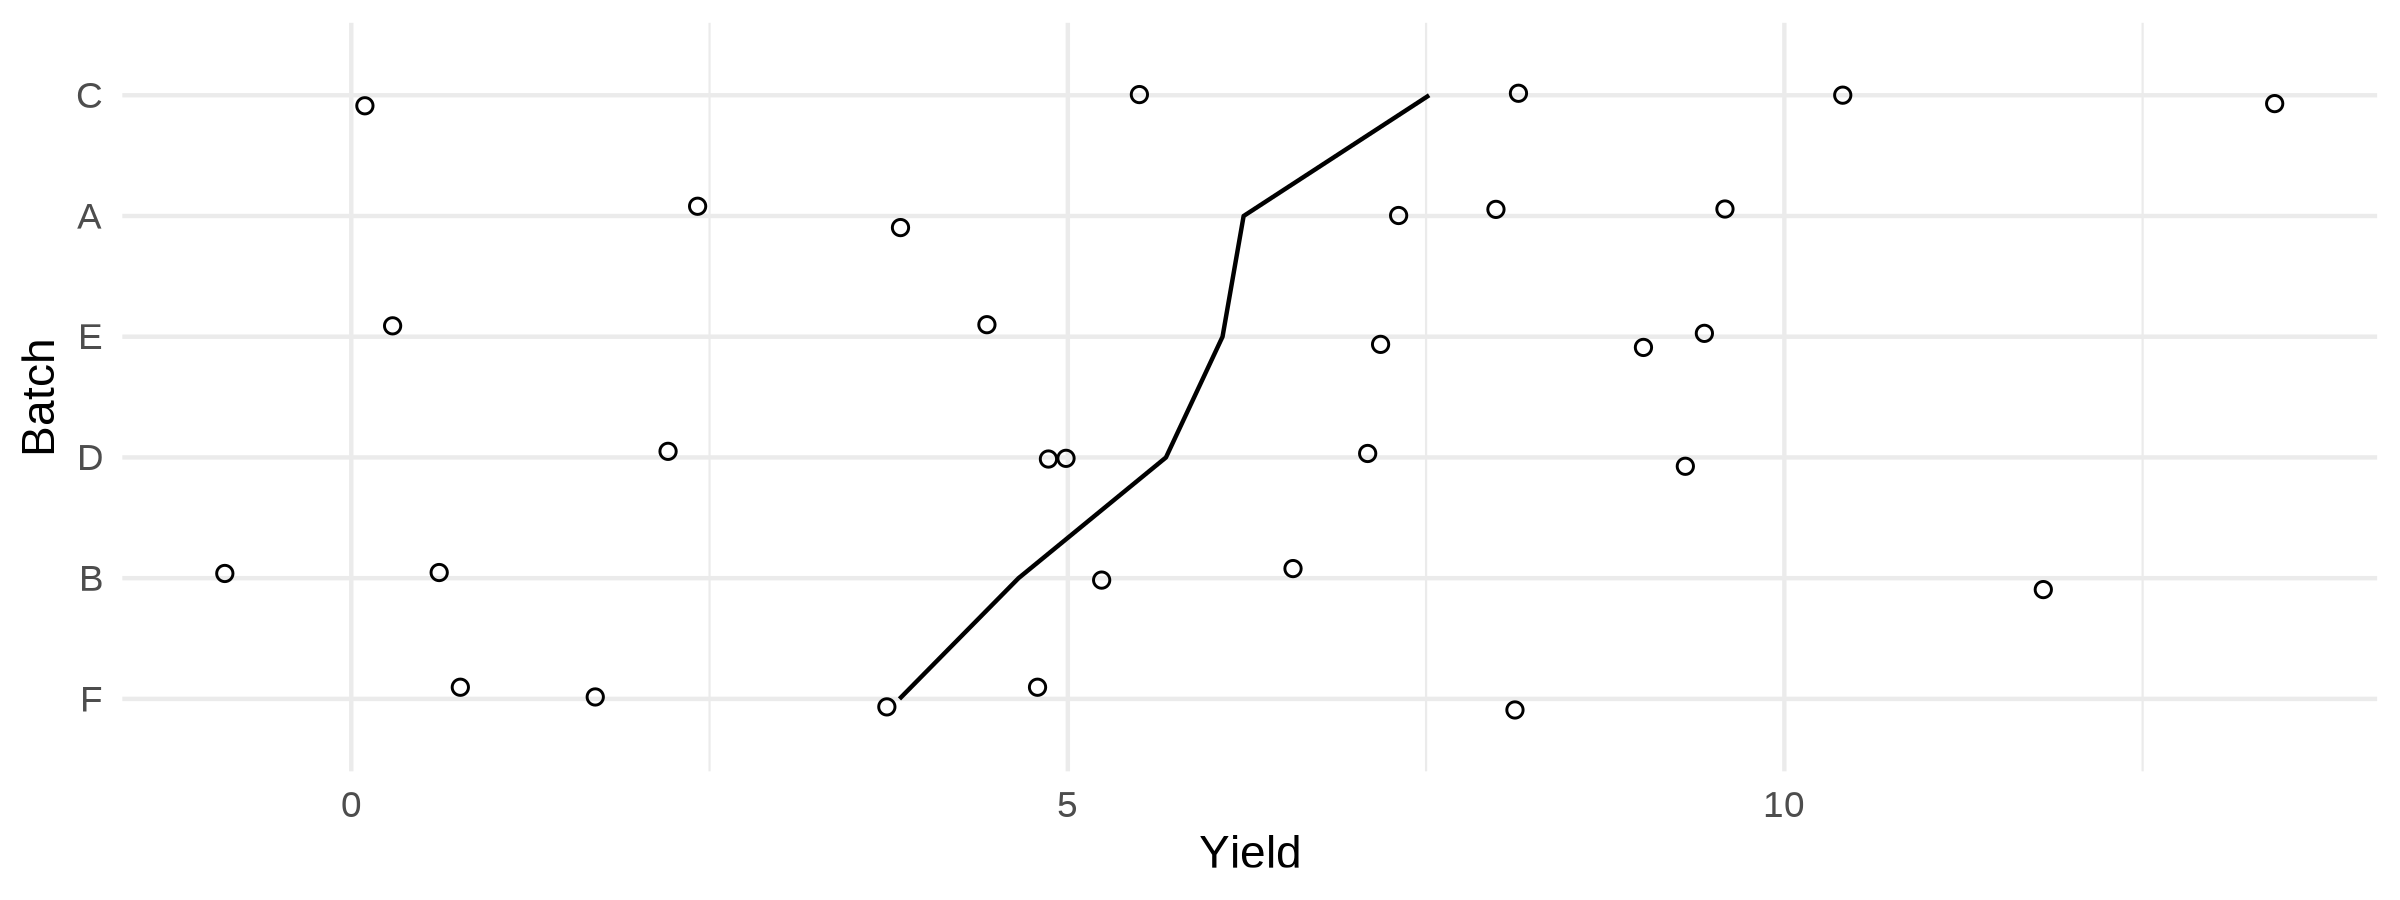

In [5]:
mean_dyestuff <- Dyestuff2 %>%
    group_by(Batch) %>%
    summarise(Yield = mean(Yield), .groups = "drop")

options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
Dyestuff2 %>%
    mutate(Batch = fct_reorder(Batch, Yield, mean)) %>%
    ggplot(aes(x = Yield, y = Batch)) +
    geom_jitter(shape = 21, height = 0.1) +
    geom_line(data=mean_dyestuff, aes(group = 1)) +
    theme_minimal()


In [6]:
# Comparison of REML and ML
# REML estimates fixed effects and variance components independently
# ML estimates fixed effects and variance components jointly
fm01 <- lmer(formula = Yield ~ 1 + (1 | Batch), data = Dyestuff)
fm01 %>% summary()
fm01ML <- lmer(formula = Yield ~ 1 + (1 | Batch), data = Dyestuff, REML = FALSE)
fm01ML %>% summary()

Linear mixed model fit by REML ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff

REML criterion at convergence: 319.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4117 -0.7634  0.1418  0.7792  1.8296 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept) 1764     42.00   
 Residual             2451     49.51   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1527.50      19.38    78.8

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff

      AIC       BIC    logLik -2*log(L)  df.resid 
    333.3     337.5    -163.7     327.3        27 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4315 -0.7972  0.1480  0.7721  1.8037 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept) 1388     37.26   
 Residual             2451     49.51   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1527.50      17.69   86.33

In [7]:
# degenerate case but to show variance would be 0.
fm02 <- lmer(formula = Yield ~ 1 + (1 | Batch), data = Dyestuff2)
fm02 %>% summary()

fm02ML <- update(fm02, REML = FALSE)
fm02ML %>% summary()

boundary (singular) fit: see help('isSingular')



Linear mixed model fit by REML ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff2

REML criterion at convergence: 161.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7648 -0.7806 -0.0809  0.6689  2.0907 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept)  0.00    0.000   
 Residual             13.81    3.716   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)   5.6656     0.6784   8.352
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


boundary (singular) fit: see help('isSingular')



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Yield ~ 1 + (1 | Batch)
   Data: Dyestuff2

      AIC       BIC    logLik -2*log(L)  df.resid 
    168.9     173.1     -81.4     162.9        27 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.79501 -0.79398 -0.08228  0.68033  2.12645 

Random effects:
 Groups   Name        Variance Std.Dev.
 Batch    (Intercept)  0.00    0.000   
 Residual             13.35    3.653   
Number of obs: 30, groups:  Batch, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)    5.666      0.667   8.494
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see help('isSingular')


In [8]:
# Std err is same with the one from the model with REML.
fm02a <- lm(formula = Yield ~ 1, data = Dyestuff2)
fm02a %>% summary()


Call:
lm(formula = Yield ~ 1, data = Dyestuff2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5576 -2.9006 -0.3006  2.4854  7.7684 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6656     0.6784   8.352 3.32e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.716 on 29 degrees of freedom


In [9]:
fm01ML <- lmer(formula = Yield ~ 1 | Batch, data = Dyestuff, REML=FALSE, verbose=10L)
# function converges after 17 function evalutions
# sigma_1 is the std of the random effects
# sigma is the std of the residual
# scalar parameter x, which corresponds to theta, is the ratio sigma_1/sigma.

iteration: 1
	x = 0.978761
	f(x) = 327.702651
iteration: 2
	x = 1.712831
	f(x) = 330.862957
iteration: 3
	x = 0.244690
	f(x) = 330.713159
iteration: 4
	x = 0.969851
	f(x) = 327.676769
iteration: 5
	x = 0.951499
	f(x) = 327.625677
iteration: 6
	x = 0.914795
	f(x) = 327.533201
iteration: 7
	x = 0.841388
	f(x) = 327.393682
iteration: 8
	x = 0.804405
	f(x) = 327.350630
iteration: 9
	x = 0.799259
	f(x) = 327.346284
iteration: 10
	x = 0.791919
	f(x) = 327.340817
iteration: 11
	x = 0.784578
	f(x) = 327.336231
iteration: 12
	x = 0.769897
	f(x) = 327.329787
iteration: 13
	x = 0.743360
	f(x) = 327.327854
iteration: 14
	x = 0.751624
	f(x) = 327.327068
iteration: 15
	x = 0.744283
	f(x) = 327.327703
iteration: 16
	x = 0.752659
	f(x) = 327.327060
iteration: 17
	x = 0.753393
	f(x) = 327.327066
iteration: 18
	x = 0.752581
	f(x) = 327.327060
iteration: 19
	x = 0.752508
	f(x) = 327.327060
iteration: 20
	x = 0.752581
	f(x) = 327.327060


6 x 6 sparse Matrix of class "dgCMatrix"
                                                                
[1,] 0.7525807 .         .         .         .         .        
[2,] .         0.7525807 .         .         .         .        
[3,] .         .         0.7525807 .         .         .        
[4,] .         .         .         0.7525807 .         .        
[5,] .         .         .         .         0.7525807 .        
[6,] .         .         .         .         .         0.7525807

[1] 0.7525807 0.7525807 0.7525807 0.7525807 0.7525807 0.7525807

[1] -22.0949351   0.4909986  35.8428948 -28.9689150  71.1947910 -56.4648343

[1] 1527.5

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

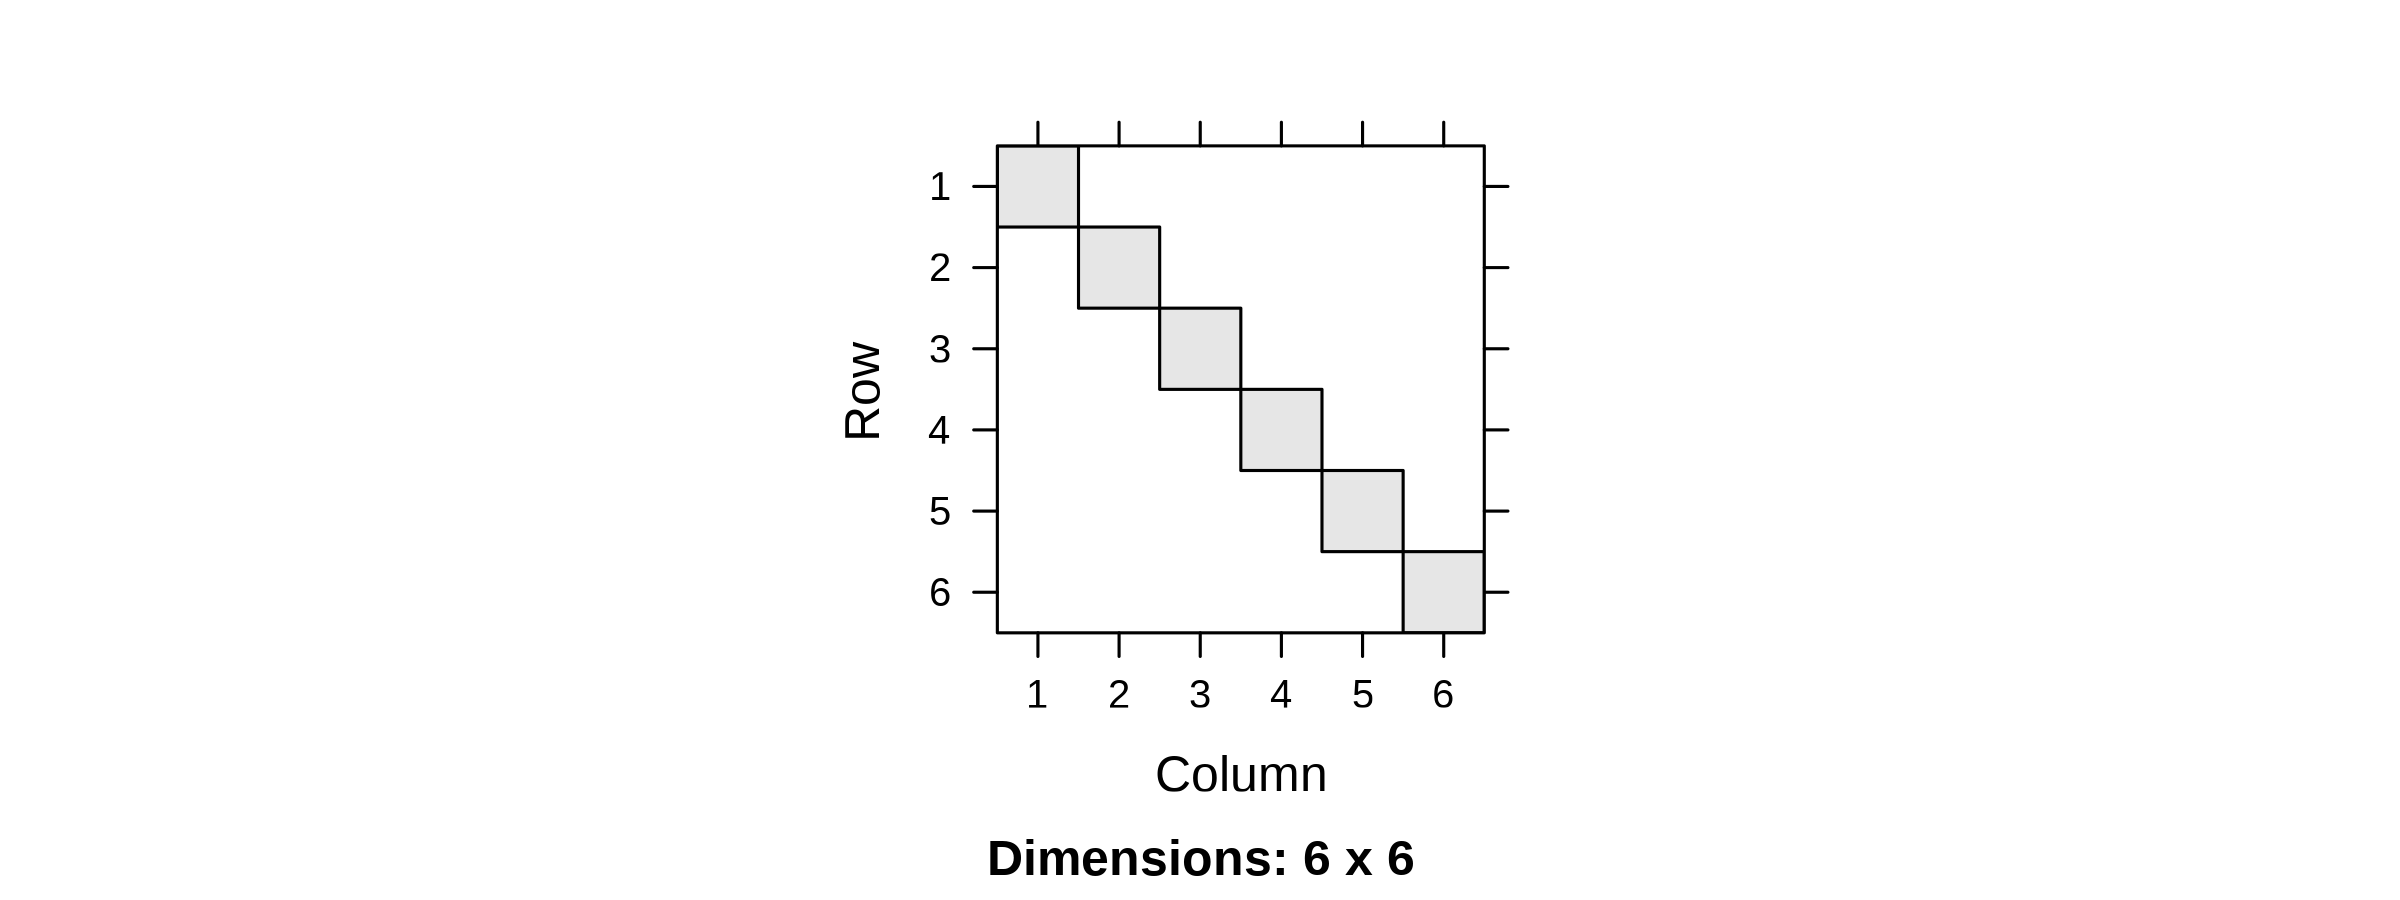

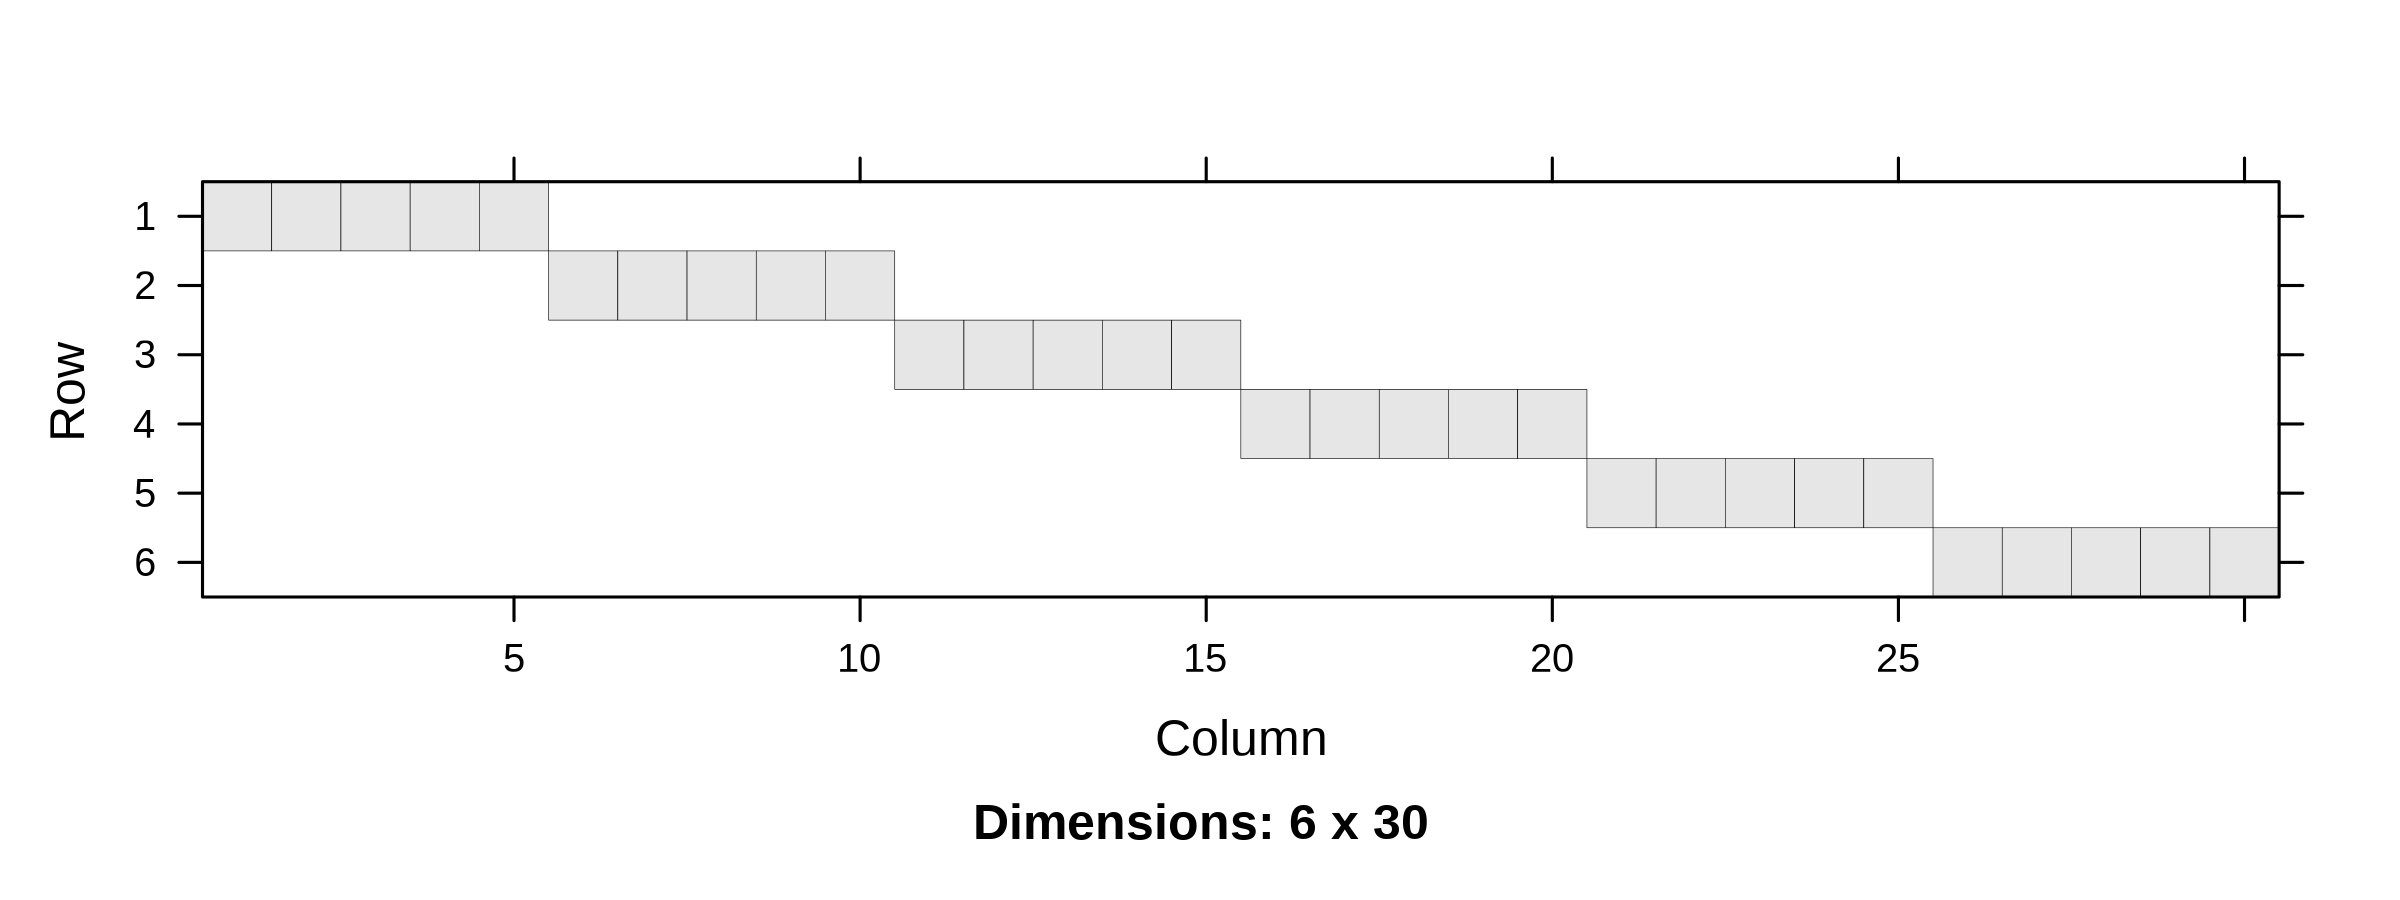

In [10]:
fm01ML %>% getME("Lambda") # covariance factor -- theta * I_6.

fm01ML %>% getME("Lambda") %>% diag()
fm01ML %>% getME("L") %>% image() # Cholesky factor L
fm01ML %>% getME("u") 
fm01ML %>% getME("beta")
fm01ML %>% getME("X") %>% .[1:length(.)]
fm01ML %>% getME("Z") %>% t() %>% image() # indicator columns of batch
# images would be better to understand as humans are not capable of big compherension for big sparse matrices

#### Profiling a model

2.5 %      97.5 %    
.sig01        12.19854   84.06305
.sigma        38.22998   67.65770
(Intercept) 1486.45150 1568.54849

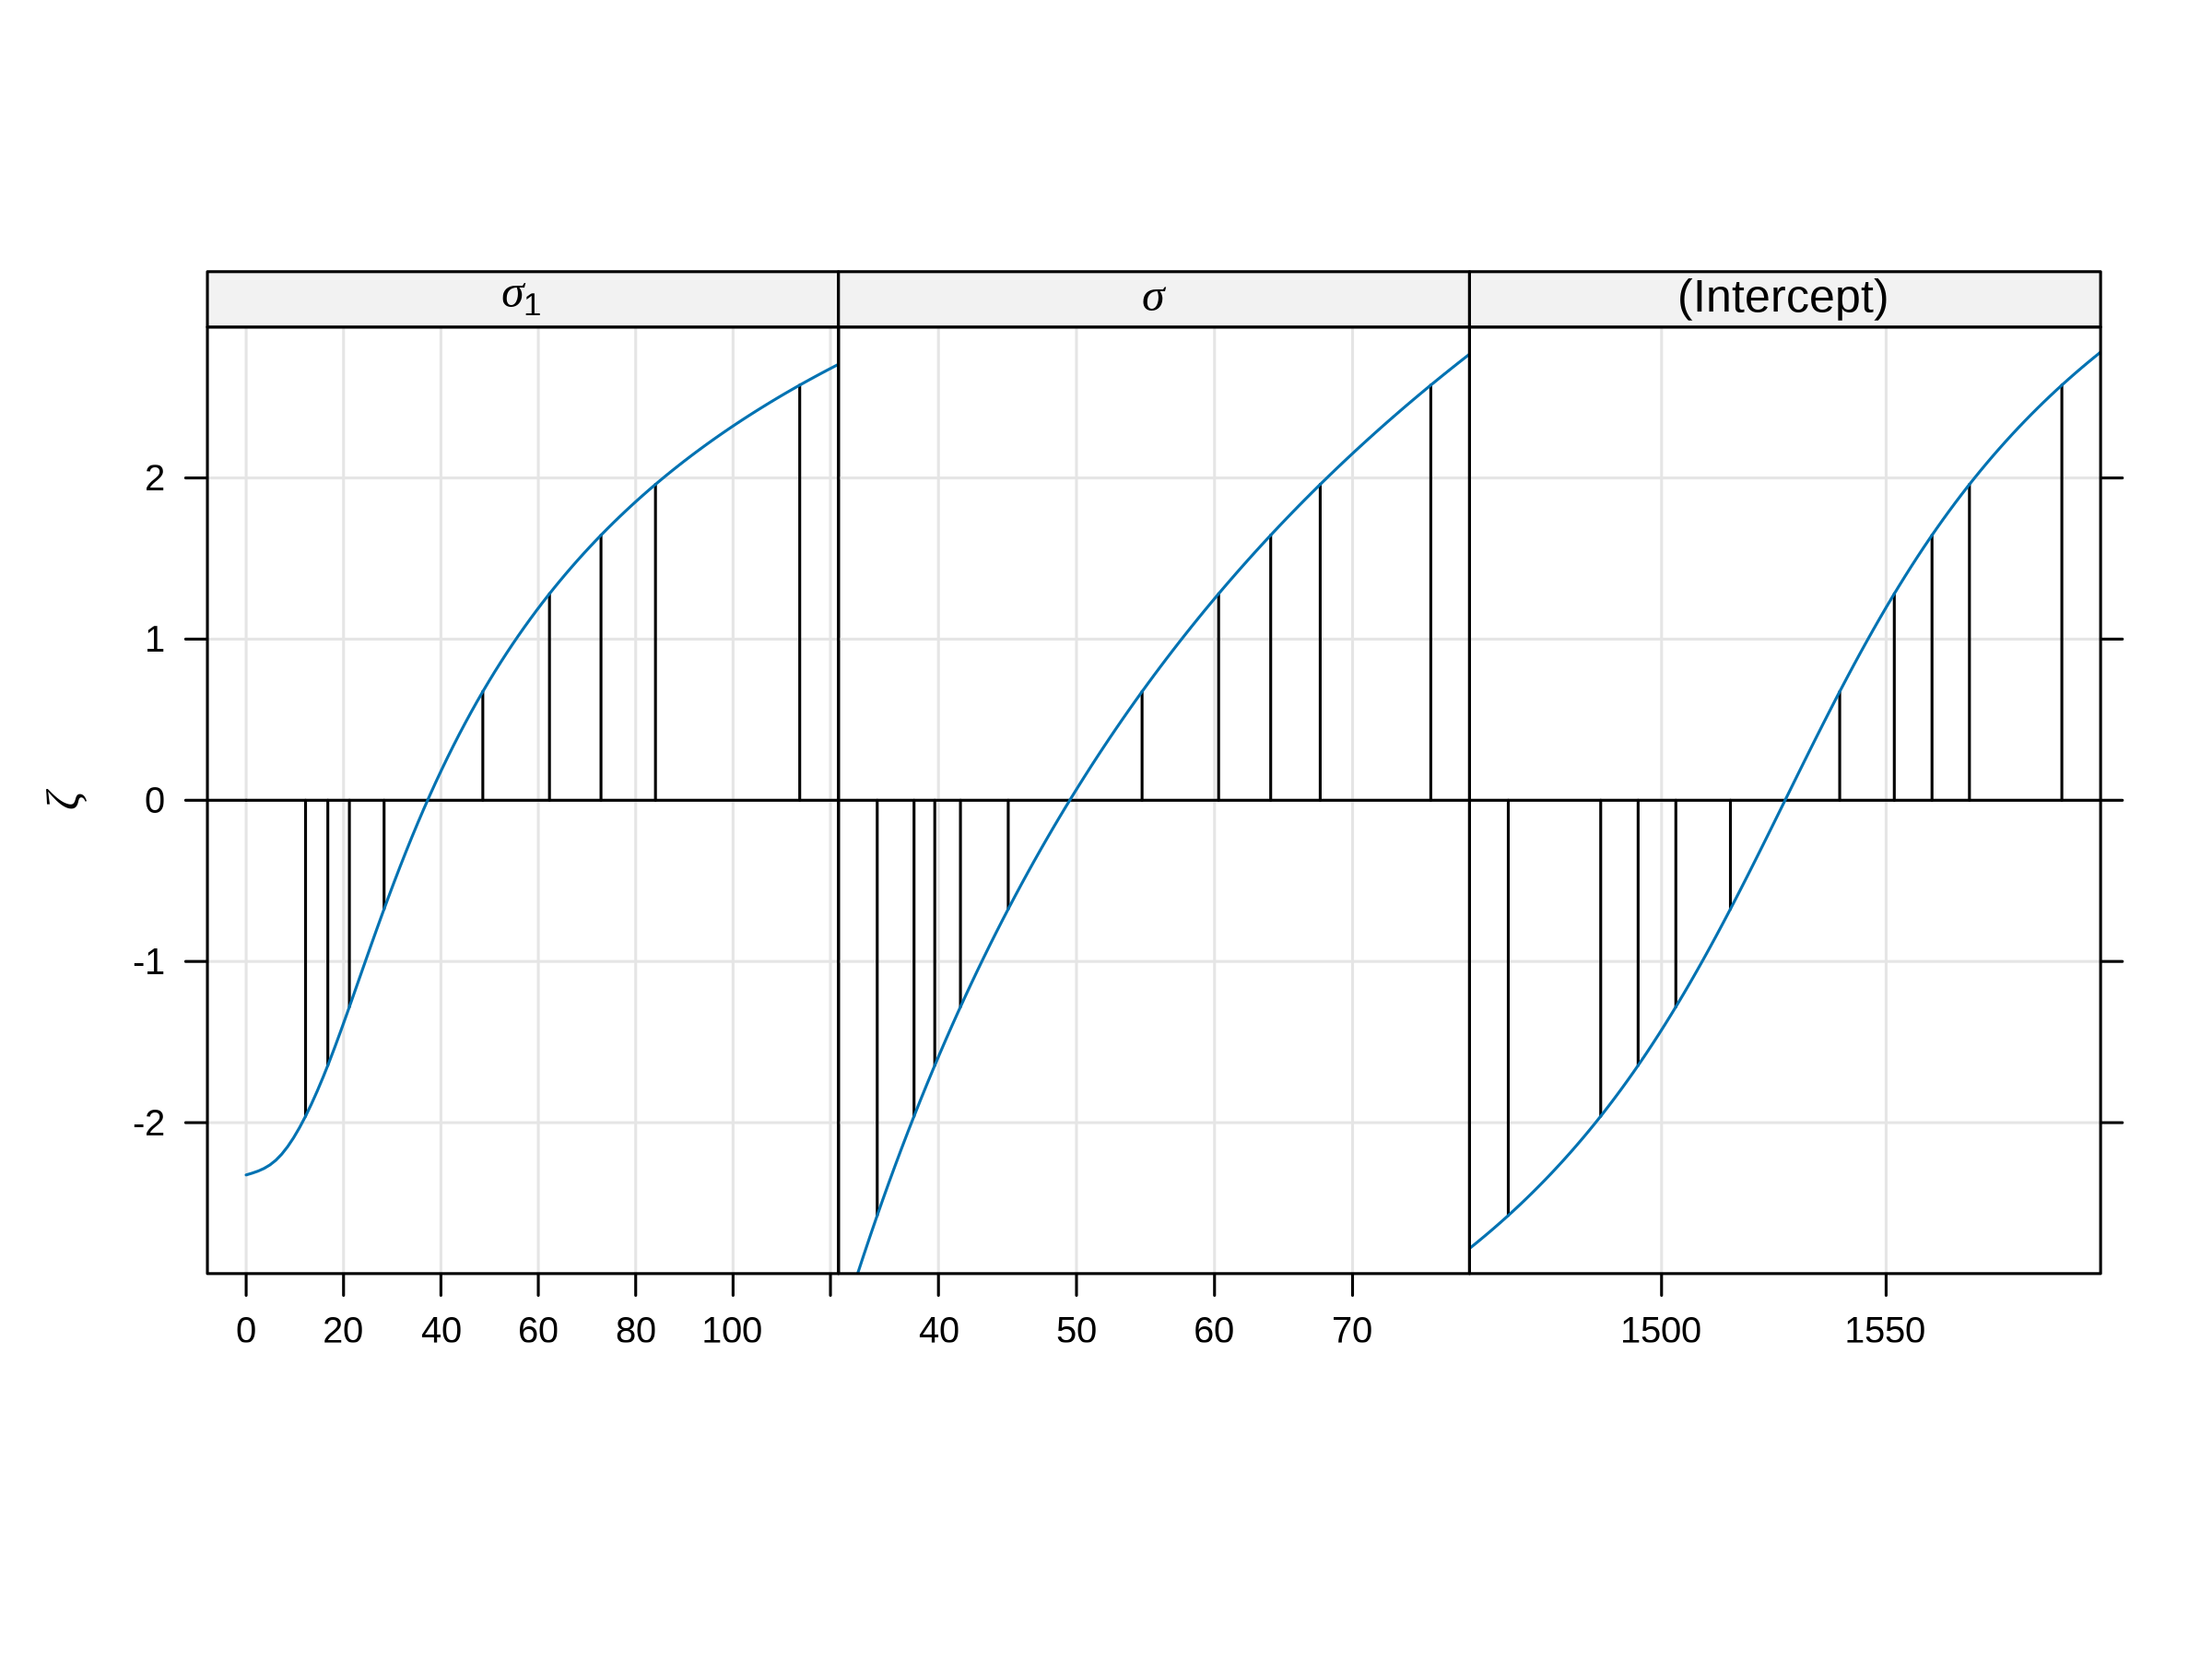

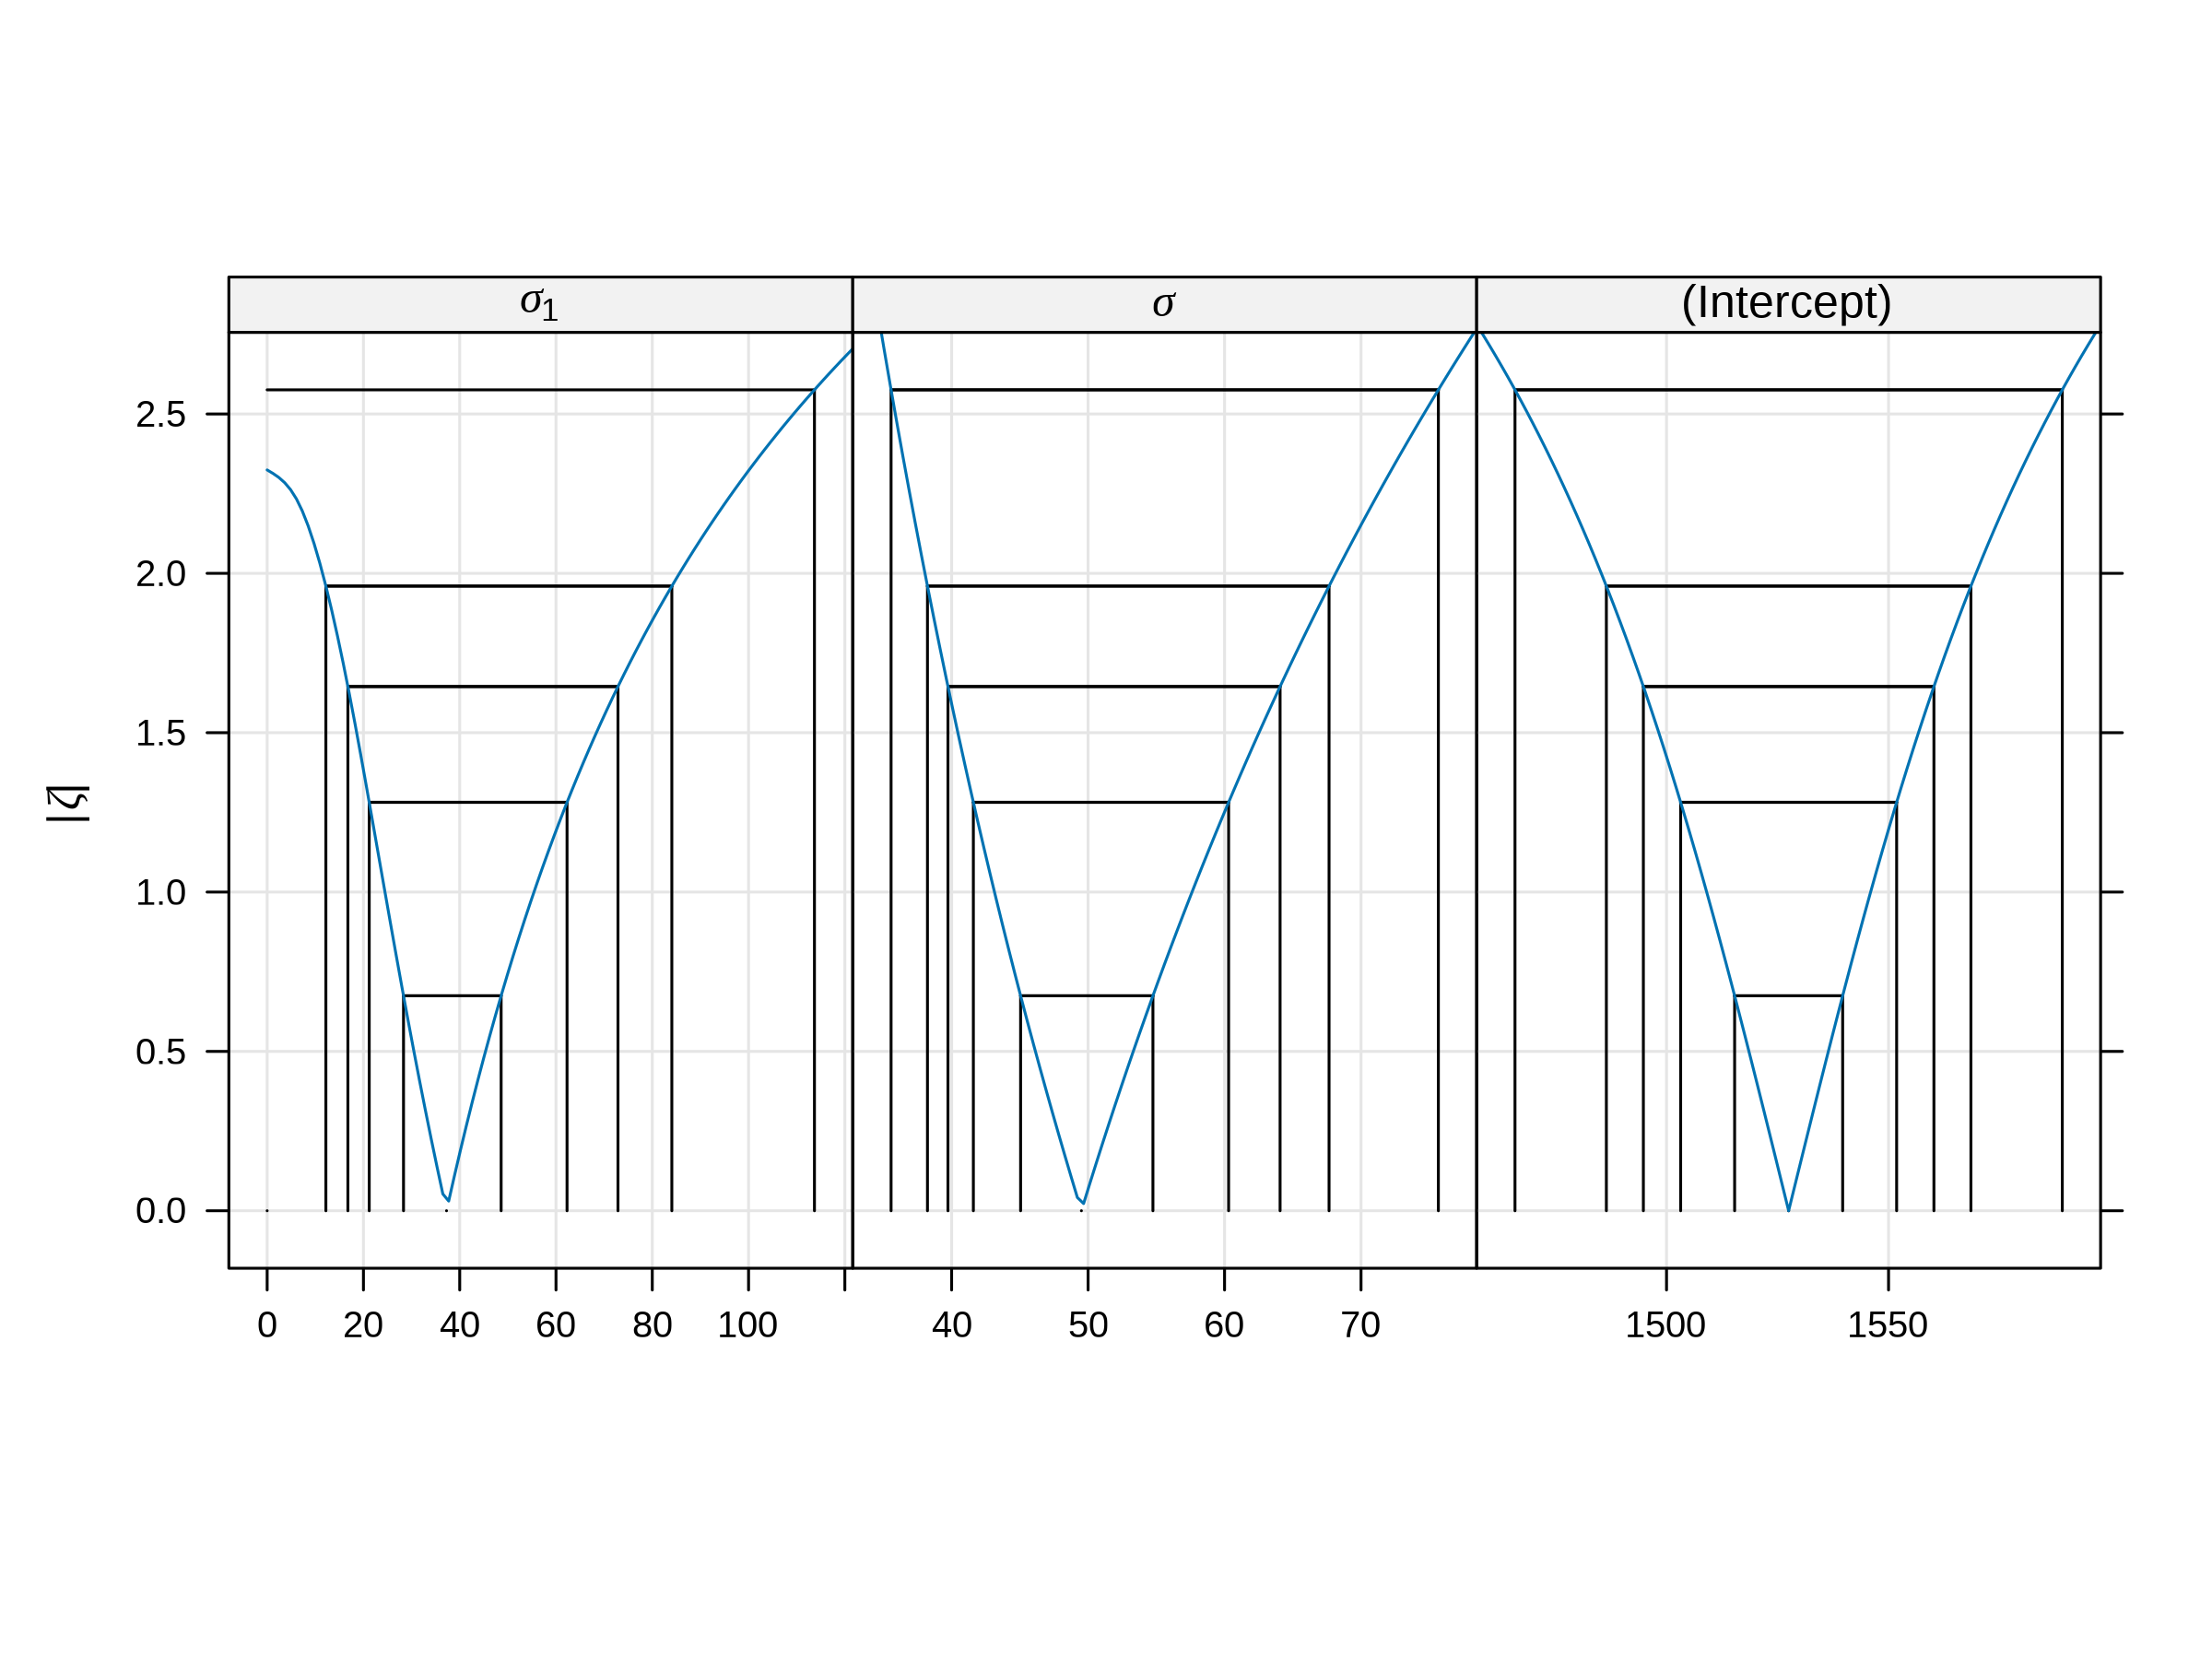

In [11]:
library(lattice)
pr01 <- profile(fm01ML)

options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
pr01 %>% confint(level = 0.95) # confidence intervals
pr01 %>% xyplot(aspect = 1.5)
pr01 %>% xyplot(aspect = 1.5, absVal = TRUE)

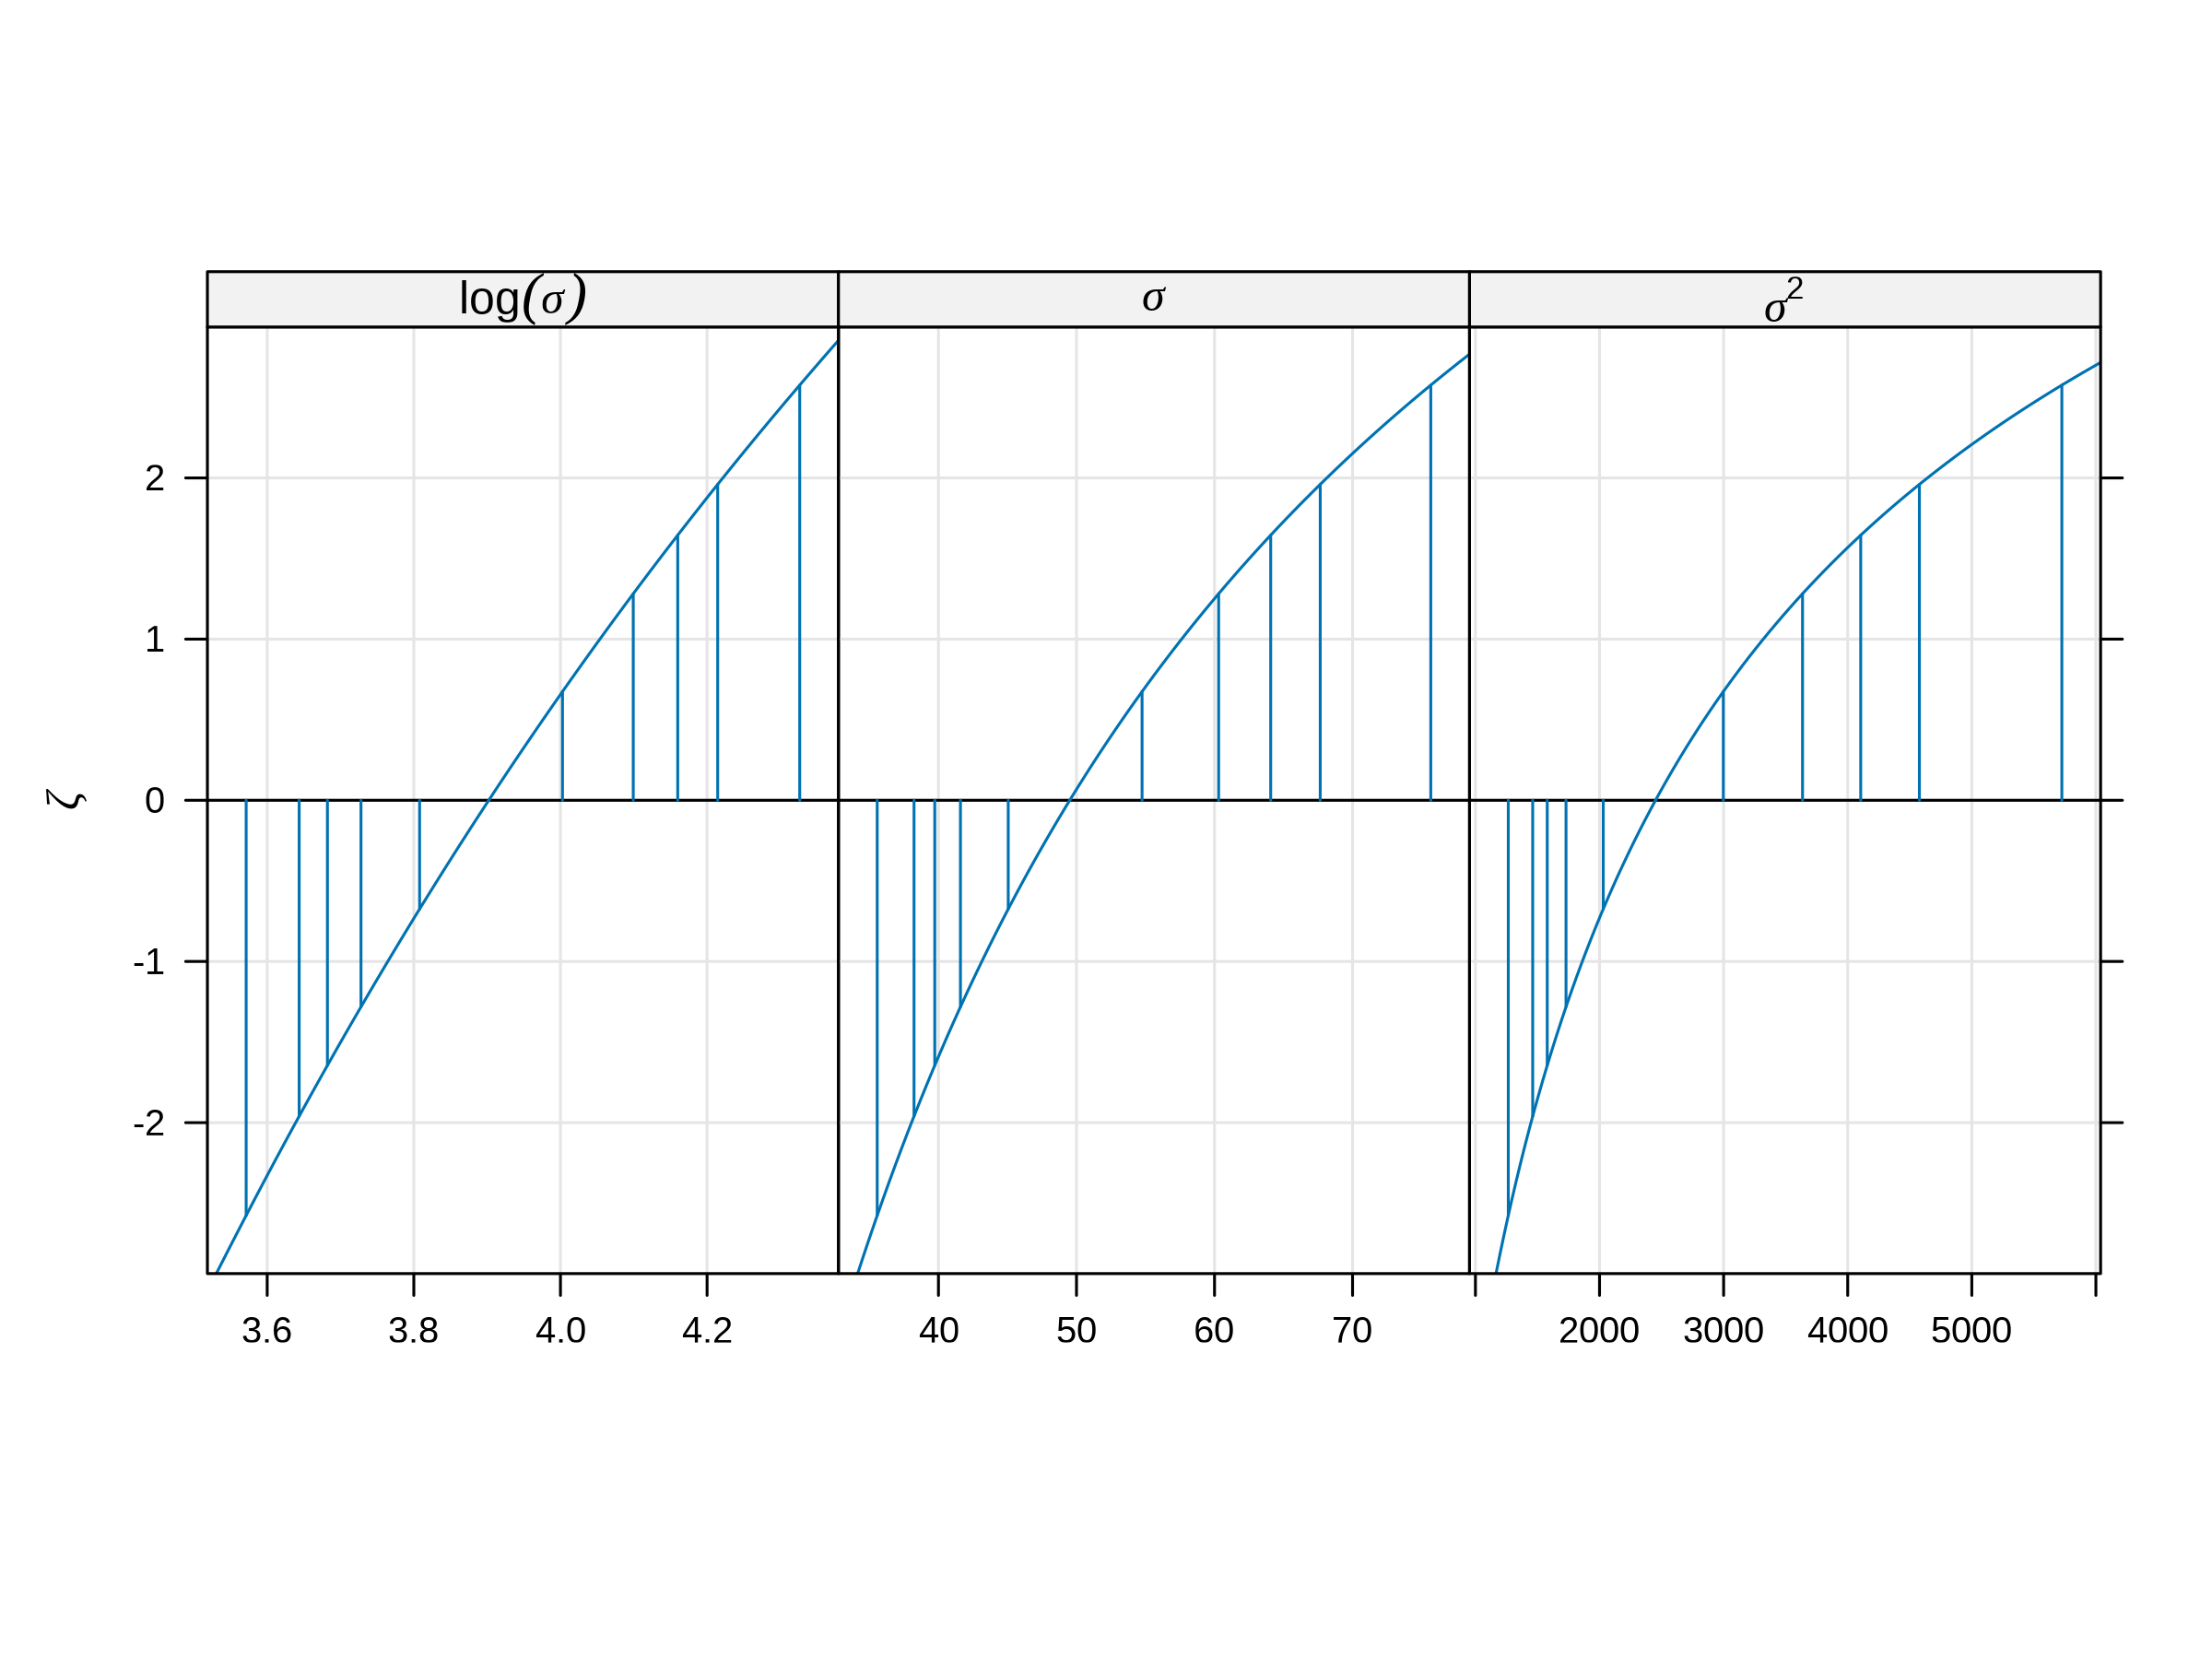

In [12]:
zeta <- sqrt(qchisq(c(0.5,0.8,0.9,0.95,0.99), df=1)) # picking values from chisq to estimate variances
zeta <- c(-rev(zeta), 0, zeta)
spl <- attr(pr01, "forward")[[".sigma"]] # an ("npolySpline" .. "spline")
endpts <- predict(attr(pr01, "backward")[[".sigma"]], zeta)$y # [1..10]  35.56 ... 75.66

fr <- data.frame(zeta = rep.int(zeta, 3),
                 endpts = c(log(endpts), endpts, endpts^2),
                 pnm = gl(3, length(zeta)))
xyplot(zeta ~ endpts|pnm, fr, type = "h",
     scales = list(x = list(relation = "free")),
     xlab = NULL, ylab = expression(zeta), 
     aspect = 1.5,
     strip = strip.custom(
         factor.levels = expression(log(sigma), sigma, sigma^2)),
     panel = function(...) {
         panel.grid(h = -1, v = -1)
         panel.abline(h=0)
         panel.xyplot(...)
         ll <- current.panel.limits()$xlim
         lims <- switch(panel.number(), exp(ll), ll, sqrt(ll))
         pr <- predict(spl, seq(lims[1], lims[2], len = 101))
         panel.lines(switch(panel.number(),
                            log(pr$x),
                            pr$x,
                            pr$x^2), pr$y)
     })


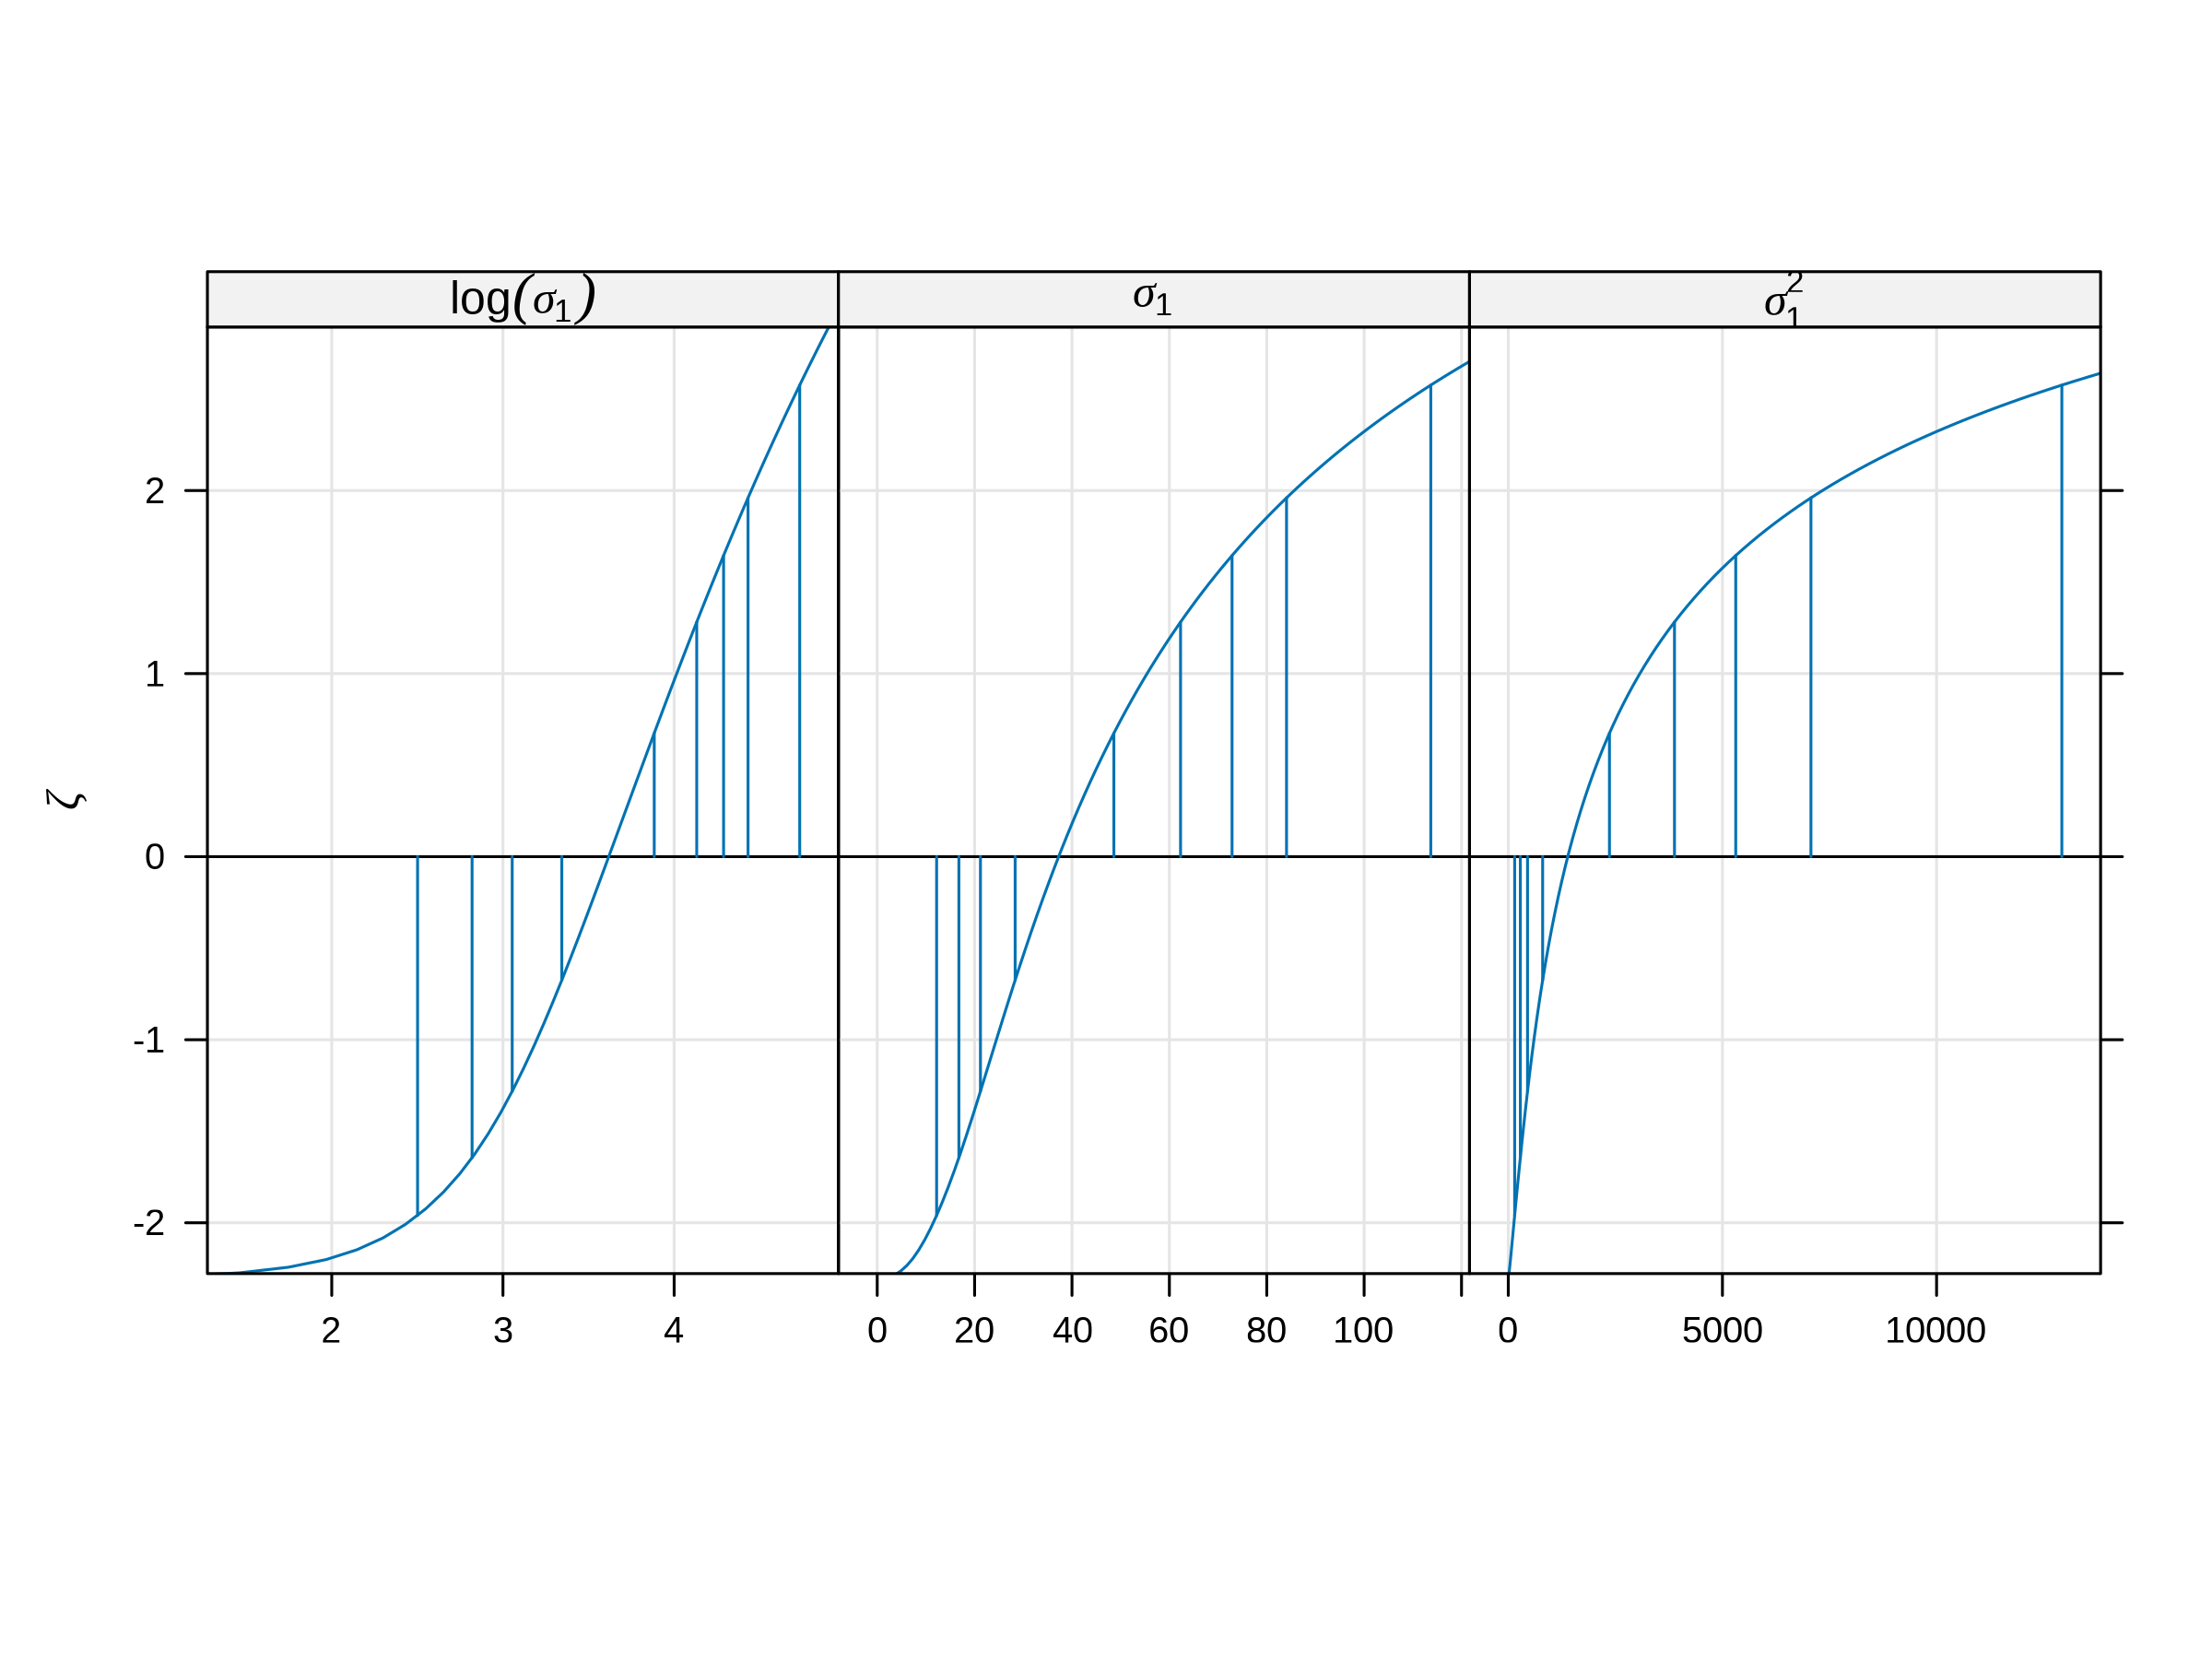

In [13]:
## zeta defined above
spl <- attr(pr01, "forward")[[".sig01"]]
endpts <- predict(attr(pr01, "backward")[[".sig01"]], zeta)$y
## ^^.. we know that the first one is NA
## -> by repeating, we'll have NA's at c(1, 12, 23) below  ==?==>  kludge
fr <- data.frame(zeta = rep.int(zeta, 3),
                 endpts = c(log(endpts), endpts, endpts^2),
                 pnm = gl(3, length(zeta)))
## A mighty kludge here: Set zeta to NA & make up correct 'endpts':
iNA <- is.na(fr[,"endpts"])
fr[iNA,   "zeta"] <- NA
fr[iNA, "endpts"] <- lim.1 <- c(1.5, 0, 0)
xyplot(zeta ~ endpts|pnm, fr, type = "h",
       scales = list(x = list(relation = "free")),
       xlab = NULL, ylab = expression(zeta), 
       aspect = 1.5,
       strip = strip.custom(
           factor.levels = expression(log(sigma[1]), sigma[1], sigma[1]^2)),
       panel = function(...) {
           panel.grid(h = -1, v = -1)
           panel.abline(h = 0)
           panel.xyplot(...)
           ll <- current.panel.limits()$xlim[2]
           lims <- cbind(lim.1,
                         c(exp(ll), ll, sqrt(ll)), deparse.level=0)[panel.number(),]
           pr <- predict(spl, seq(lims[1], lims[2], len = 101))
           panel.lines(switch(panel.number(),
                              log(pr$x),
                              pr$x,
                              pr$x^2), pr$y)
       })

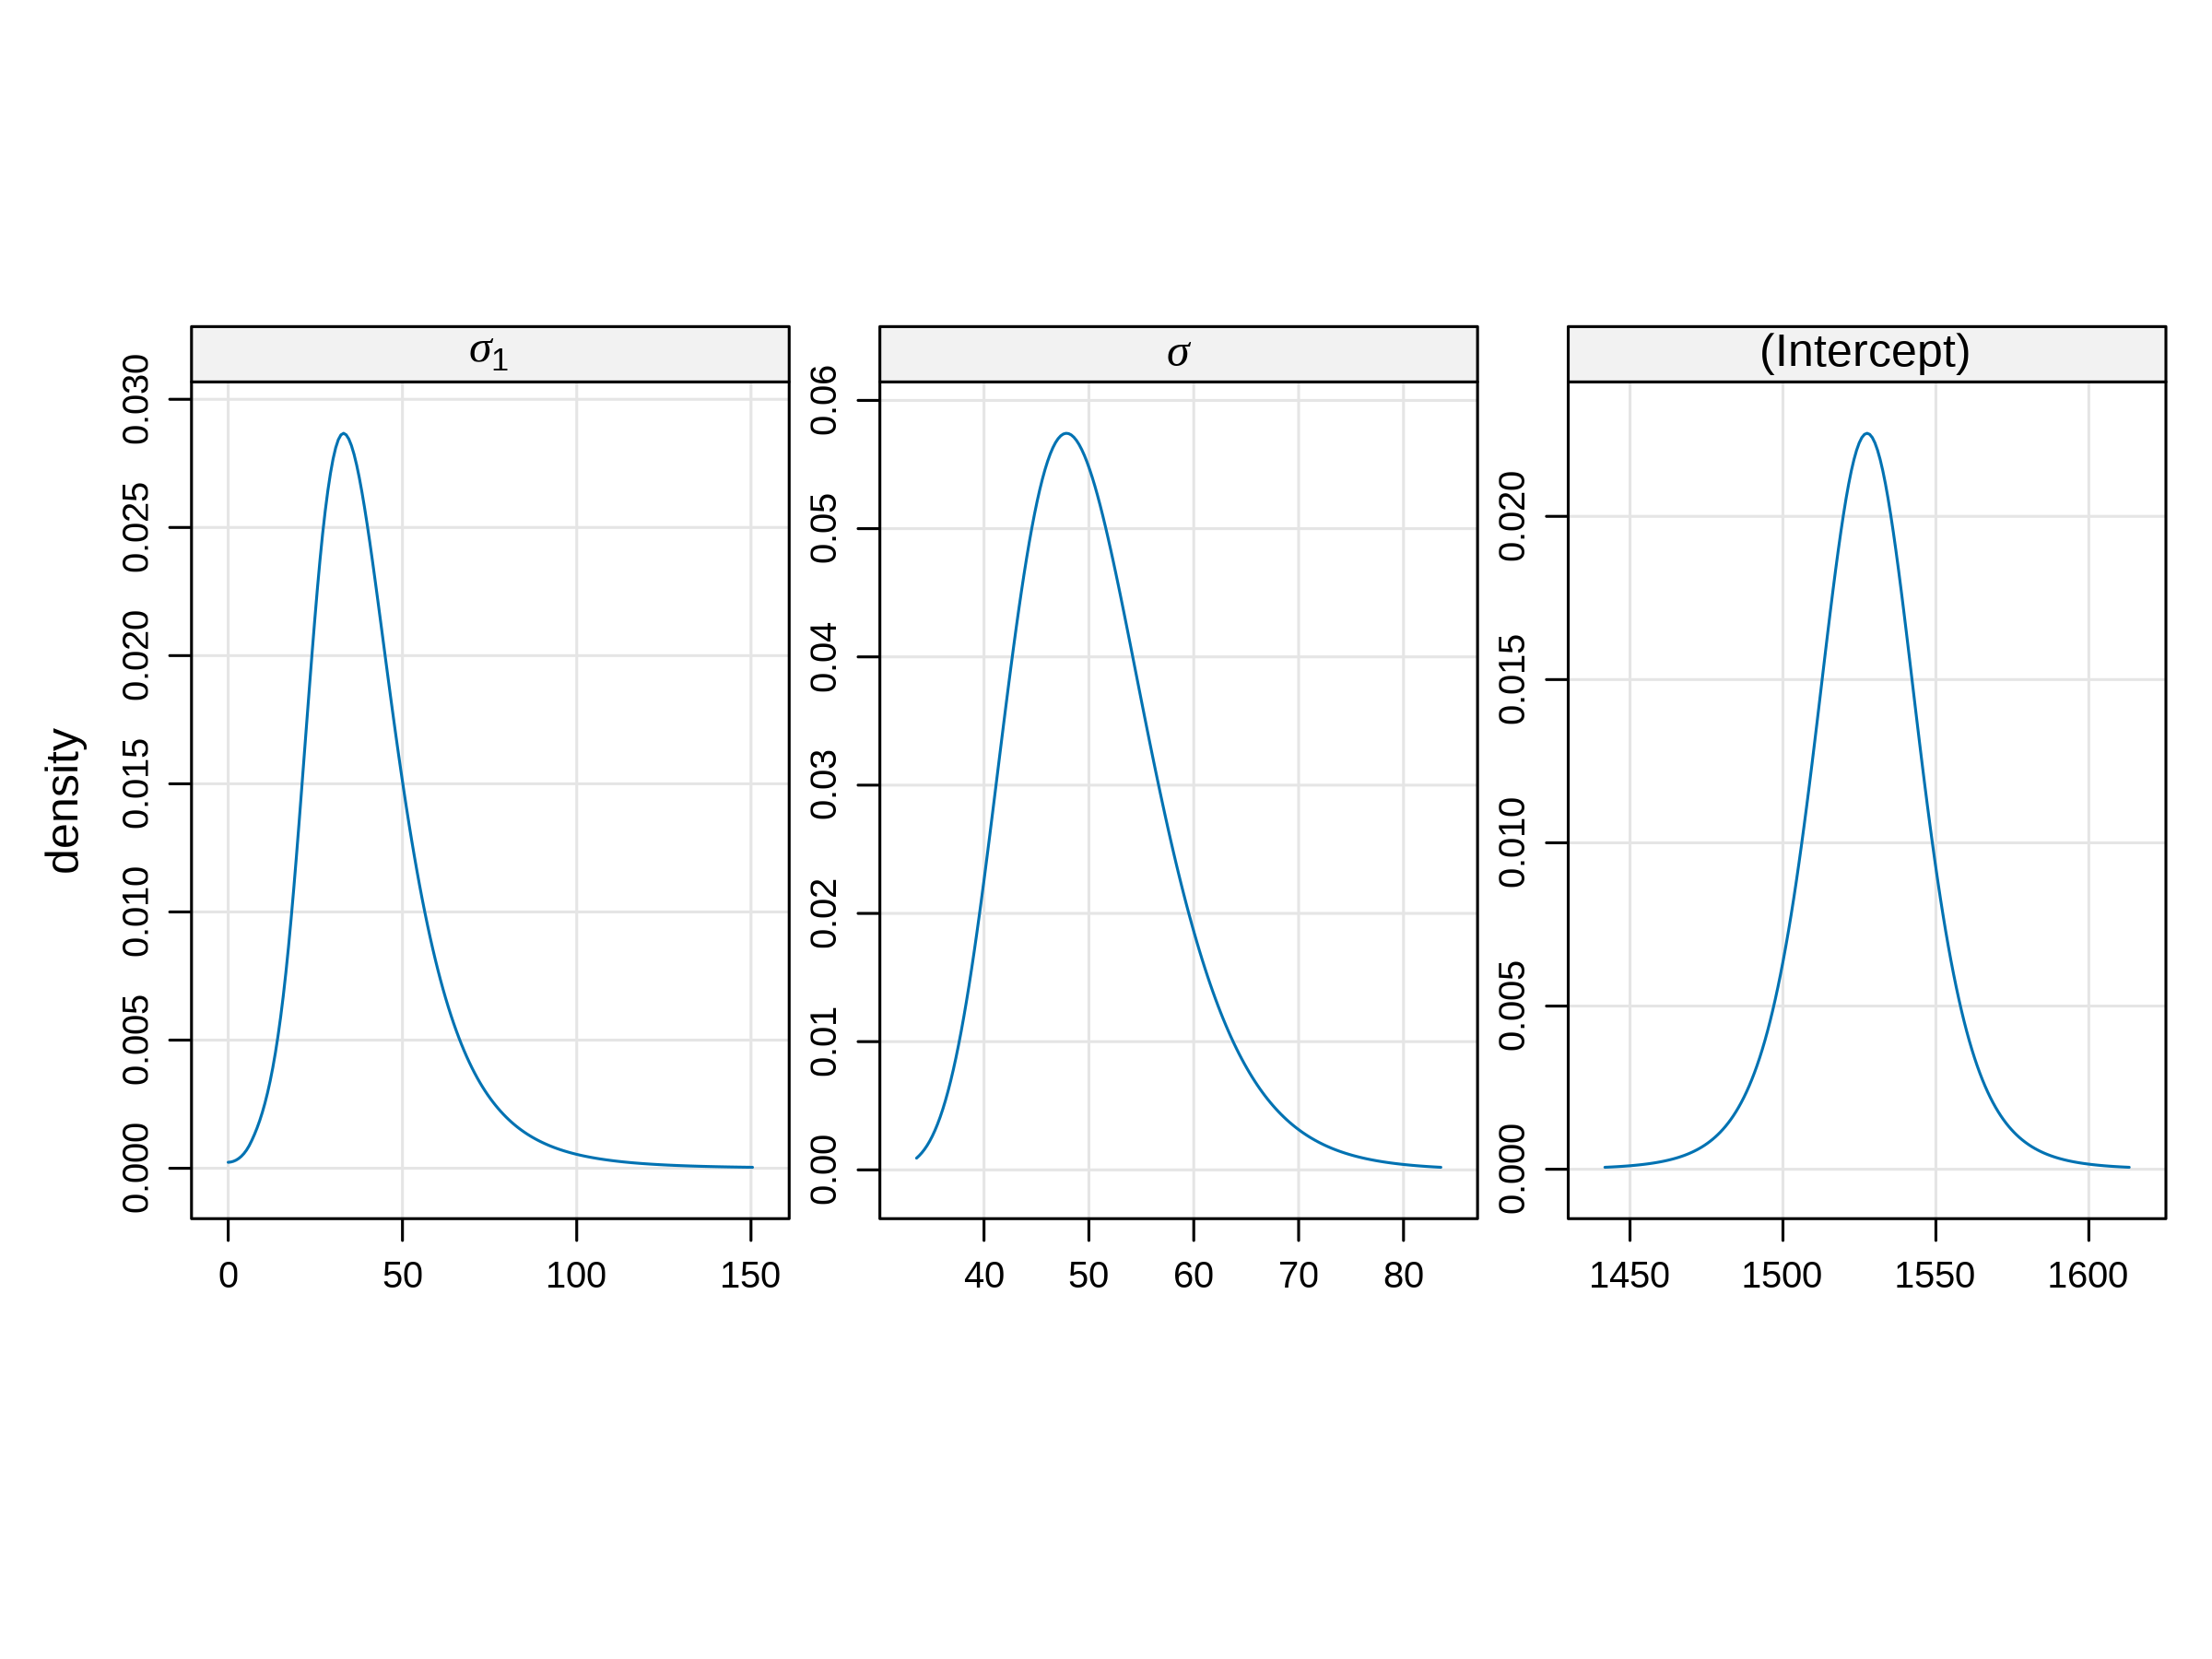

In [14]:
pr01 %>% densityplot(aspect = 1.4)

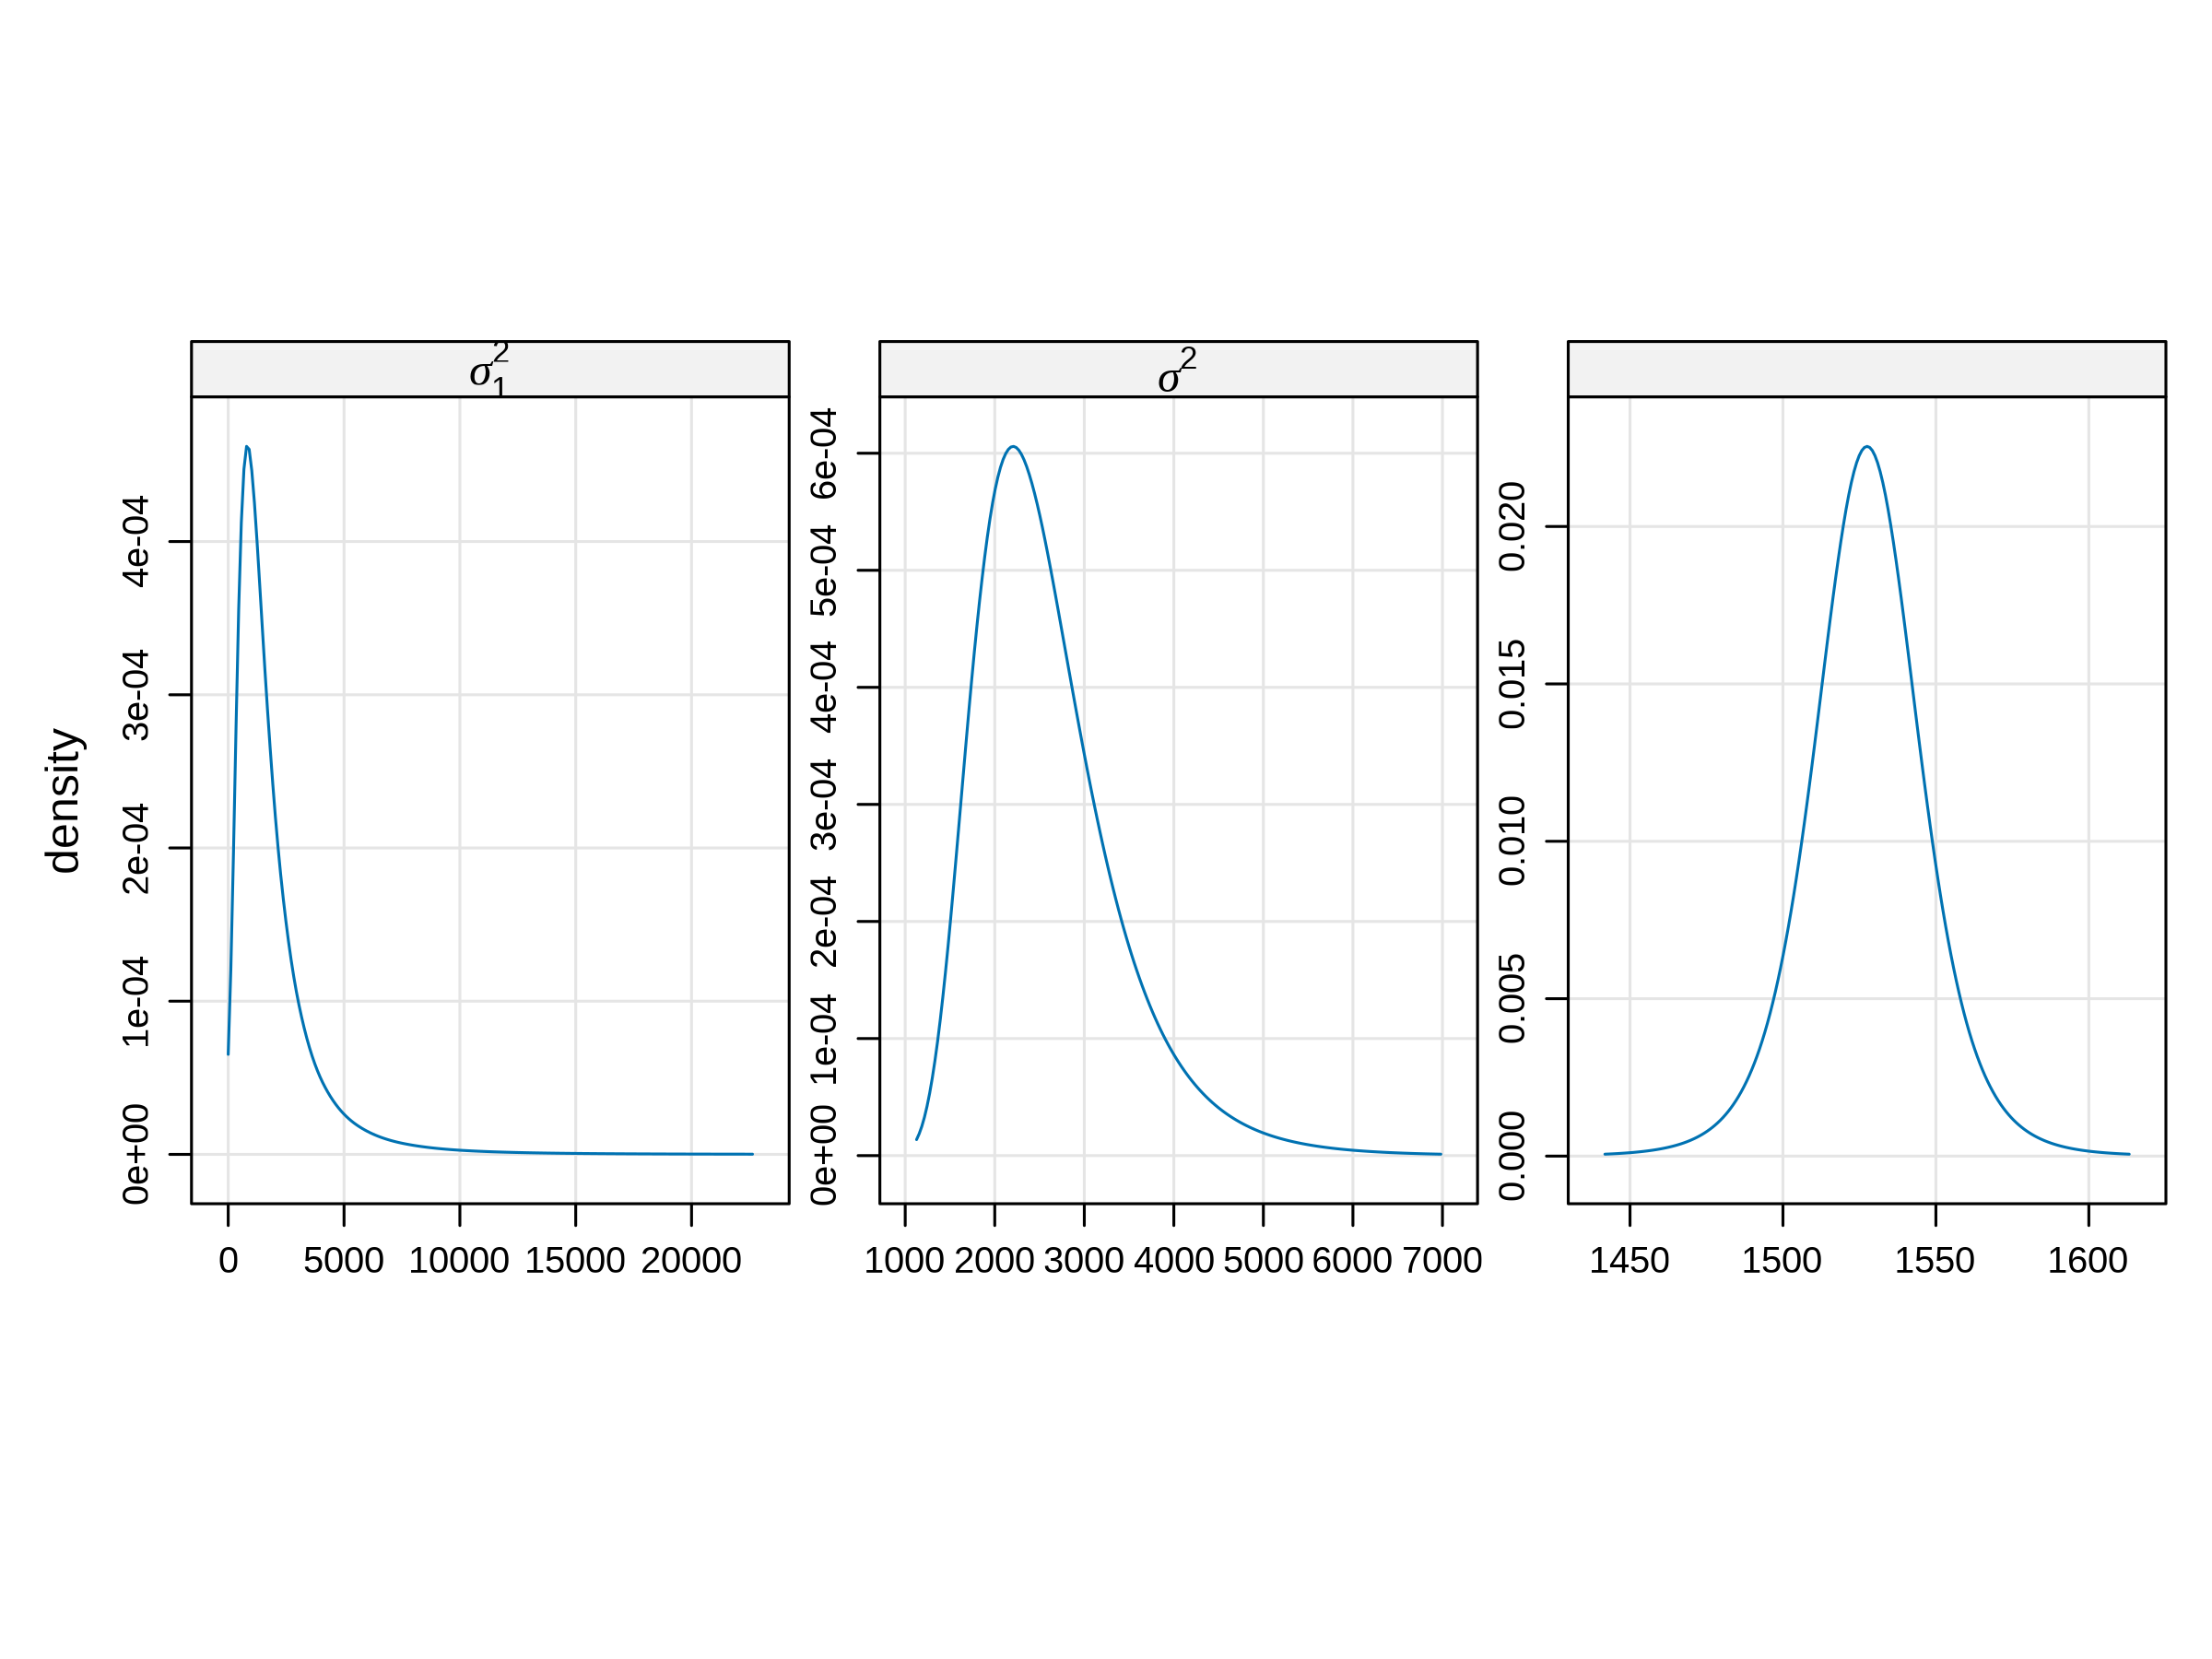

In [15]:
densityplot(lme4:::varianceProf(pr01),
           strip=strip.custom(factor.levels=expression(sigma[1]^2, sigma^2)),
           aspect = 1.35)

#### Assessment of random effects

$Batch
  (Intercept)
A  -16.628222
B    0.369516
C   26.974671
D  -21.801446
E   53.579825
F  -42.494344

with conditional variances for “Batch” 

List of 1
 $ Batch:'data.frame':	6 obs. of  1 variable:
  ..$ (Intercept): num [1:6] -16.63 0.37 26.97 -21.8 53.58 ...
  ..- attr(*, "postVar")= num [1, 1, 1:6] 362 362 362 362 362 ...
 - attr(*, "class")= chr "ranef.mer"


$Batch


$Batch


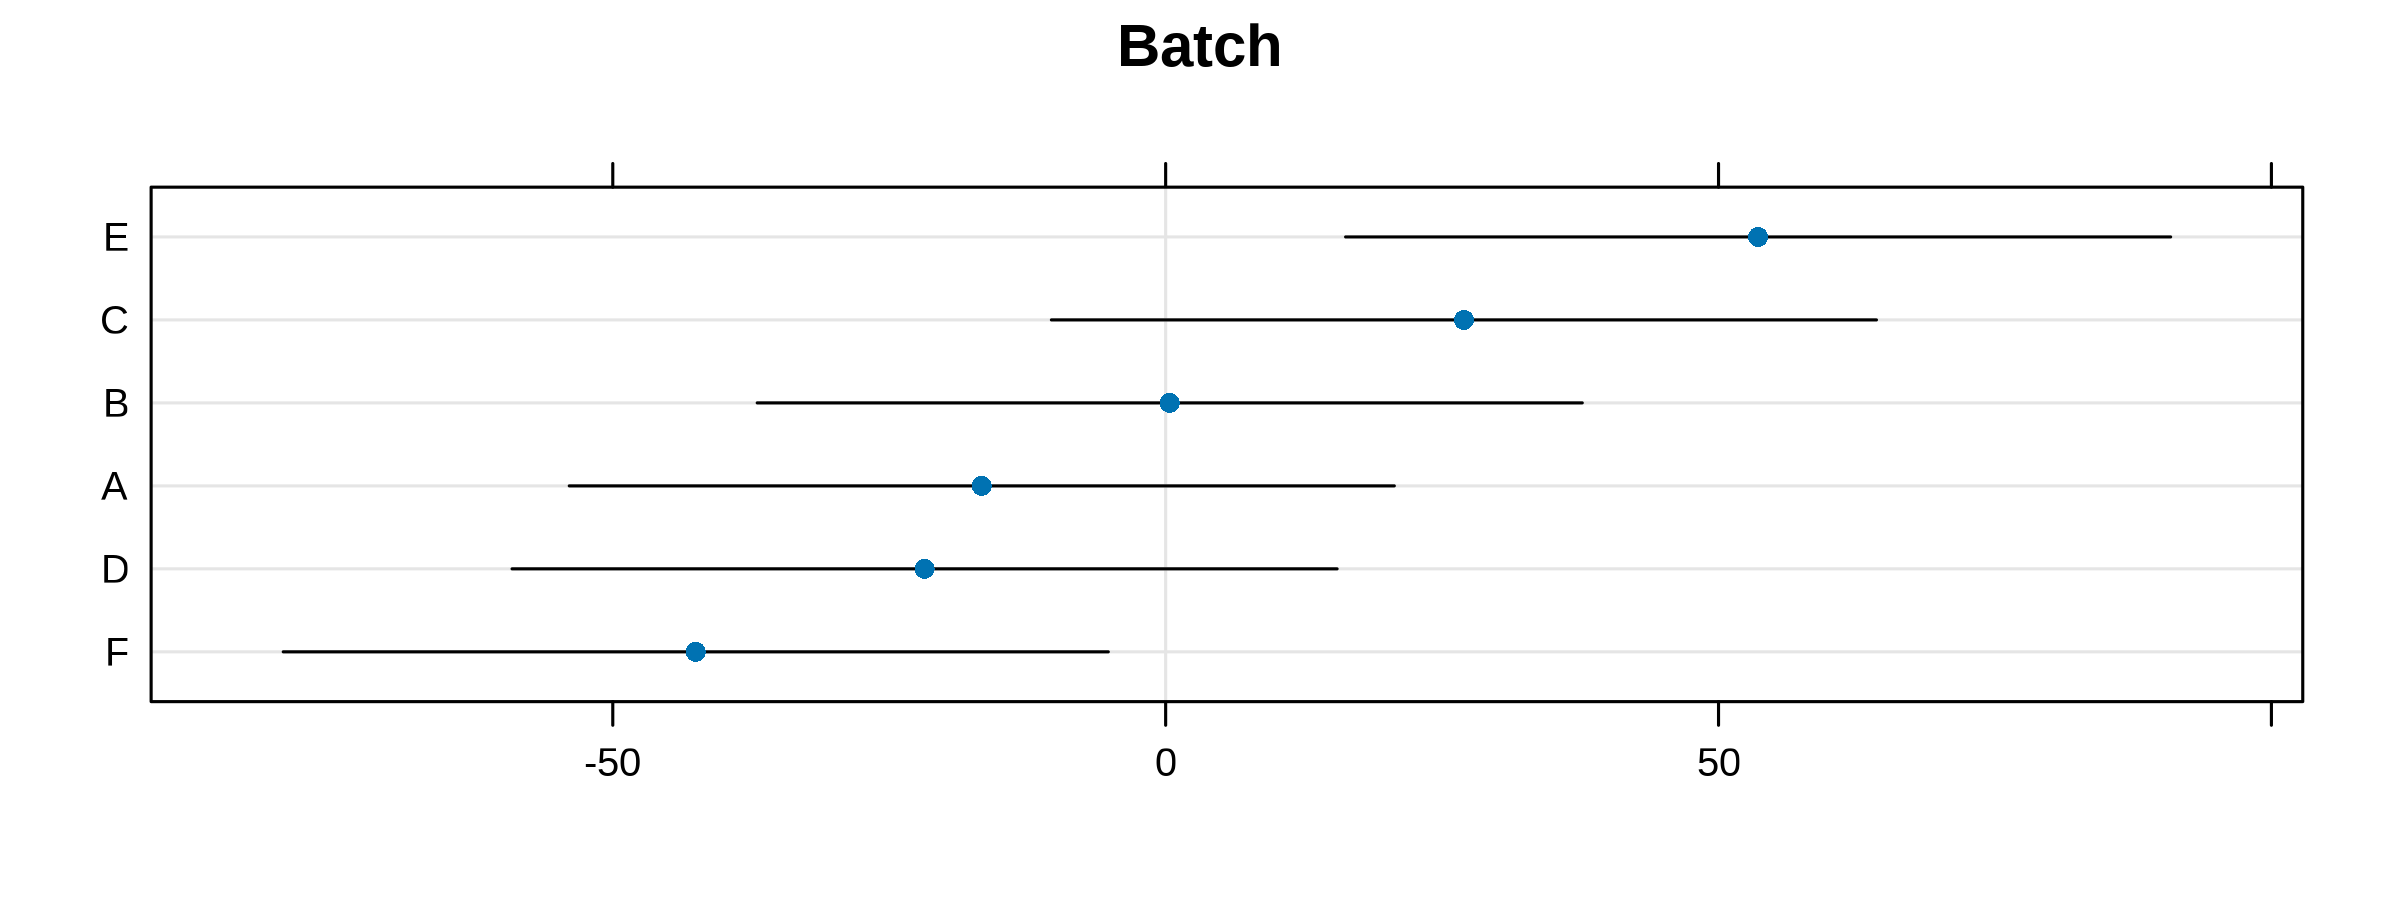

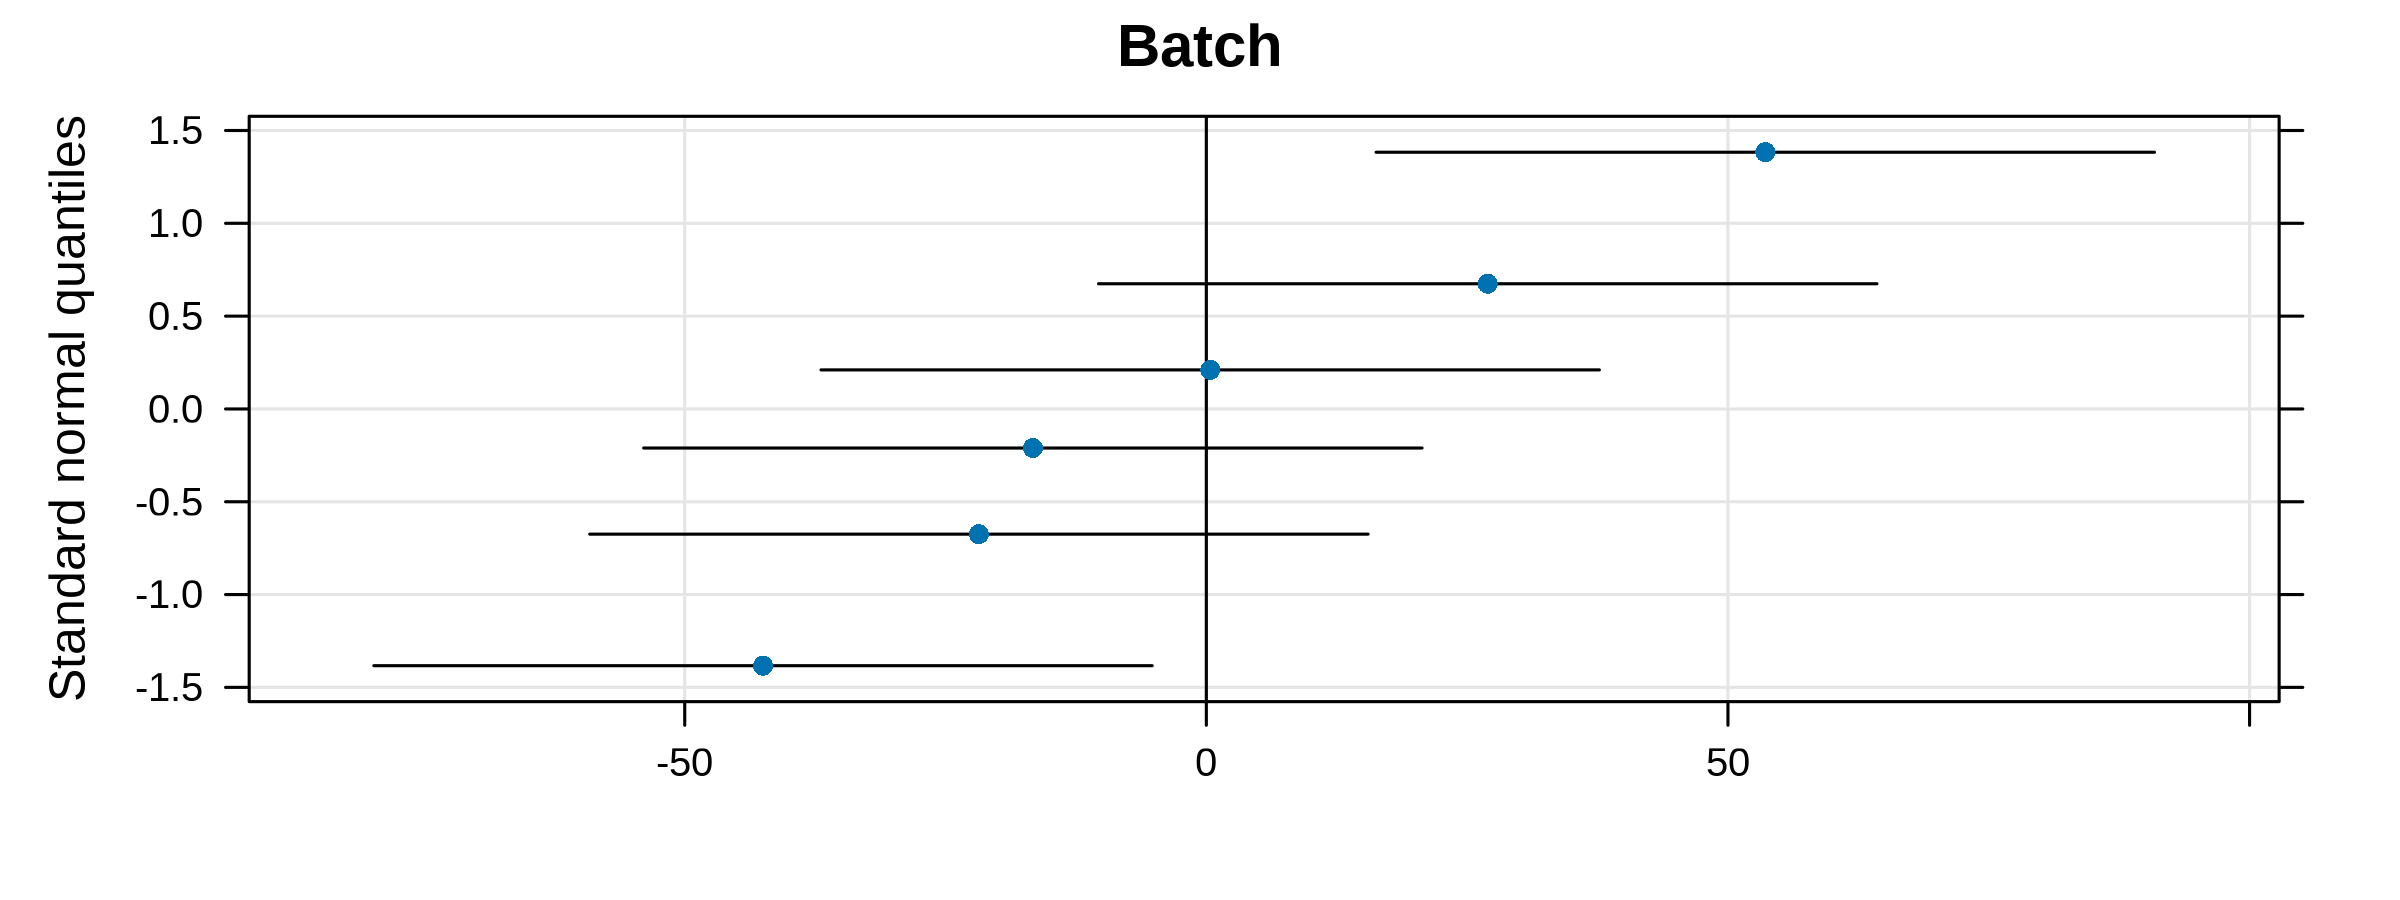

In [16]:
fm01ML %>% ranef()
fm01ML %>% ranef() %>% str()
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
dotplot(ranef(fm01ML, condVar=TRUE), strip = FALSE)
qqmath(ranef(fm01ML, condVar=TRUE), strip = FALSE)

#### Exercise

In [17]:
library("MEMSS")


Attaching package: ‘MEMSS’


The following objects are masked from ‘package:datasets’:

    CO2, Orange, Theoph




In [18]:
data(Rail)

In [19]:
Rail %>% str()
Rail %>% summary()
Rail %>% head()

'data.frame':	18 obs. of  2 variables:
 $ Rail  : Factor w/ 6 levels "A","B","C","D",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ travel: num  55 53 54 26 37 32 78 91 85 92 ...


 Rail      travel      
 A:3   Min.   : 26.00  
 B:3   1st Qu.: 50.25  
 C:3   Median : 66.50  
 D:3   Mean   : 66.50  
 E:3   3rd Qu.: 85.00  
 F:3   Max.   :100.00  

Rail travel
1 A    55    
2 A    53    
3 A    54    
4 B    26    
5 B    37    
6 B    32

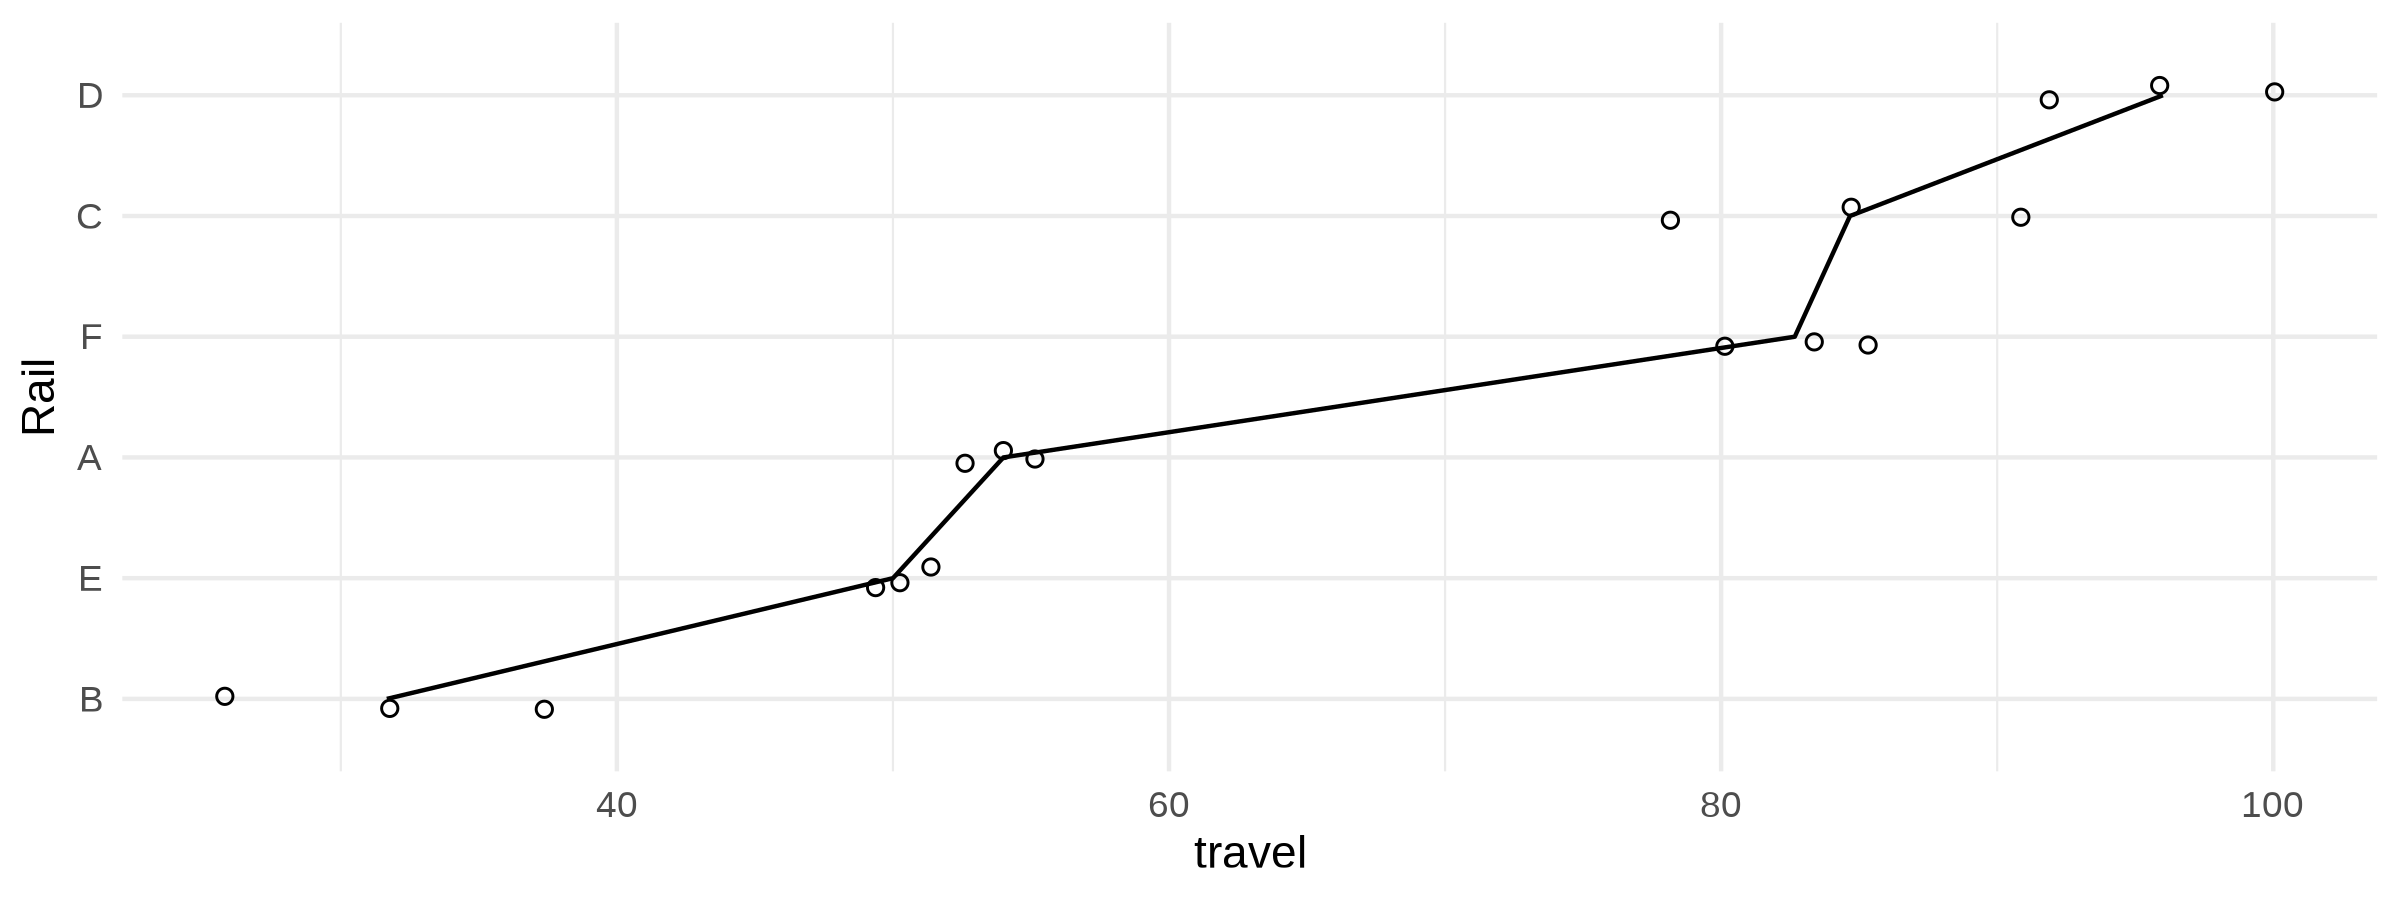

In [20]:
mean_rail <- Rail %>%
    group_by(Rail) %>%
    summarise(travel = mean(travel), .groups = "drop")

options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
Rail %>%
    mutate(Rail = fct_reorder(Rail, travel, mean)) %>%
    ggplot(aes(x = travel, y = Rail)) +
    geom_jitter(shape = 21, height = 0.1) +
    geom_line(data=mean_rail, aes(group = 1)) +
    theme_minimal()

In [21]:
fm01_rail <- lmer(formula = travel ~ 1 + (1 | Rail), data = Rail)
fm01_rail %>% summary()

Linear mixed model fit by REML ['lmerMod']
Formula: travel ~ 1 + (1 | Rail)
   Data: Rail

REML criterion at convergence: 122.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.61883 -0.28218  0.03569  0.21956  1.61438 

Random effects:
 Groups   Name        Variance Std.Dev.
 Rail     (Intercept) 615.31   24.805  
 Residual              16.17    4.021  
Number of obs: 18, groups:  Rail, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)    66.50      10.17   6.538

$Rail


$Rail


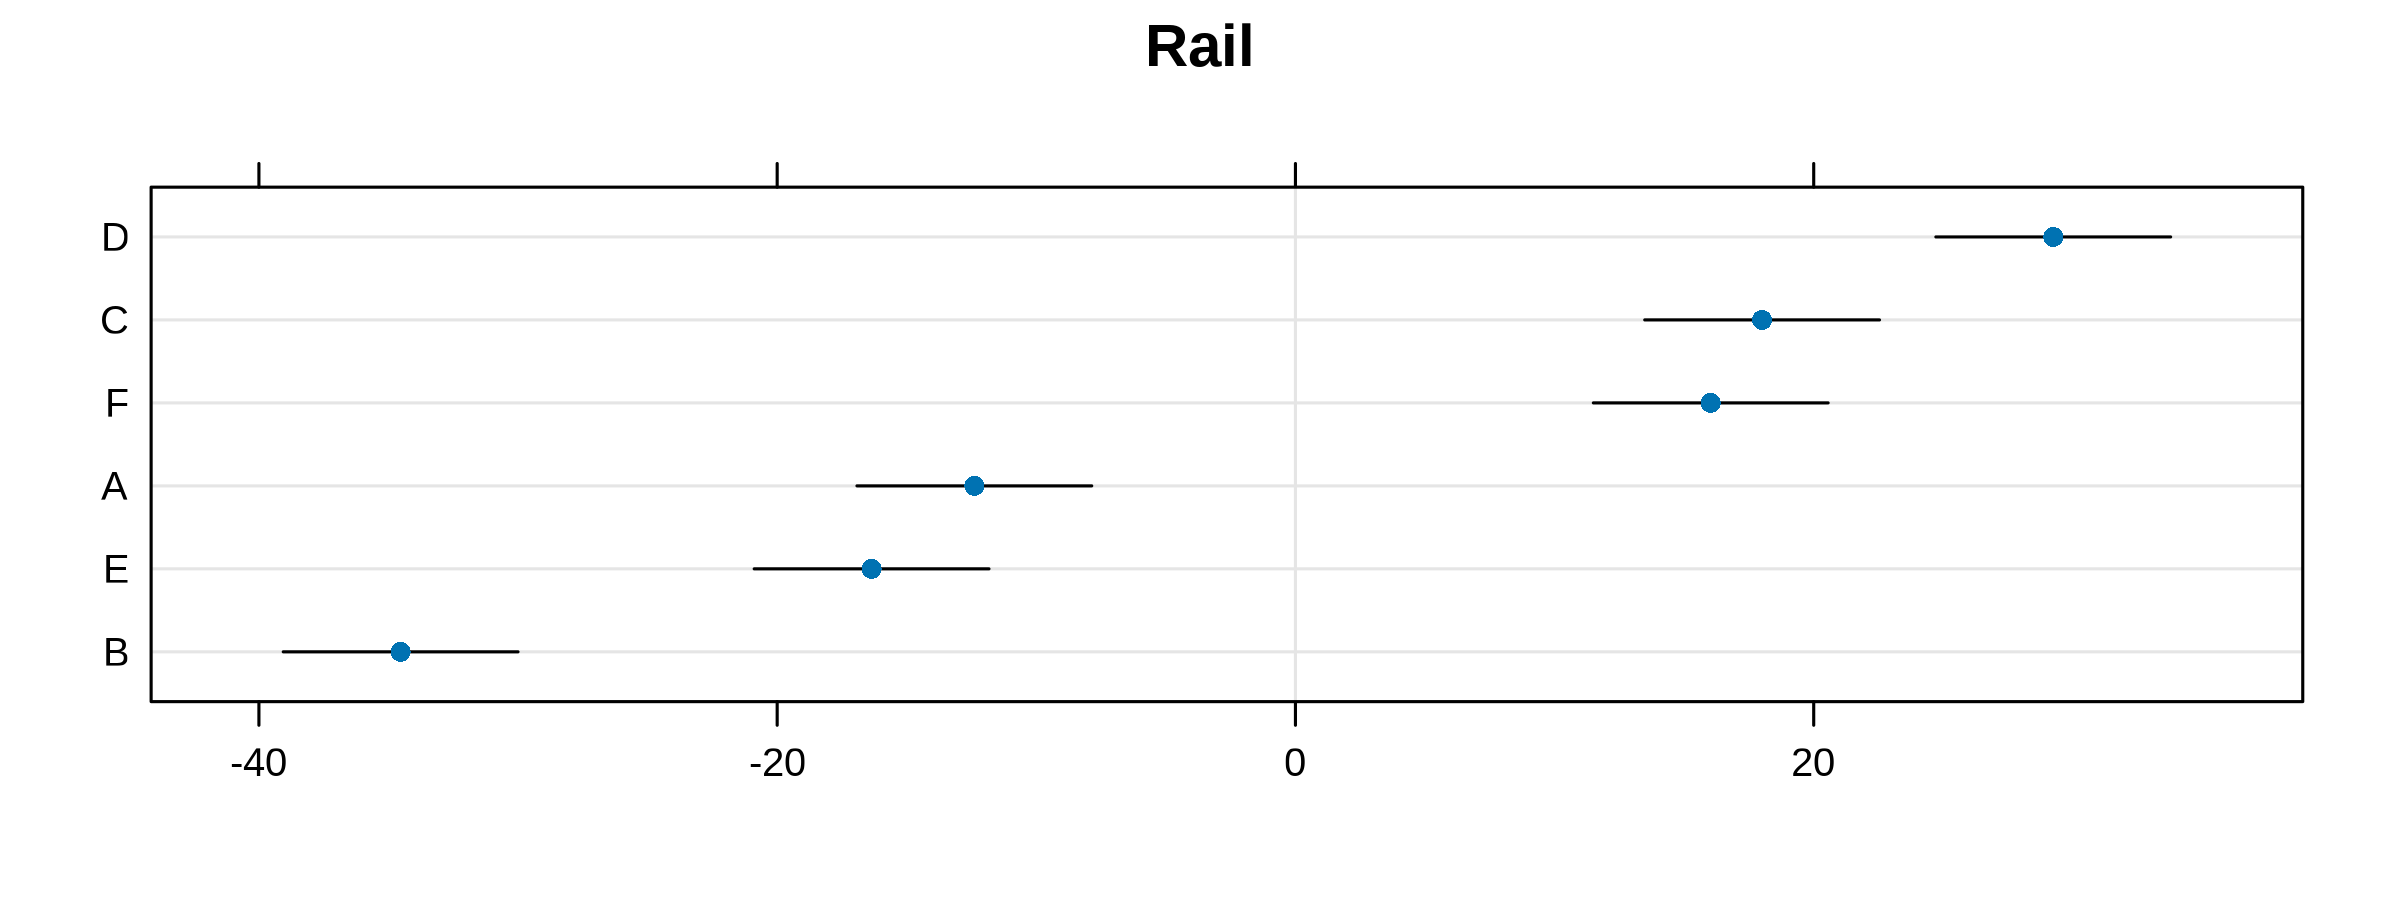

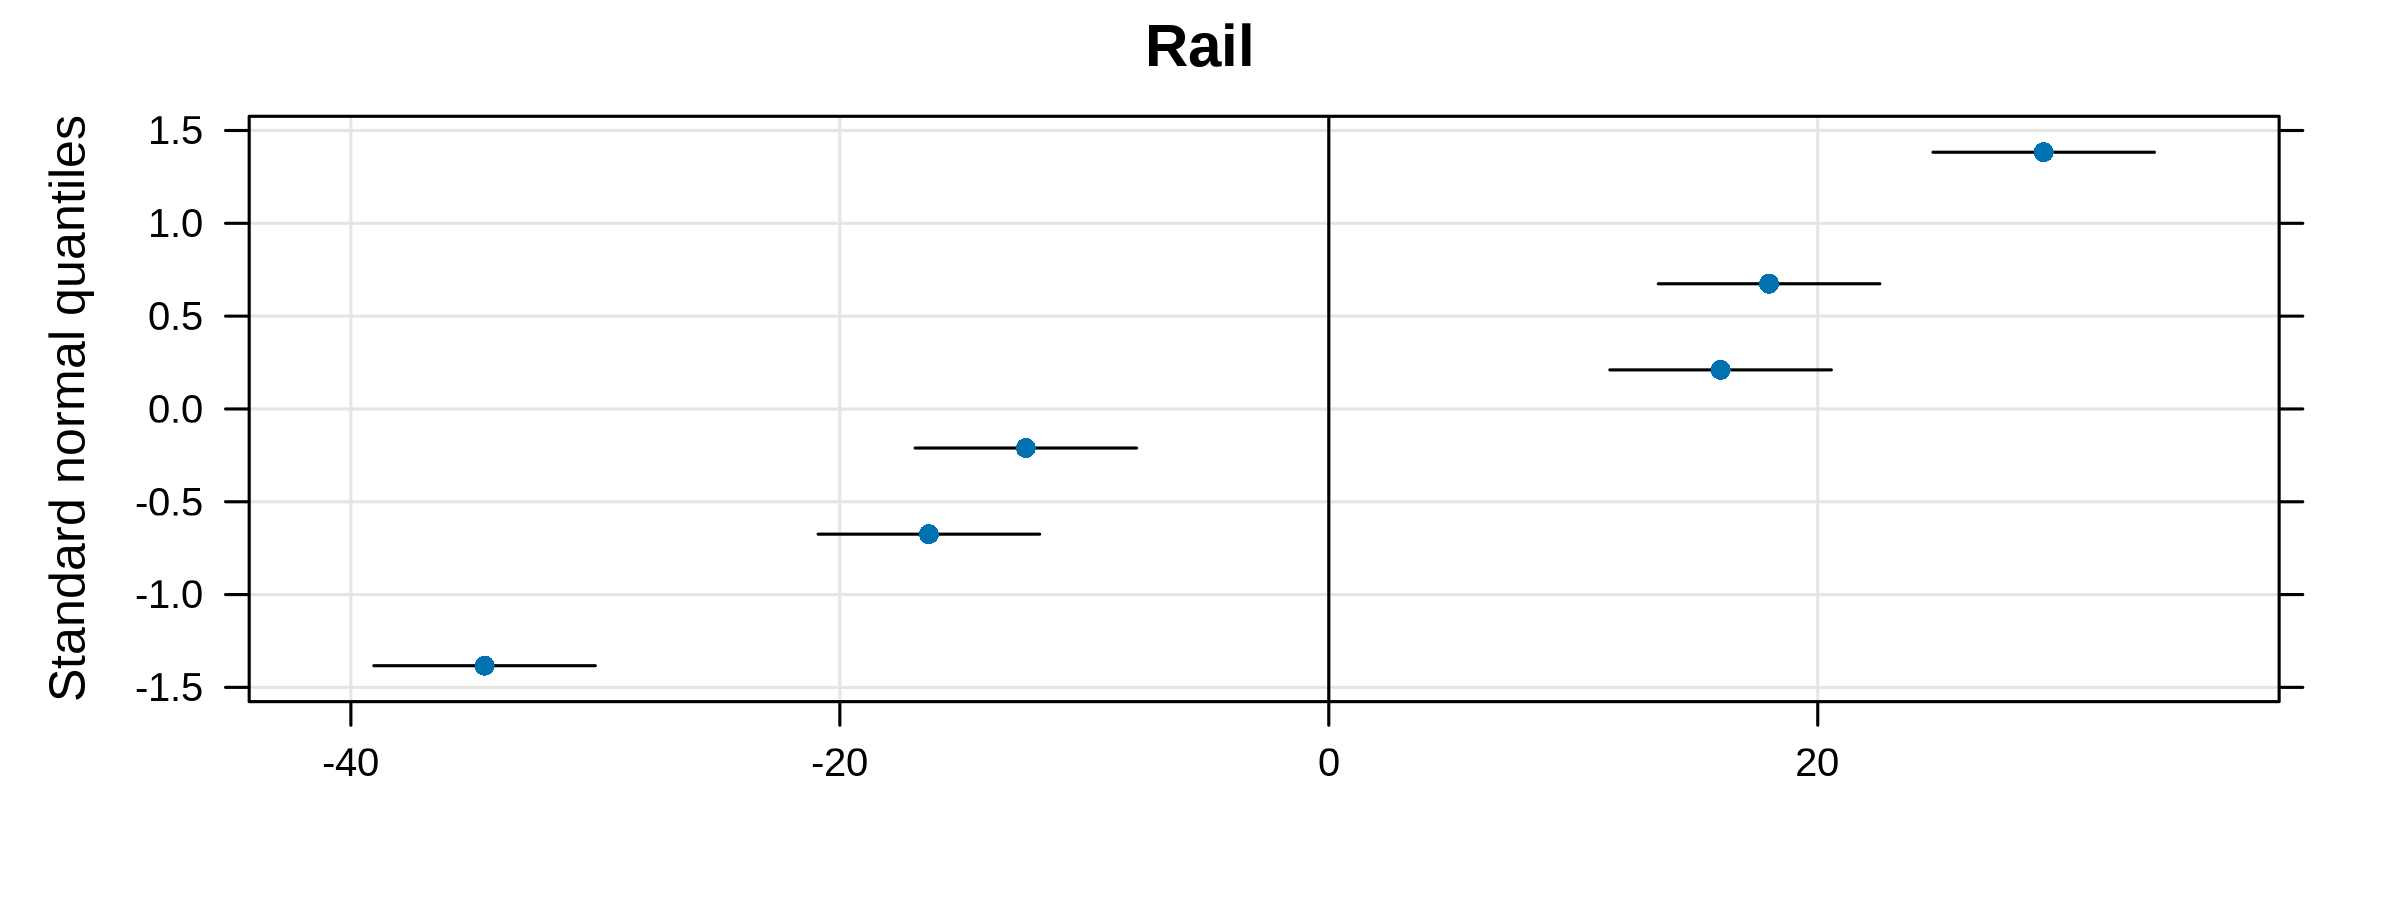

In [22]:
dotplot(ranef(fm01_rail, condVar=TRUE), strip = FALSE)
qqmath(ranef(fm01_rail, condVar=TRUE), strip = FALSE)

In [23]:
fm01_railML <- lmer(formula = travel ~ 1 + (1 | Rail), data = Rail, REML=FALSE)
fm01_railML %>% summary()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: travel ~ 1 + (1 | Rail)
   Data: Rail

      AIC       BIC    logLik -2*log(L)  df.resid 
    134.6     137.2     -64.3     128.6        15 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.61098 -0.28887  0.03454  0.21373  1.62222 

Random effects:
 Groups   Name        Variance Std.Dev.
 Rail     (Intercept) 511.86   22.624  
 Residual              16.17    4.021  
Number of obs: 18, groups:  Rail, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)   66.500      9.285   7.162

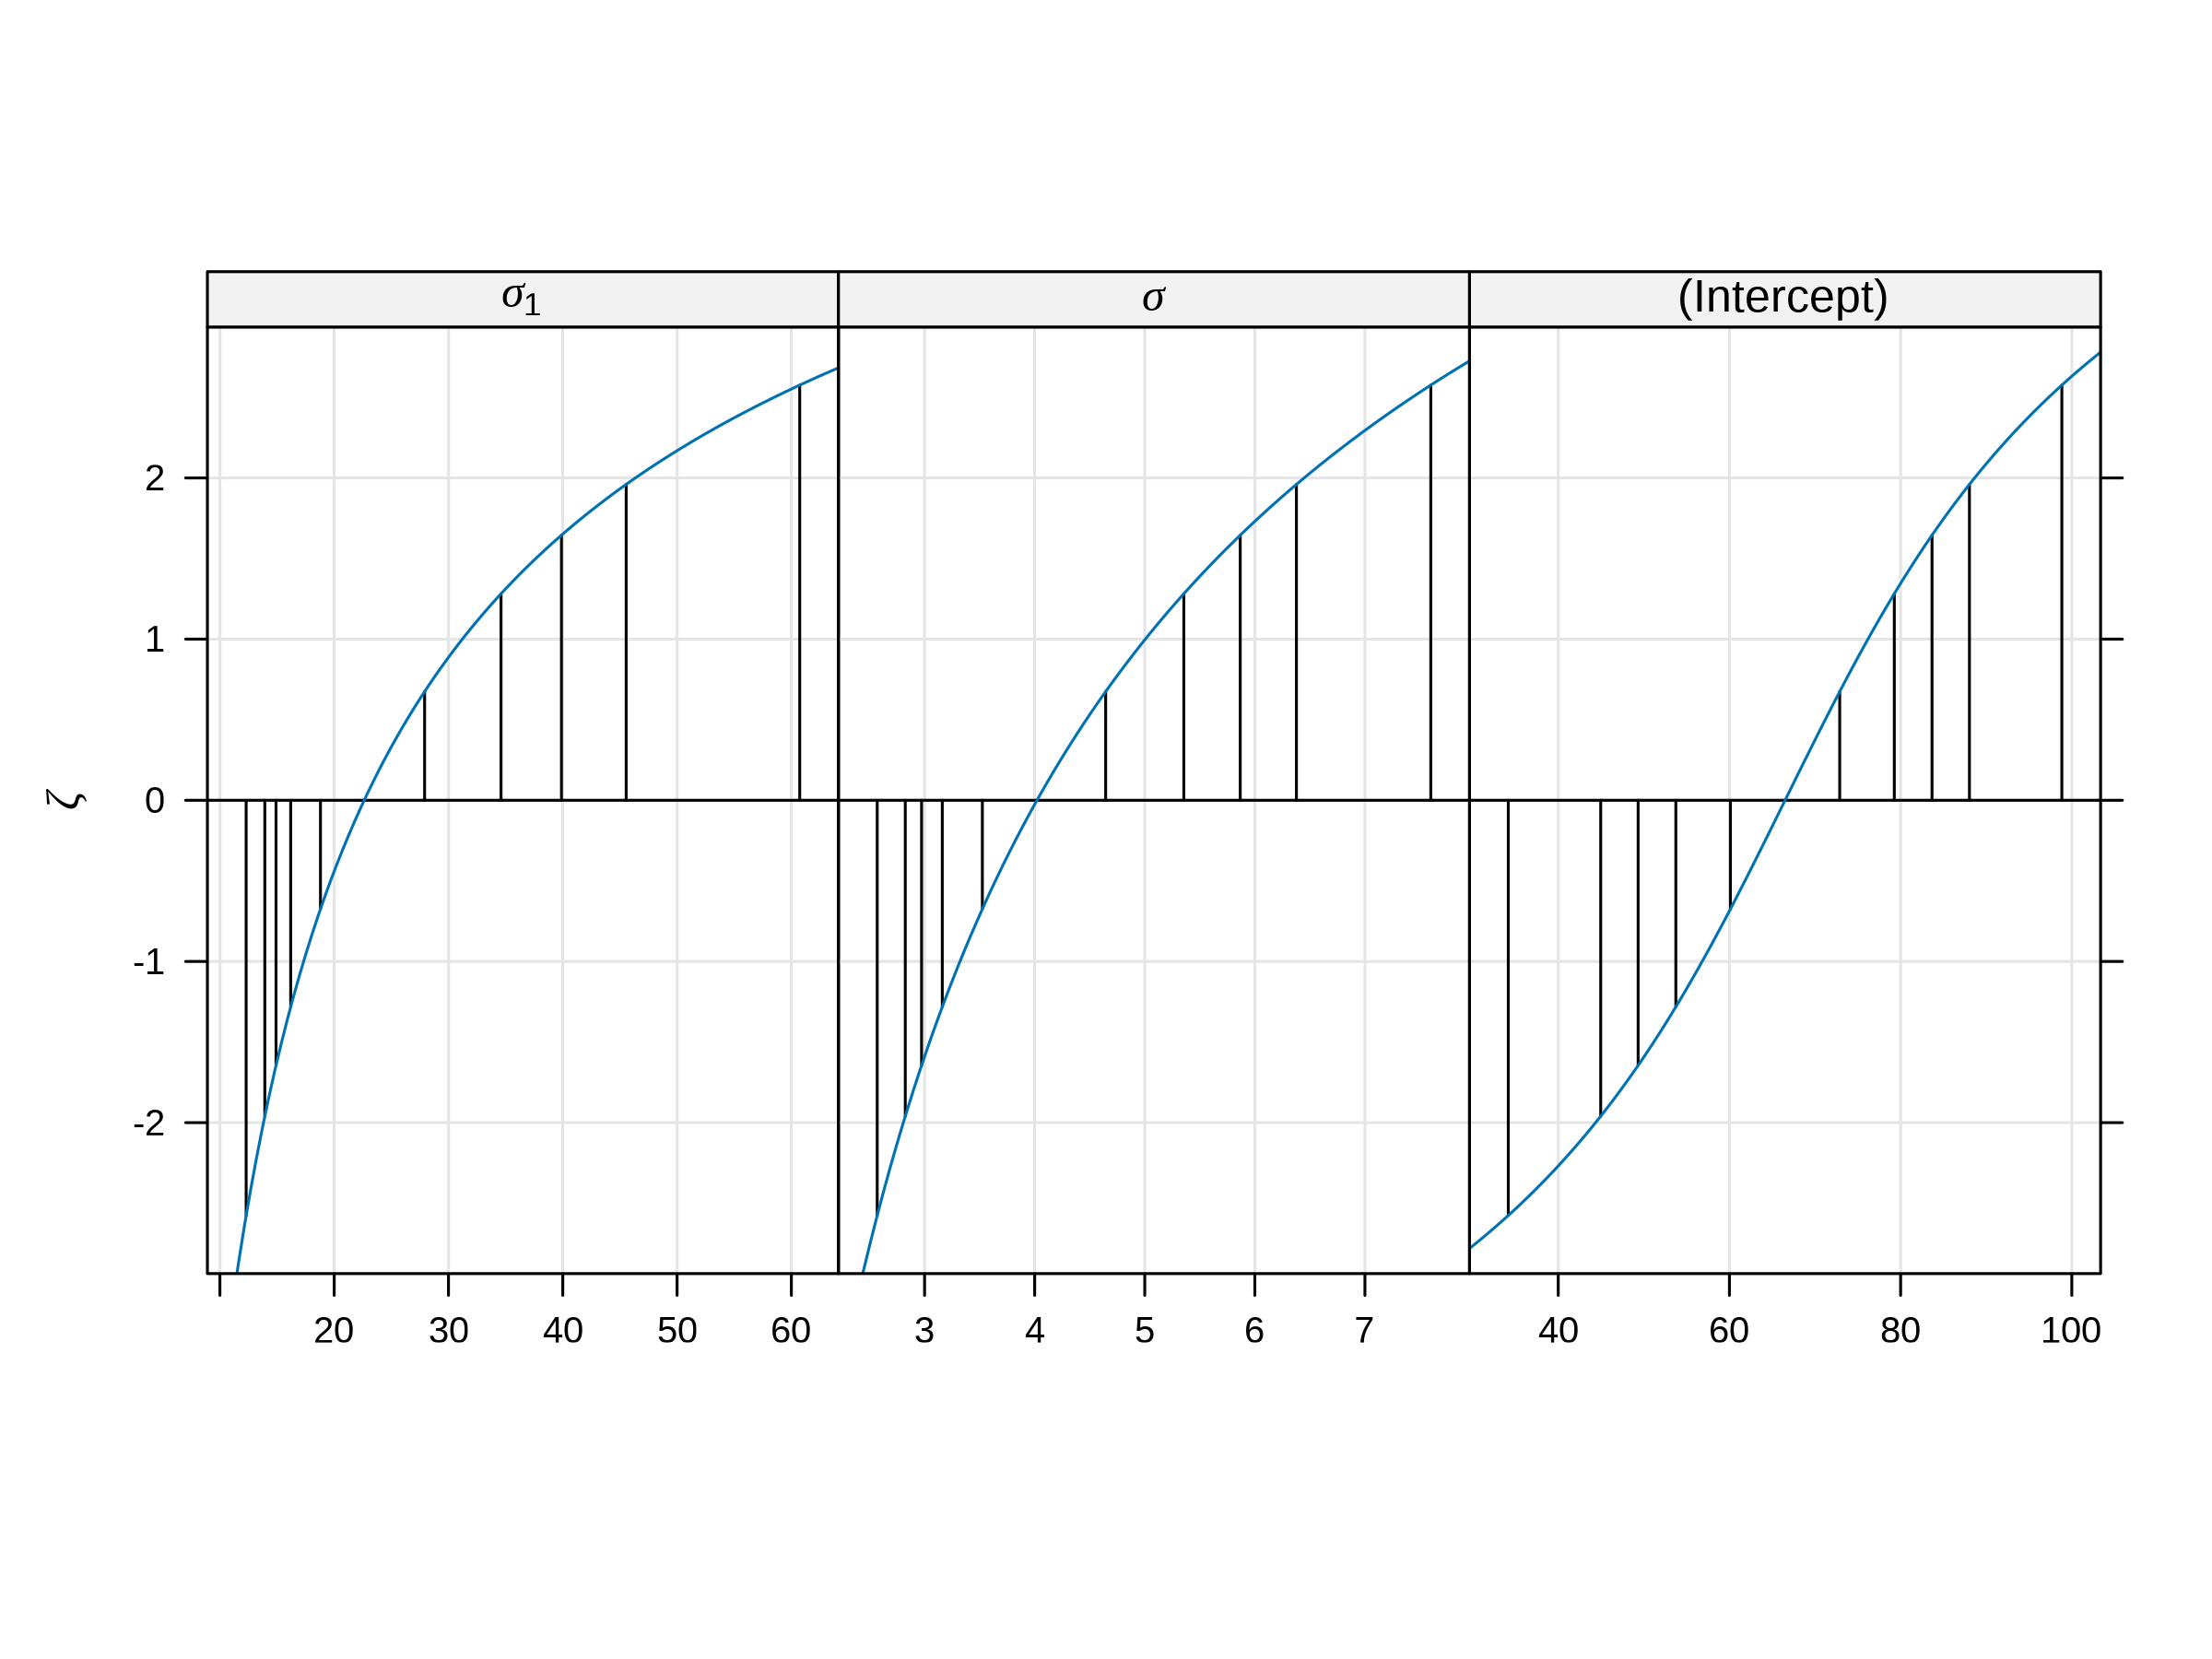

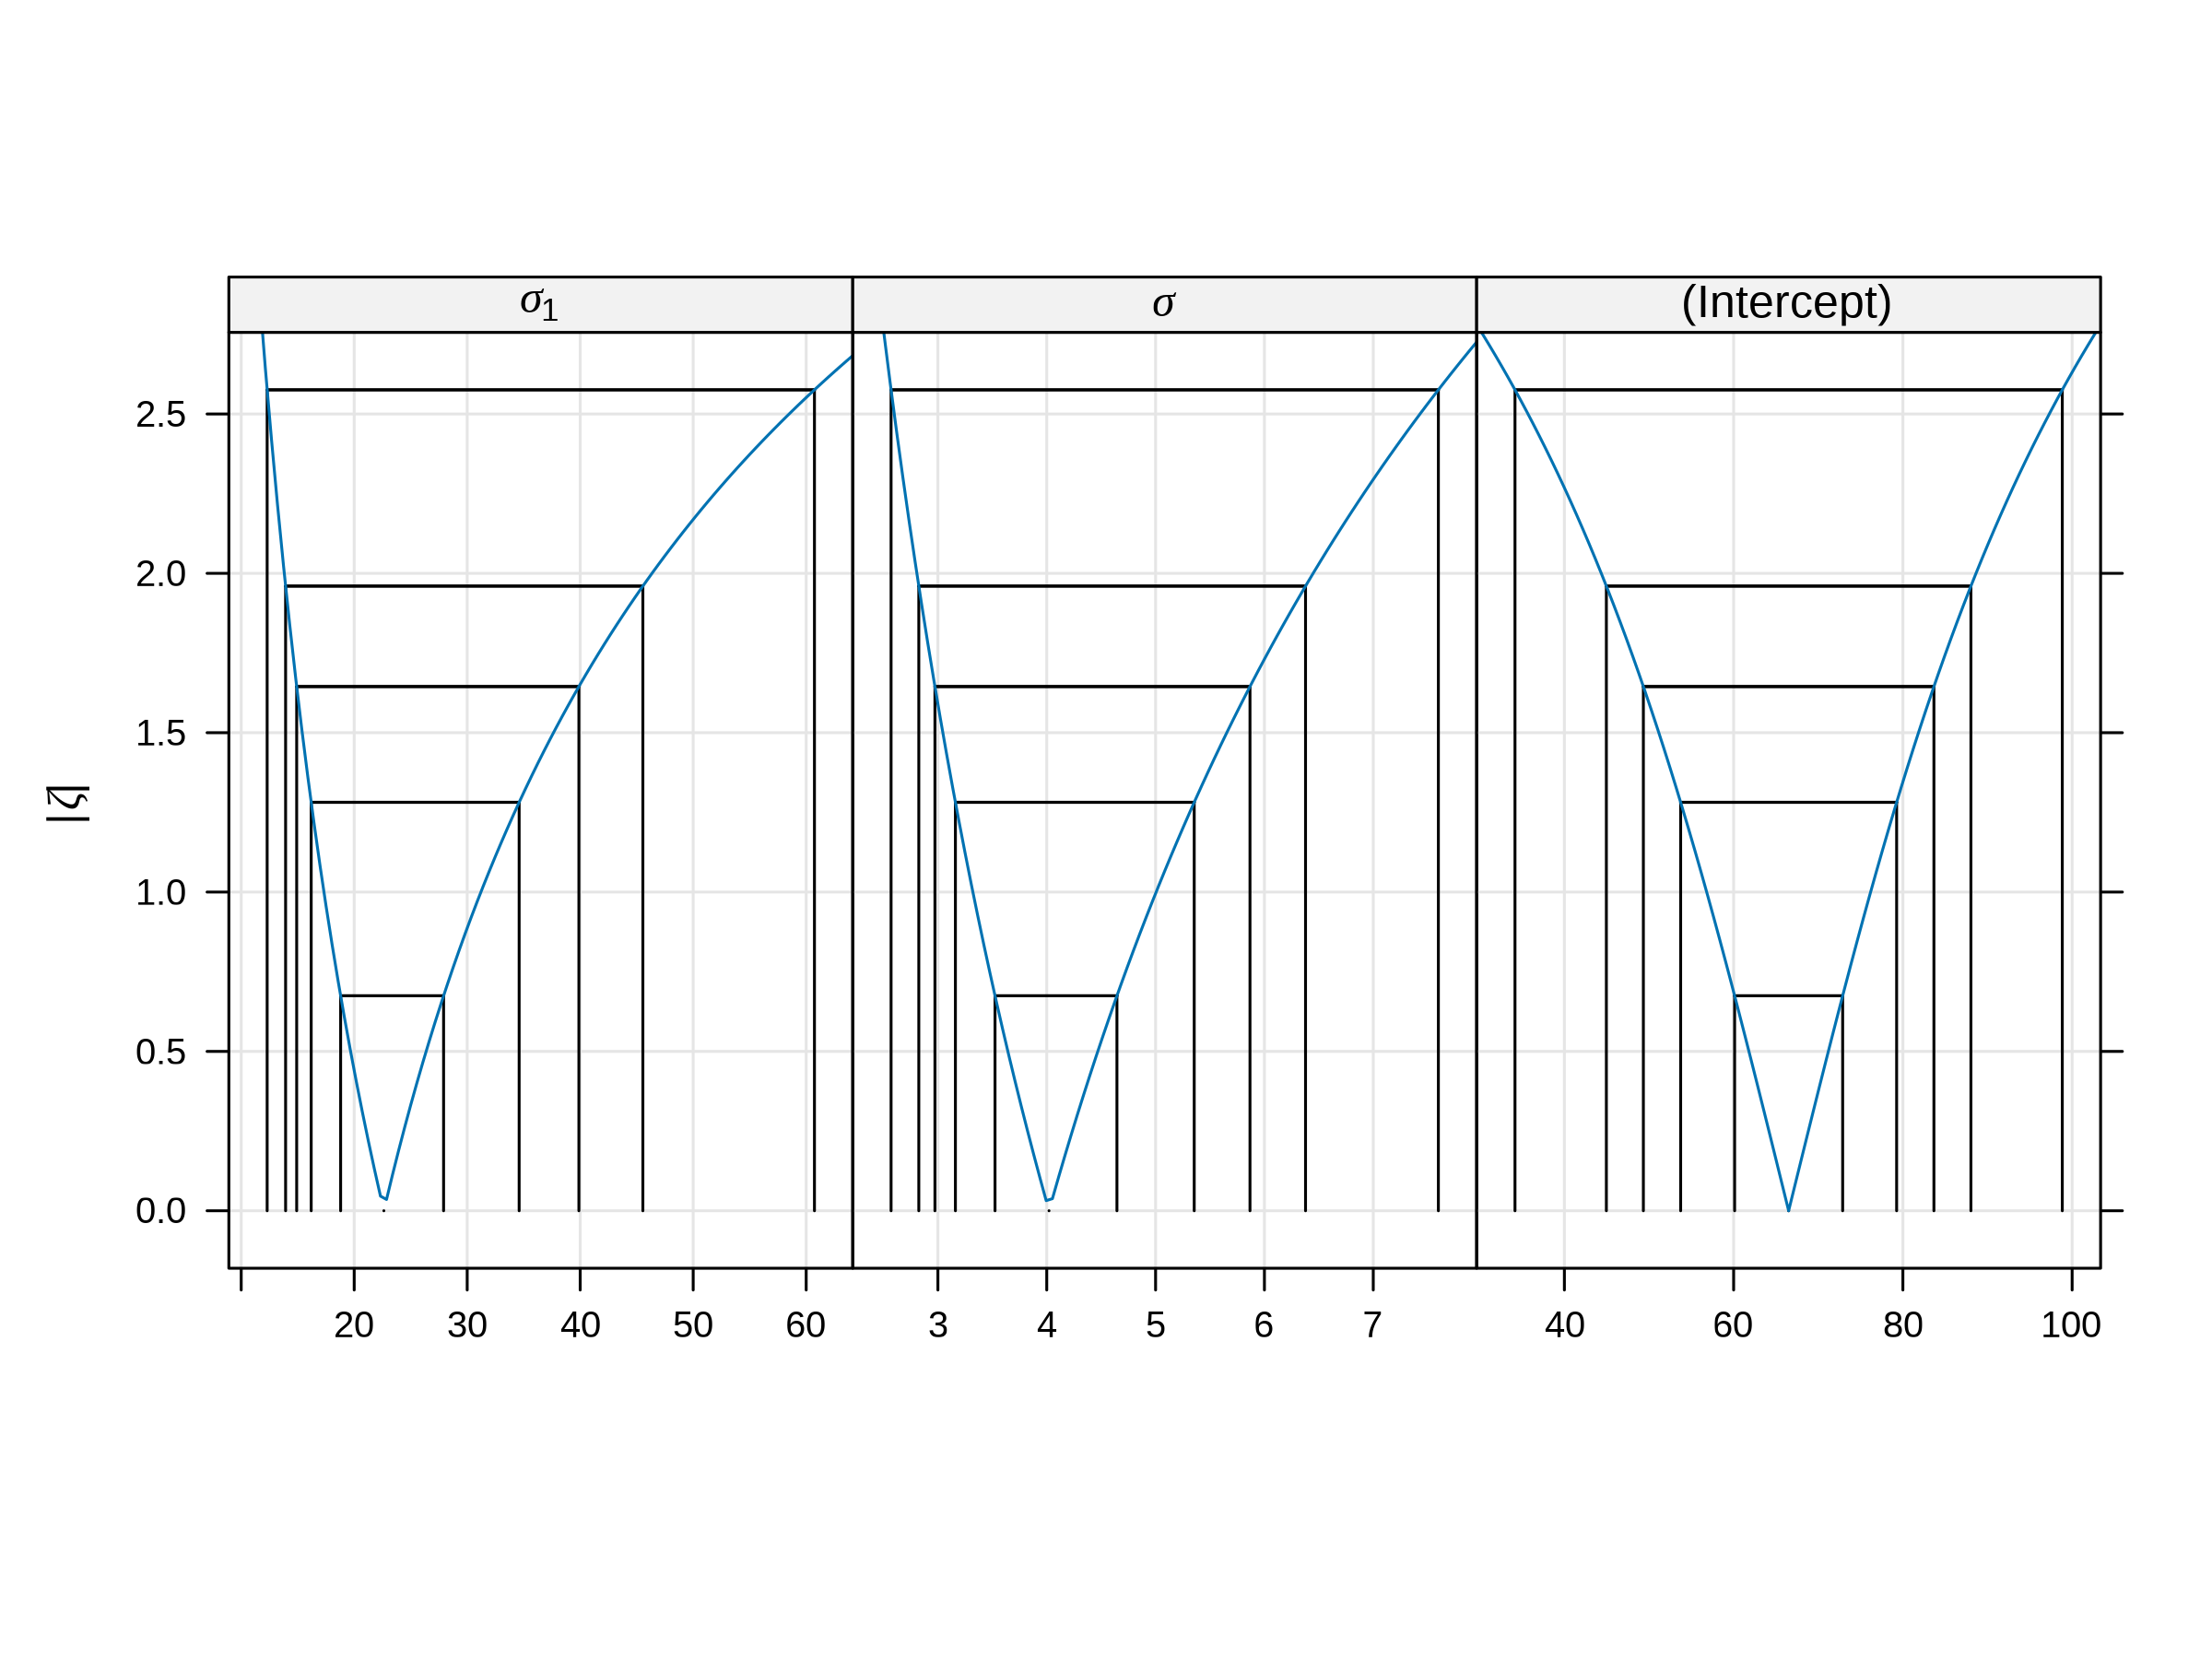

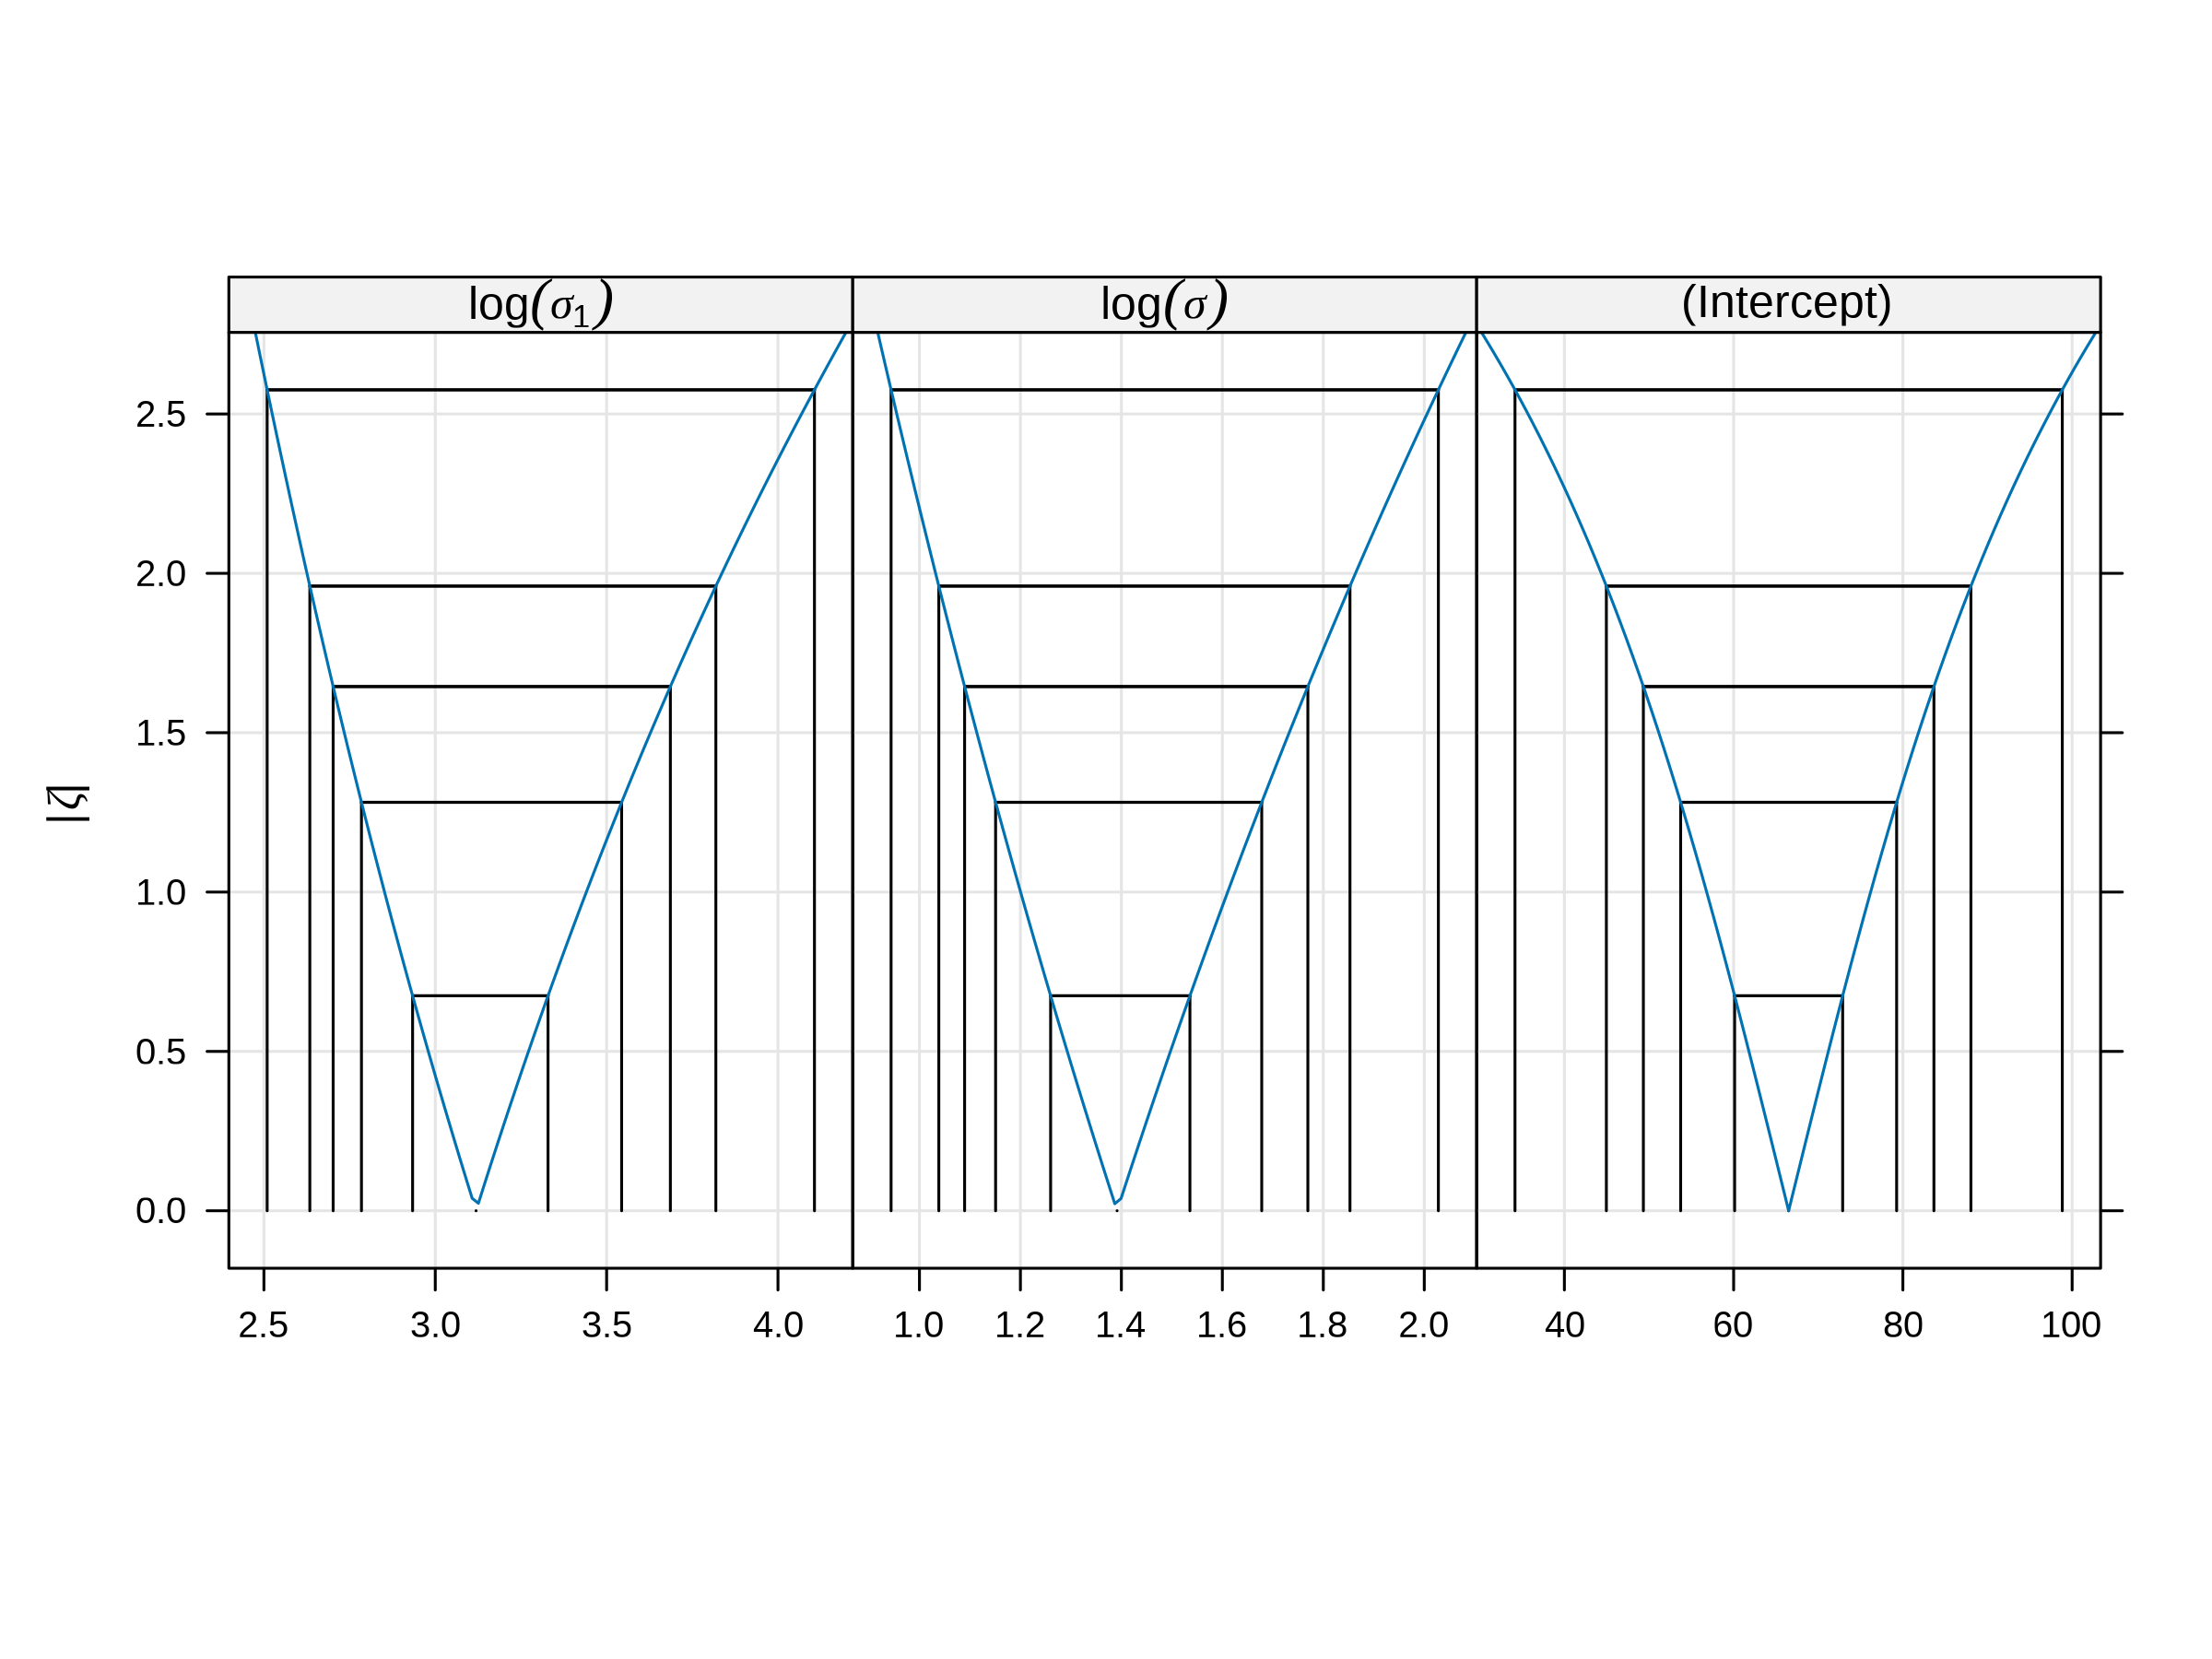

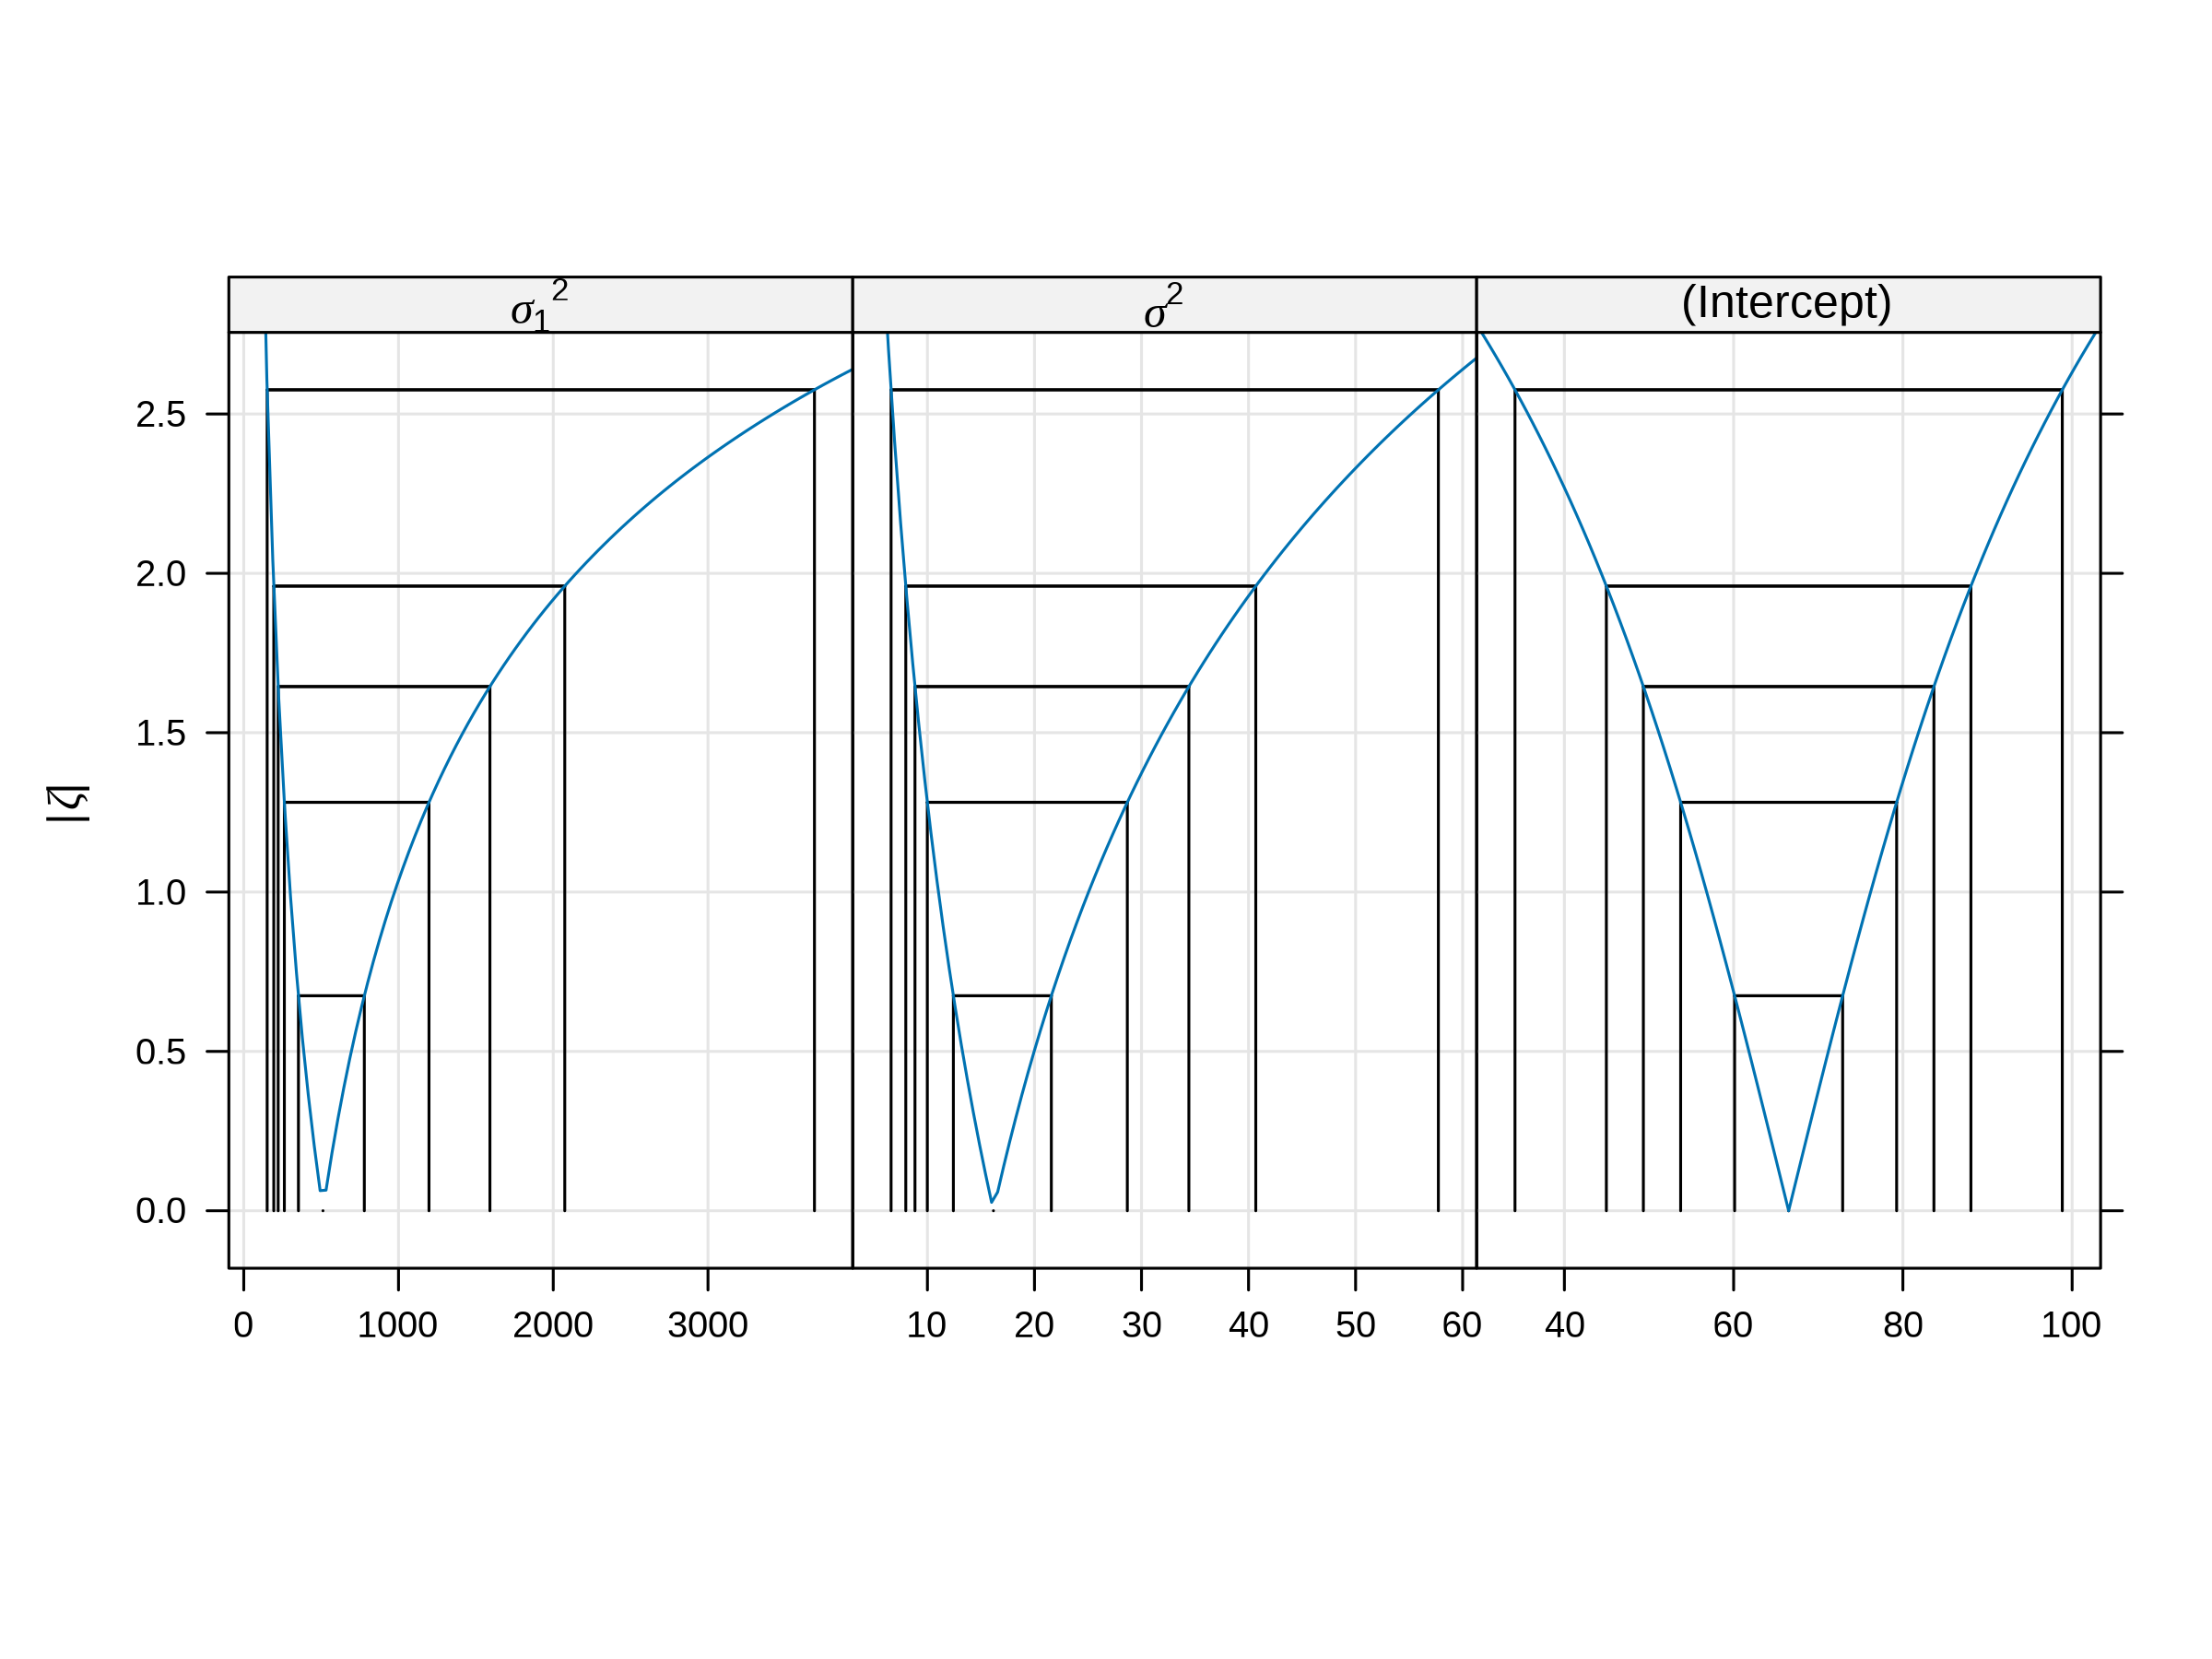

In [24]:
pr01_ex <- profile(fm01_railML)

options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
pr01_ex %>% xyplot(aspect = 1.5)
pr01_ex %>% xyplot(aspect = 1.5, absVal = TRUE)
pr01_ex %>% logProf() %>% xyplot(aspect = 1.5, absVal = TRUE)
pr01_ex %>% varianceProf() %>% xyplot(aspect = 1.5, absVal = TRUE)

### Models with Multiple Random Effects

#### Crossed Random Effects

In [ ]:
data("Penicillin")

In [26]:
Penicillin %>% str()
Penicillin %>% summary()
Penicillin %>% head()

'data.frame':	144 obs. of  3 variables:
 $ diameter: num  27 23 26 23 23 21 27 23 26 23 ...
 $ plate   : Factor w/ 24 levels "a","b","c","d",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ sample  : Factor w/ 6 levels "A","B","C","D",..: 1 2 3 4 5 6 1 2 3 4 ...


    diameter         plate     sample
 Min.   :18.00   a      :  6   A:24  
 1st Qu.:22.00   b      :  6   B:24  
 Median :23.00   c      :  6   C:24  
 Mean   :22.97   d      :  6   D:24  
 3rd Qu.:24.00   e      :  6   E:24  
 Max.   :27.00   f      :  6   F:24  
                 (Other):108         

diameter plate sample
1 27       a     A     
2 23       a     B     
3 26       a     C     
4 23       a     D     
5 23       a     E     
6 21       a     F

In [27]:
Penicillin %>% xtabs(~ sample + plate, .)

      plate
sample a b c d e f g h i j k l m n o p q r s t u v w x
     A 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
     B 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
     C 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
     D 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
     E 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
     F 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

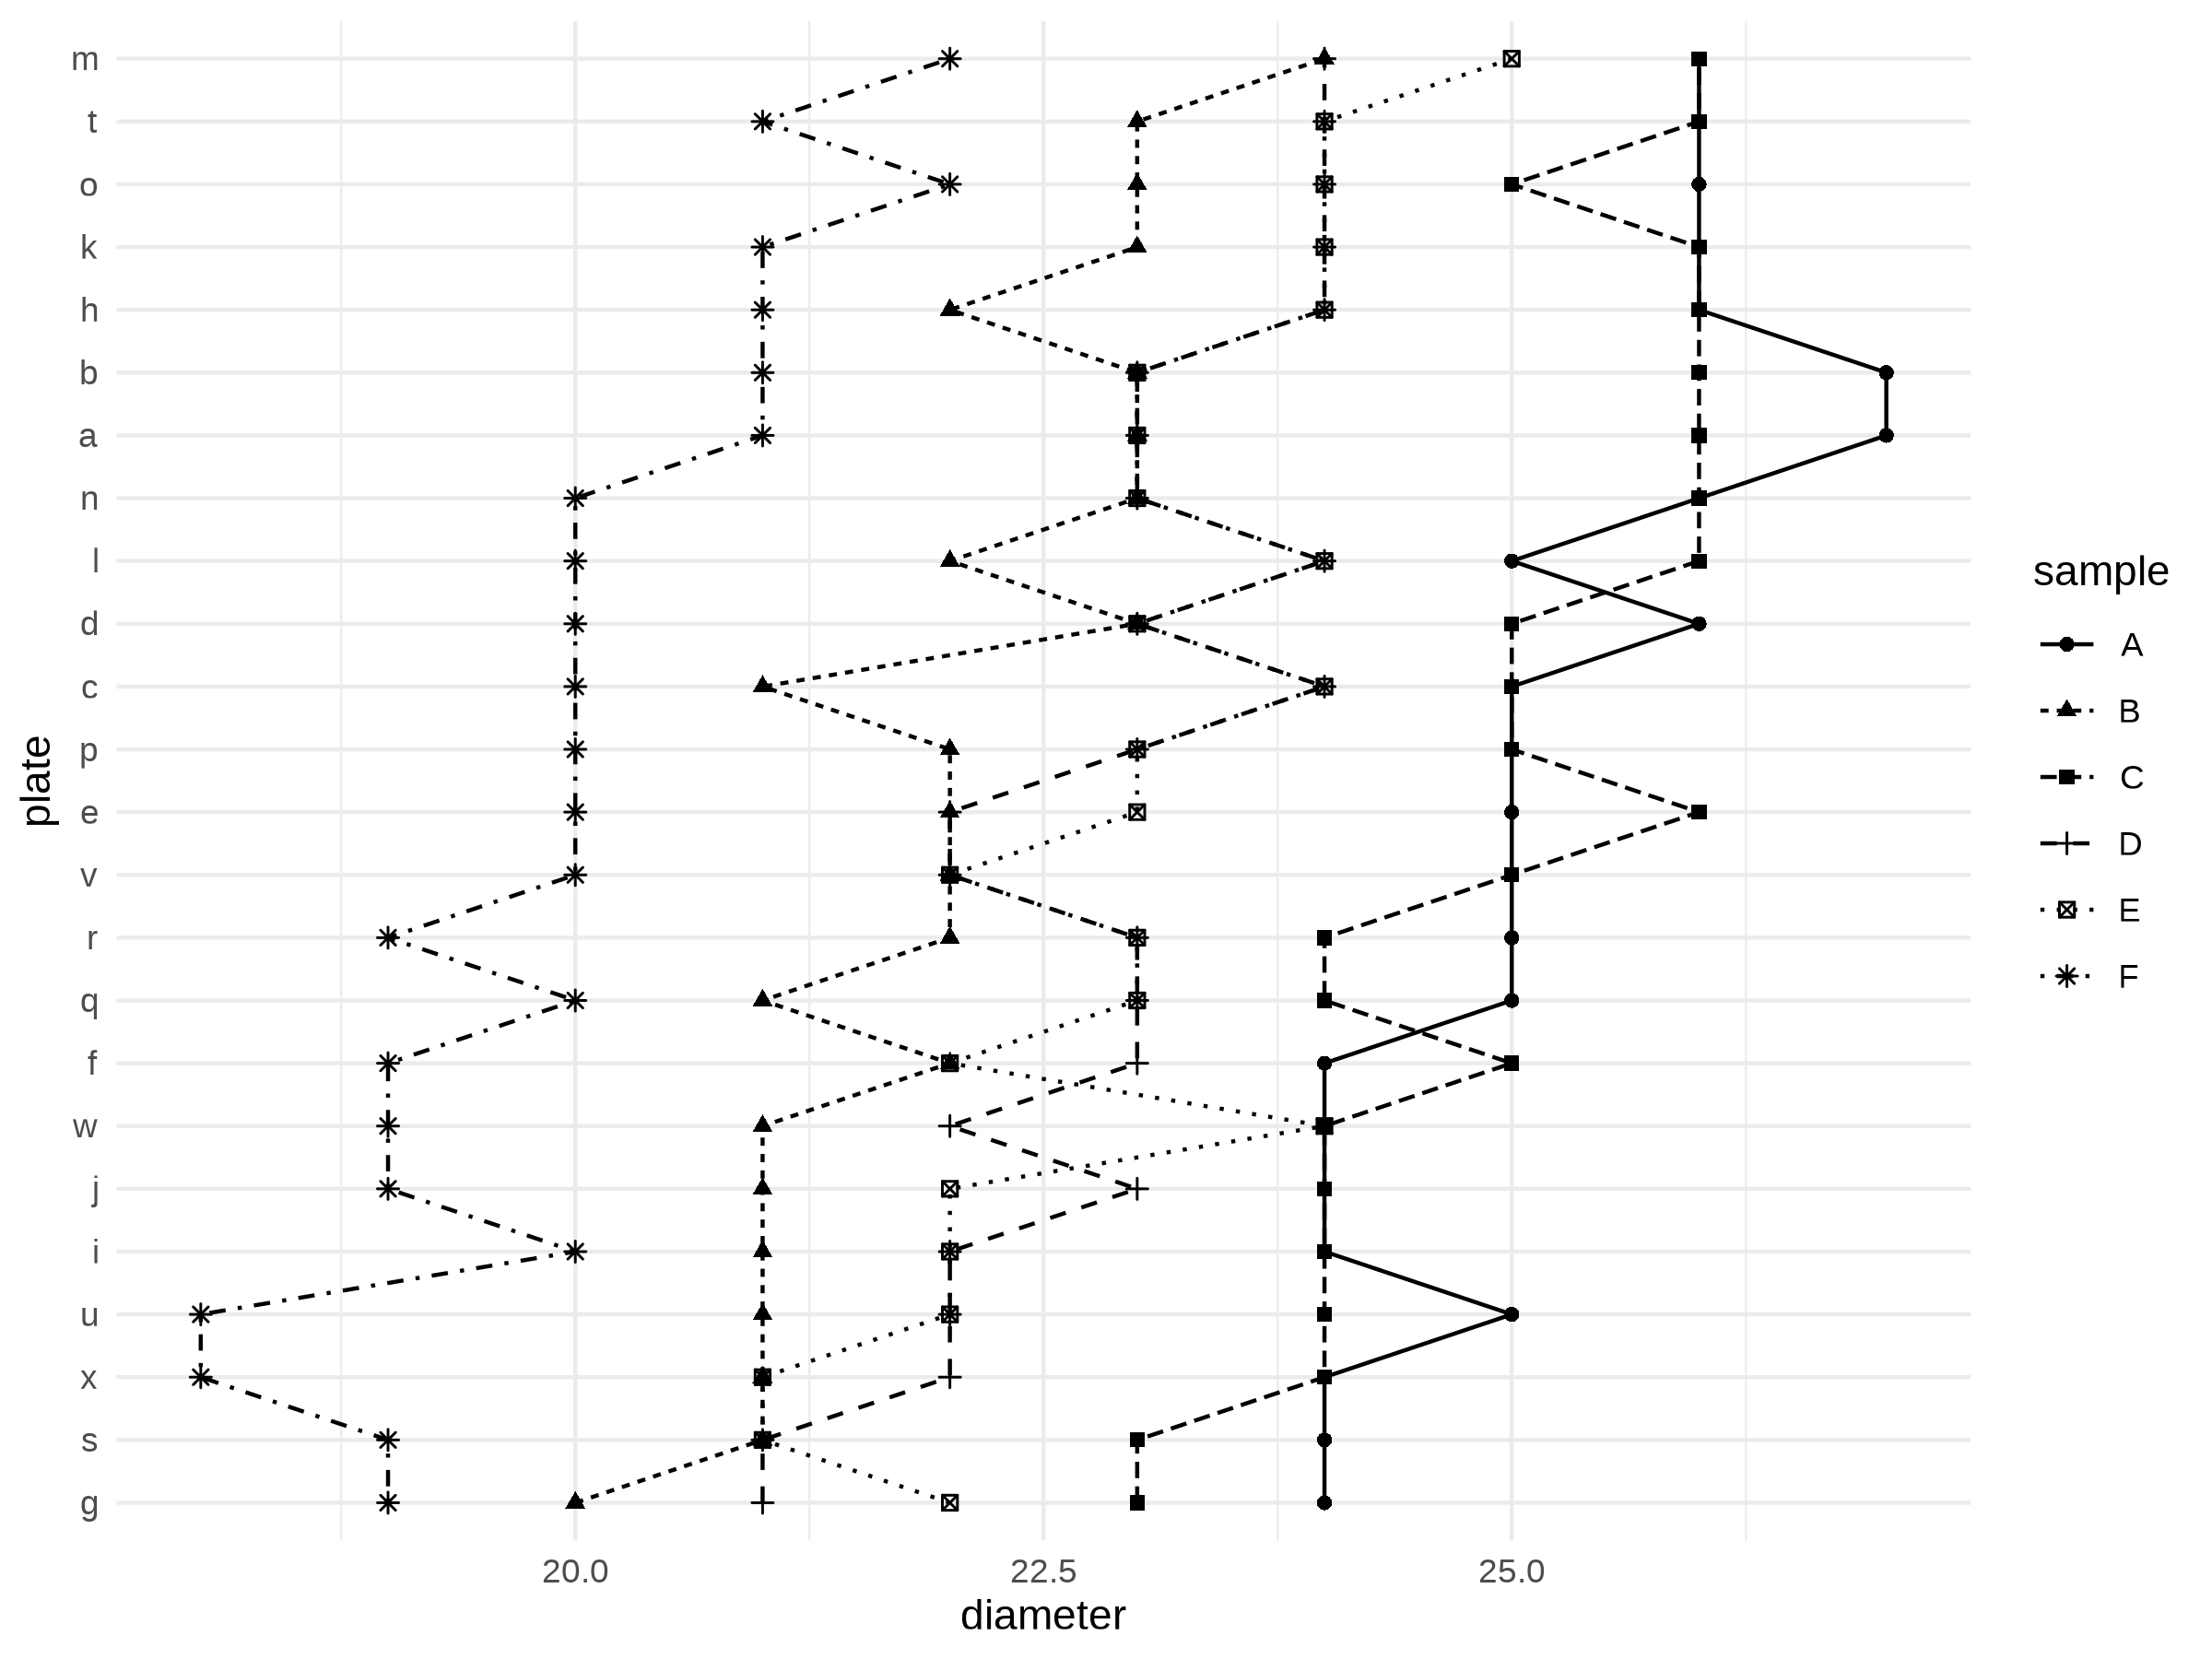

In [28]:
Penicillin %>%
    mutate(plate = fct_reorder(plate, diameter, mean)) %>%
    ggplot(aes(x = diameter, y = plate)) +
    geom_point(aes(shape = sample)) +
    geom_line(aes(linetype = sample, group = sample), orientation = "y") +
    theme_minimal()
    # geom_line(aes(linetype = sample, group = sample))


In [29]:
fm03 <- lmer(formula = diameter ~ 1 + (1 | plate) + (1 | sample), data = Penicillin)
fm03 %>% summary()

Linear mixed model fit by REML ['lmerMod']
Formula: diameter ~ 1 + (1 | plate) + (1 | sample)
   Data: Penicillin

REML criterion at convergence: 330.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.07923 -0.67140  0.06292  0.58377  2.97959 

Random effects:
 Groups   Name        Variance Std.Dev.
 plate    (Intercept) 0.7169   0.8467  
 sample   (Intercept) 3.7311   1.9316  
 Residual             0.3024   0.5499  
Number of obs: 144, groups:  plate, 24; sample, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  22.9722     0.8086   28.41

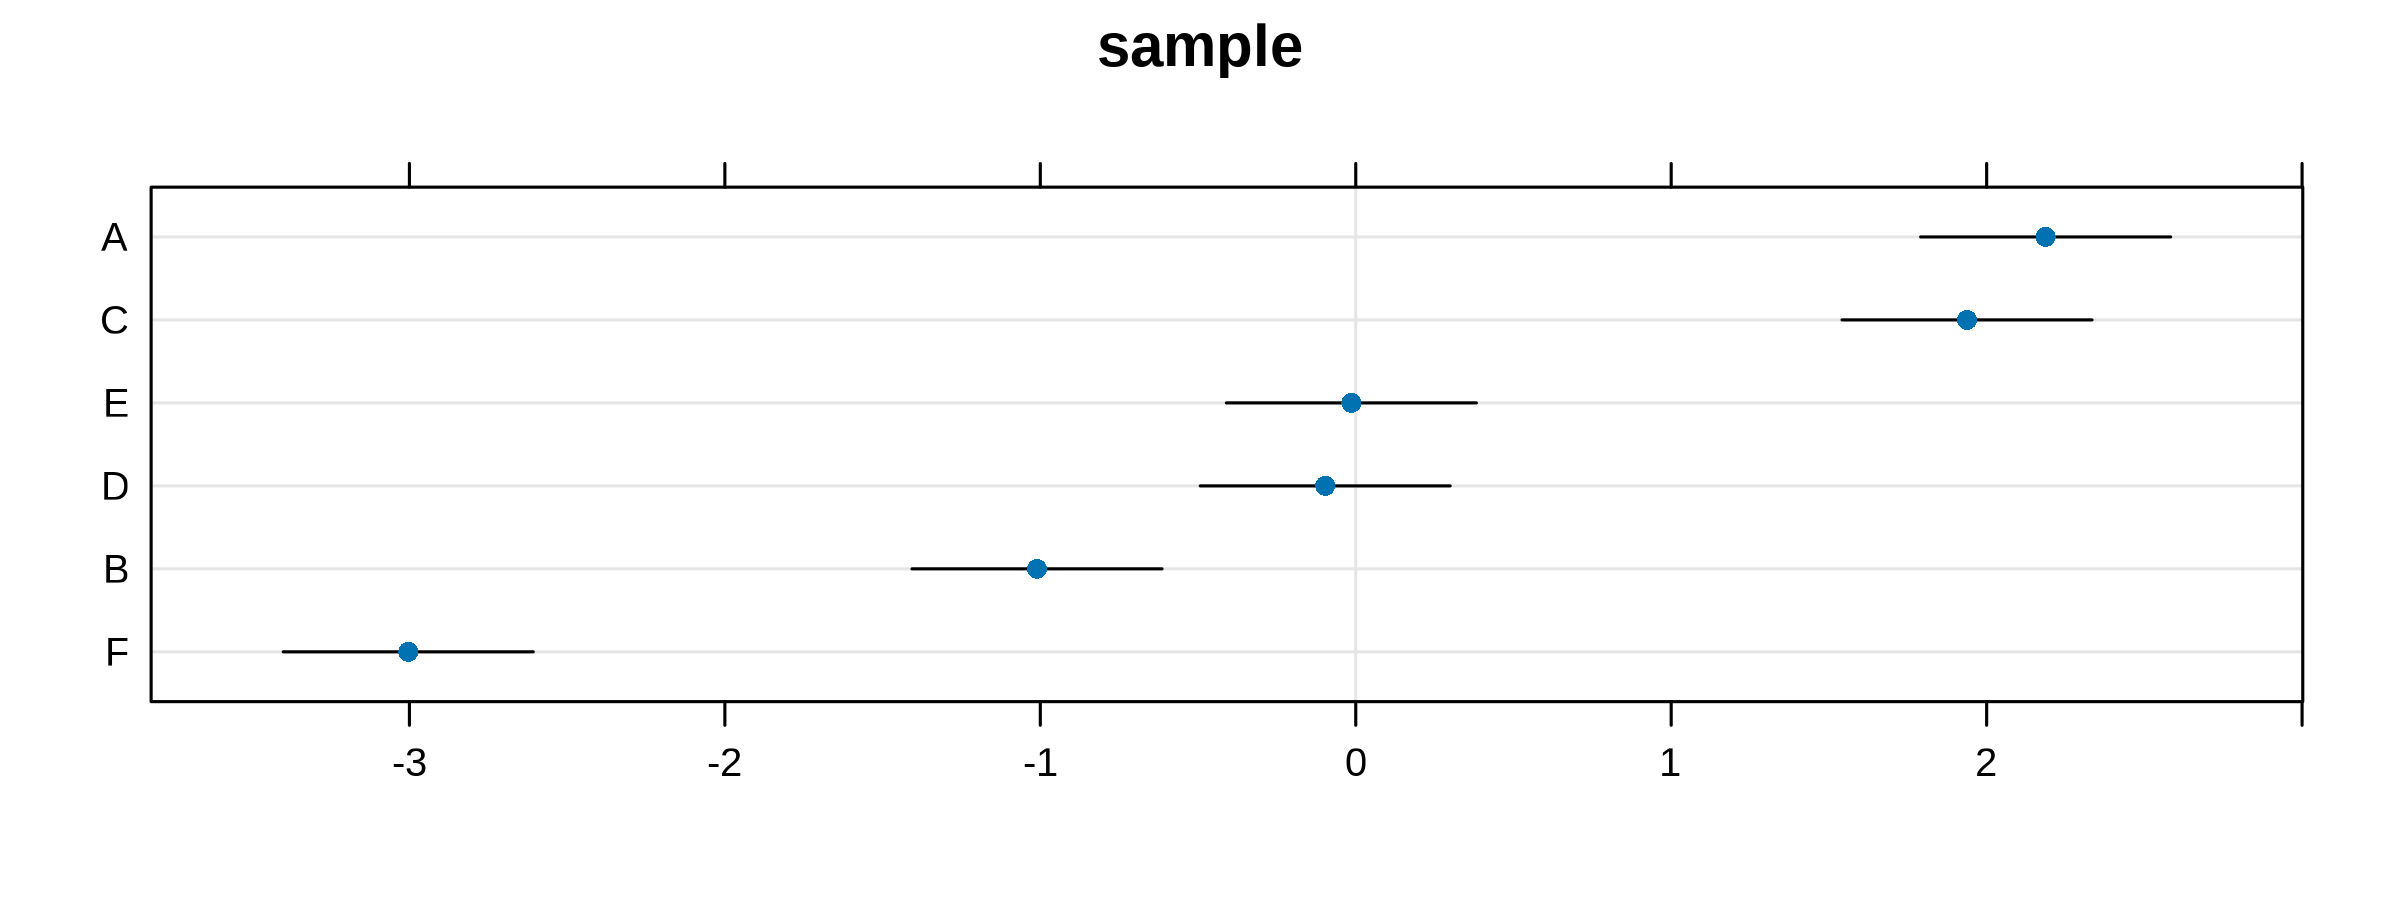

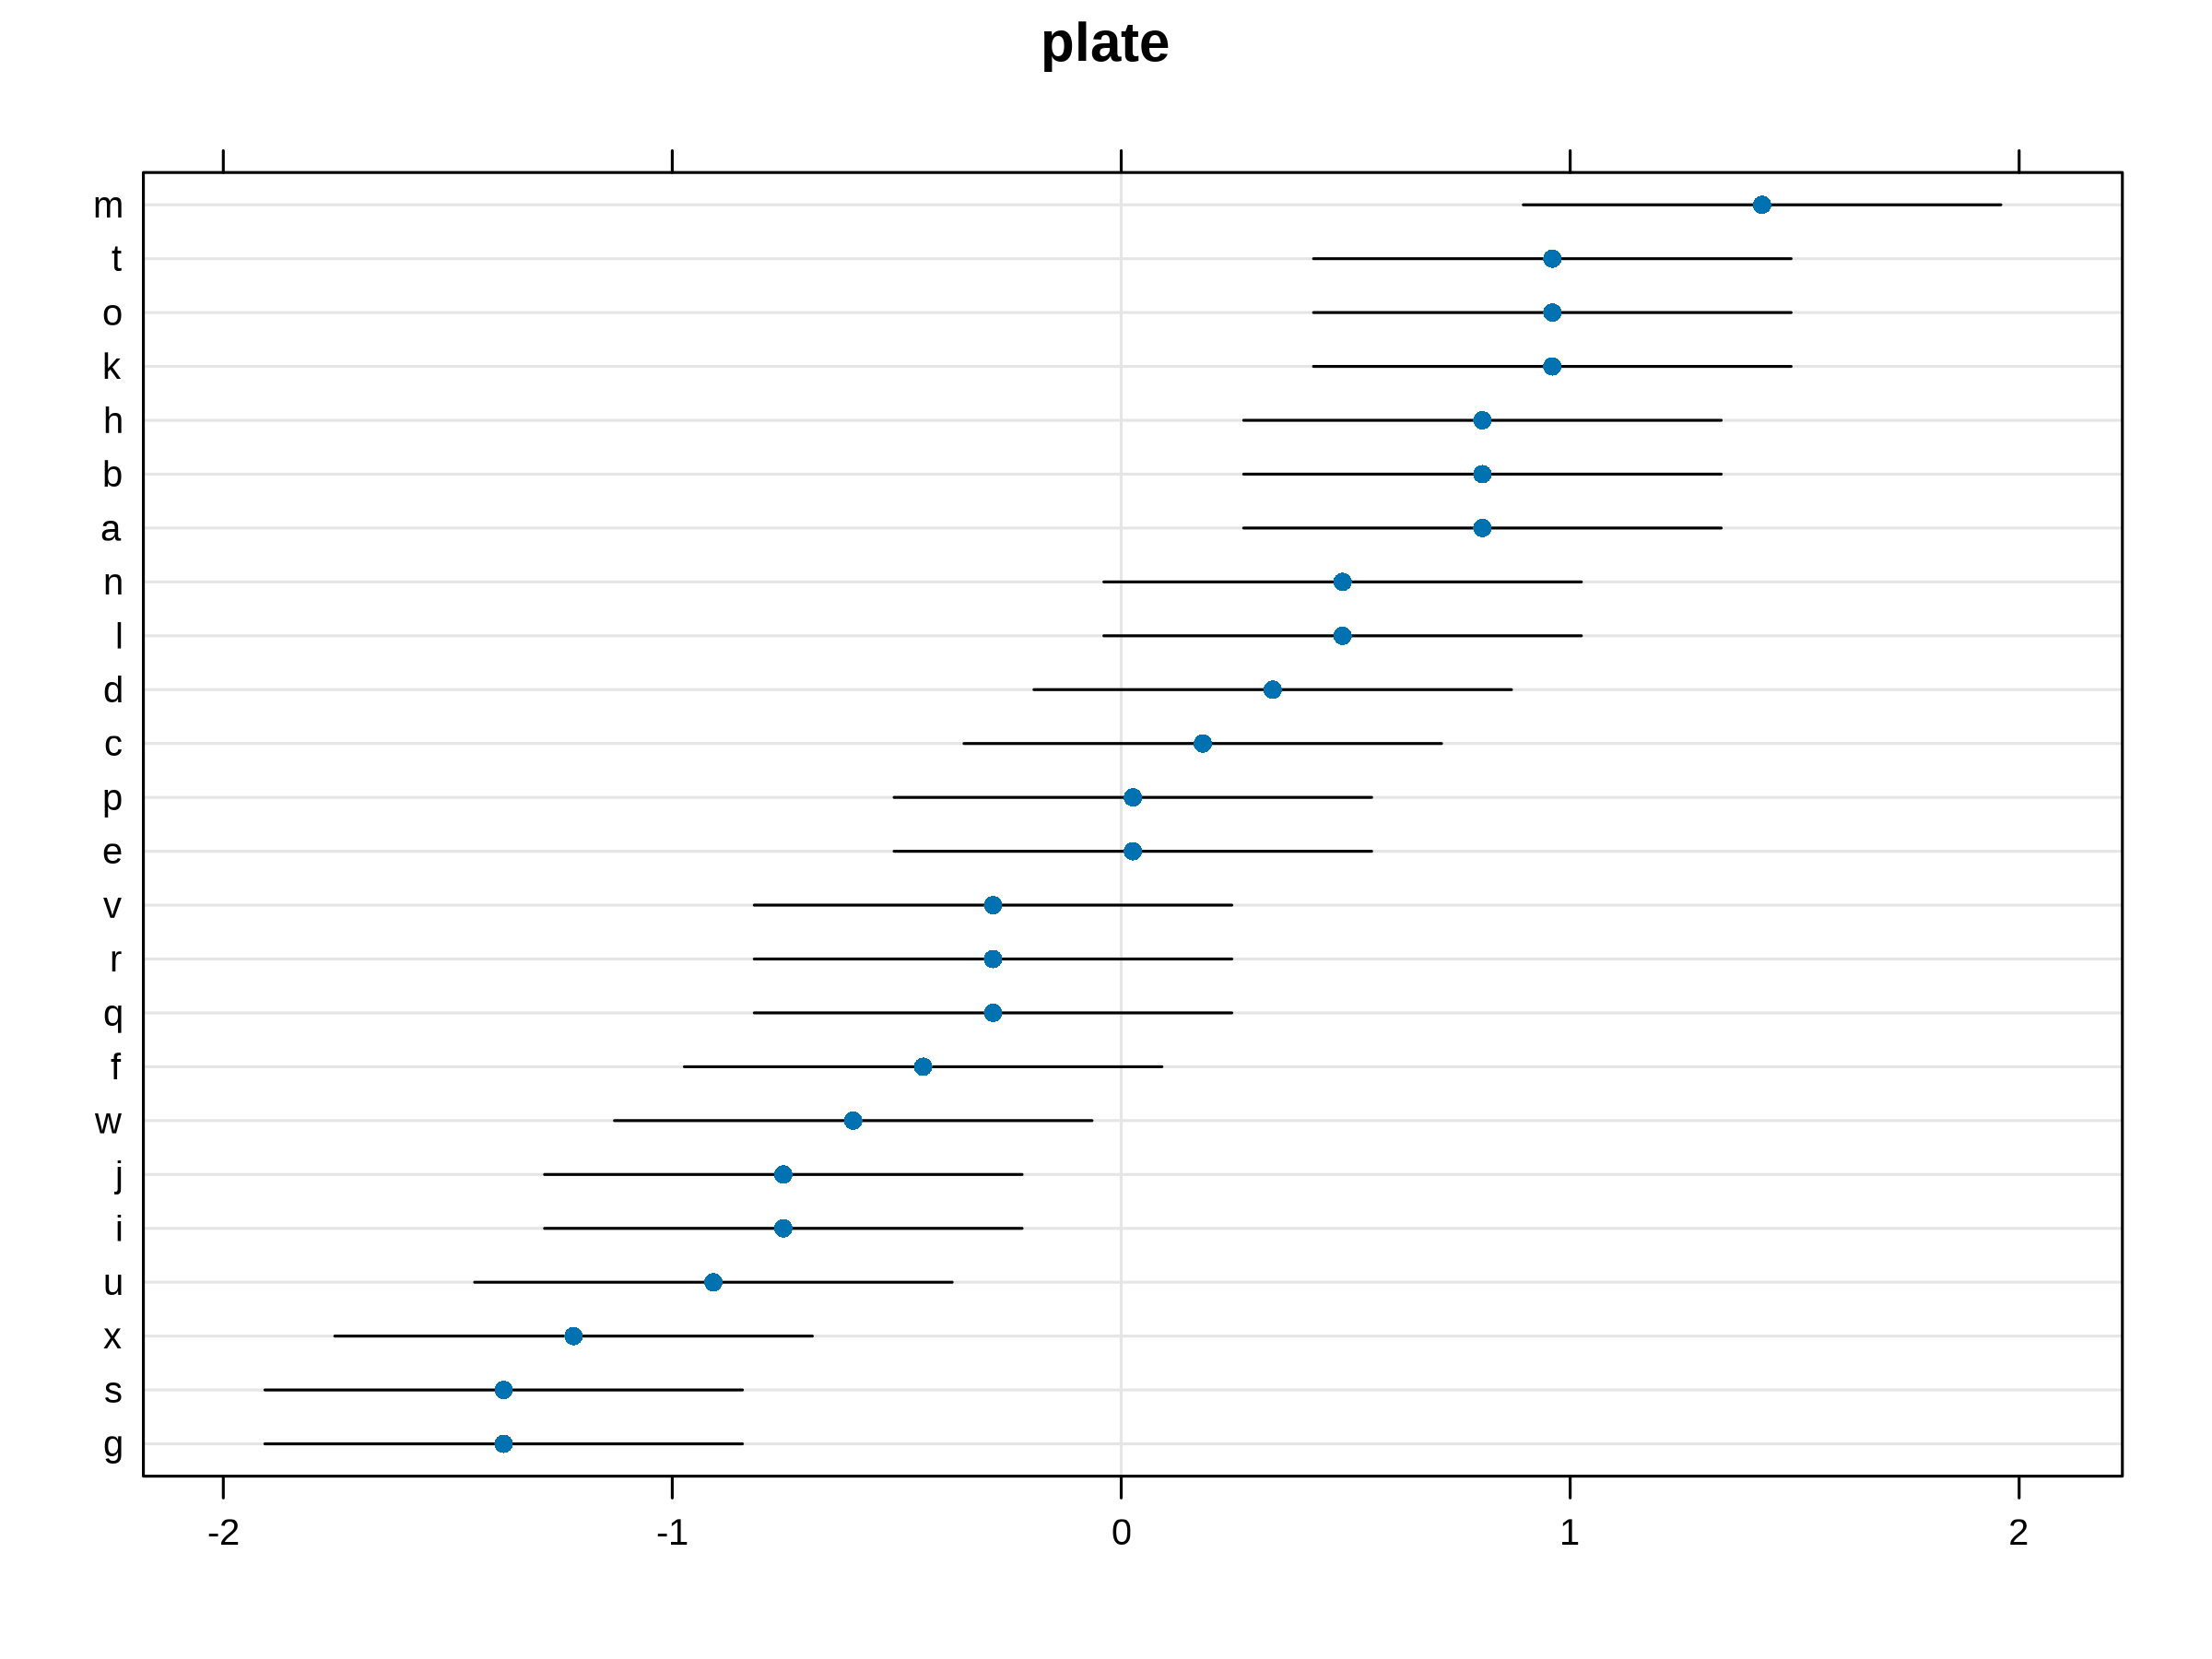

In [30]:
fm03_dotplots <- dotplot(ranef(fm03, condVar=TRUE), strip = FALSE)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
fm03_dotplots$sample
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
fm03_dotplots$plate

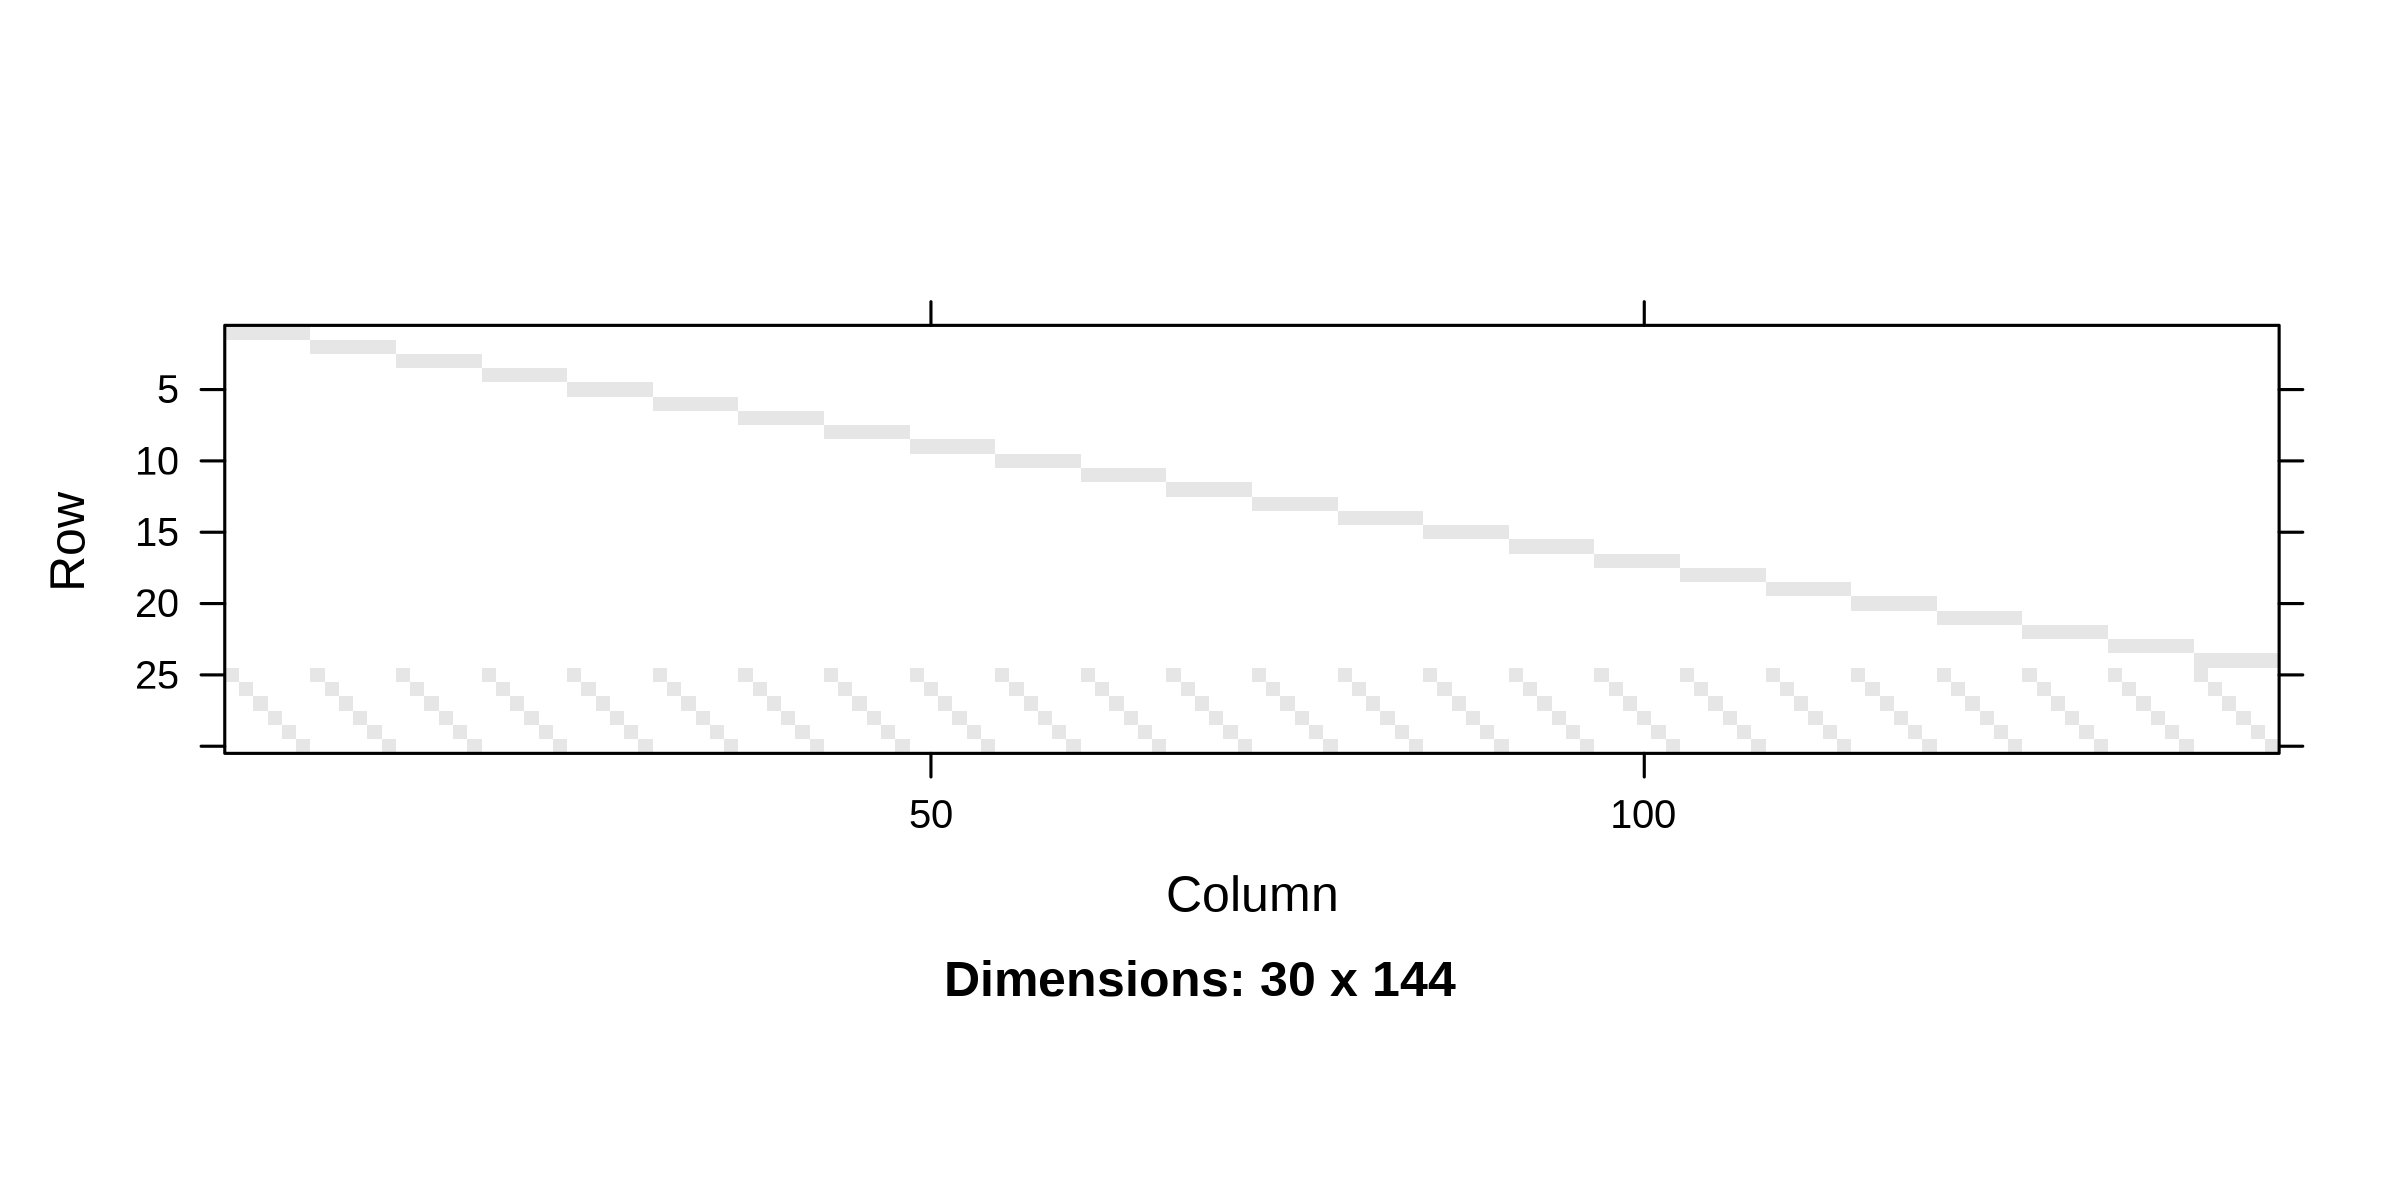

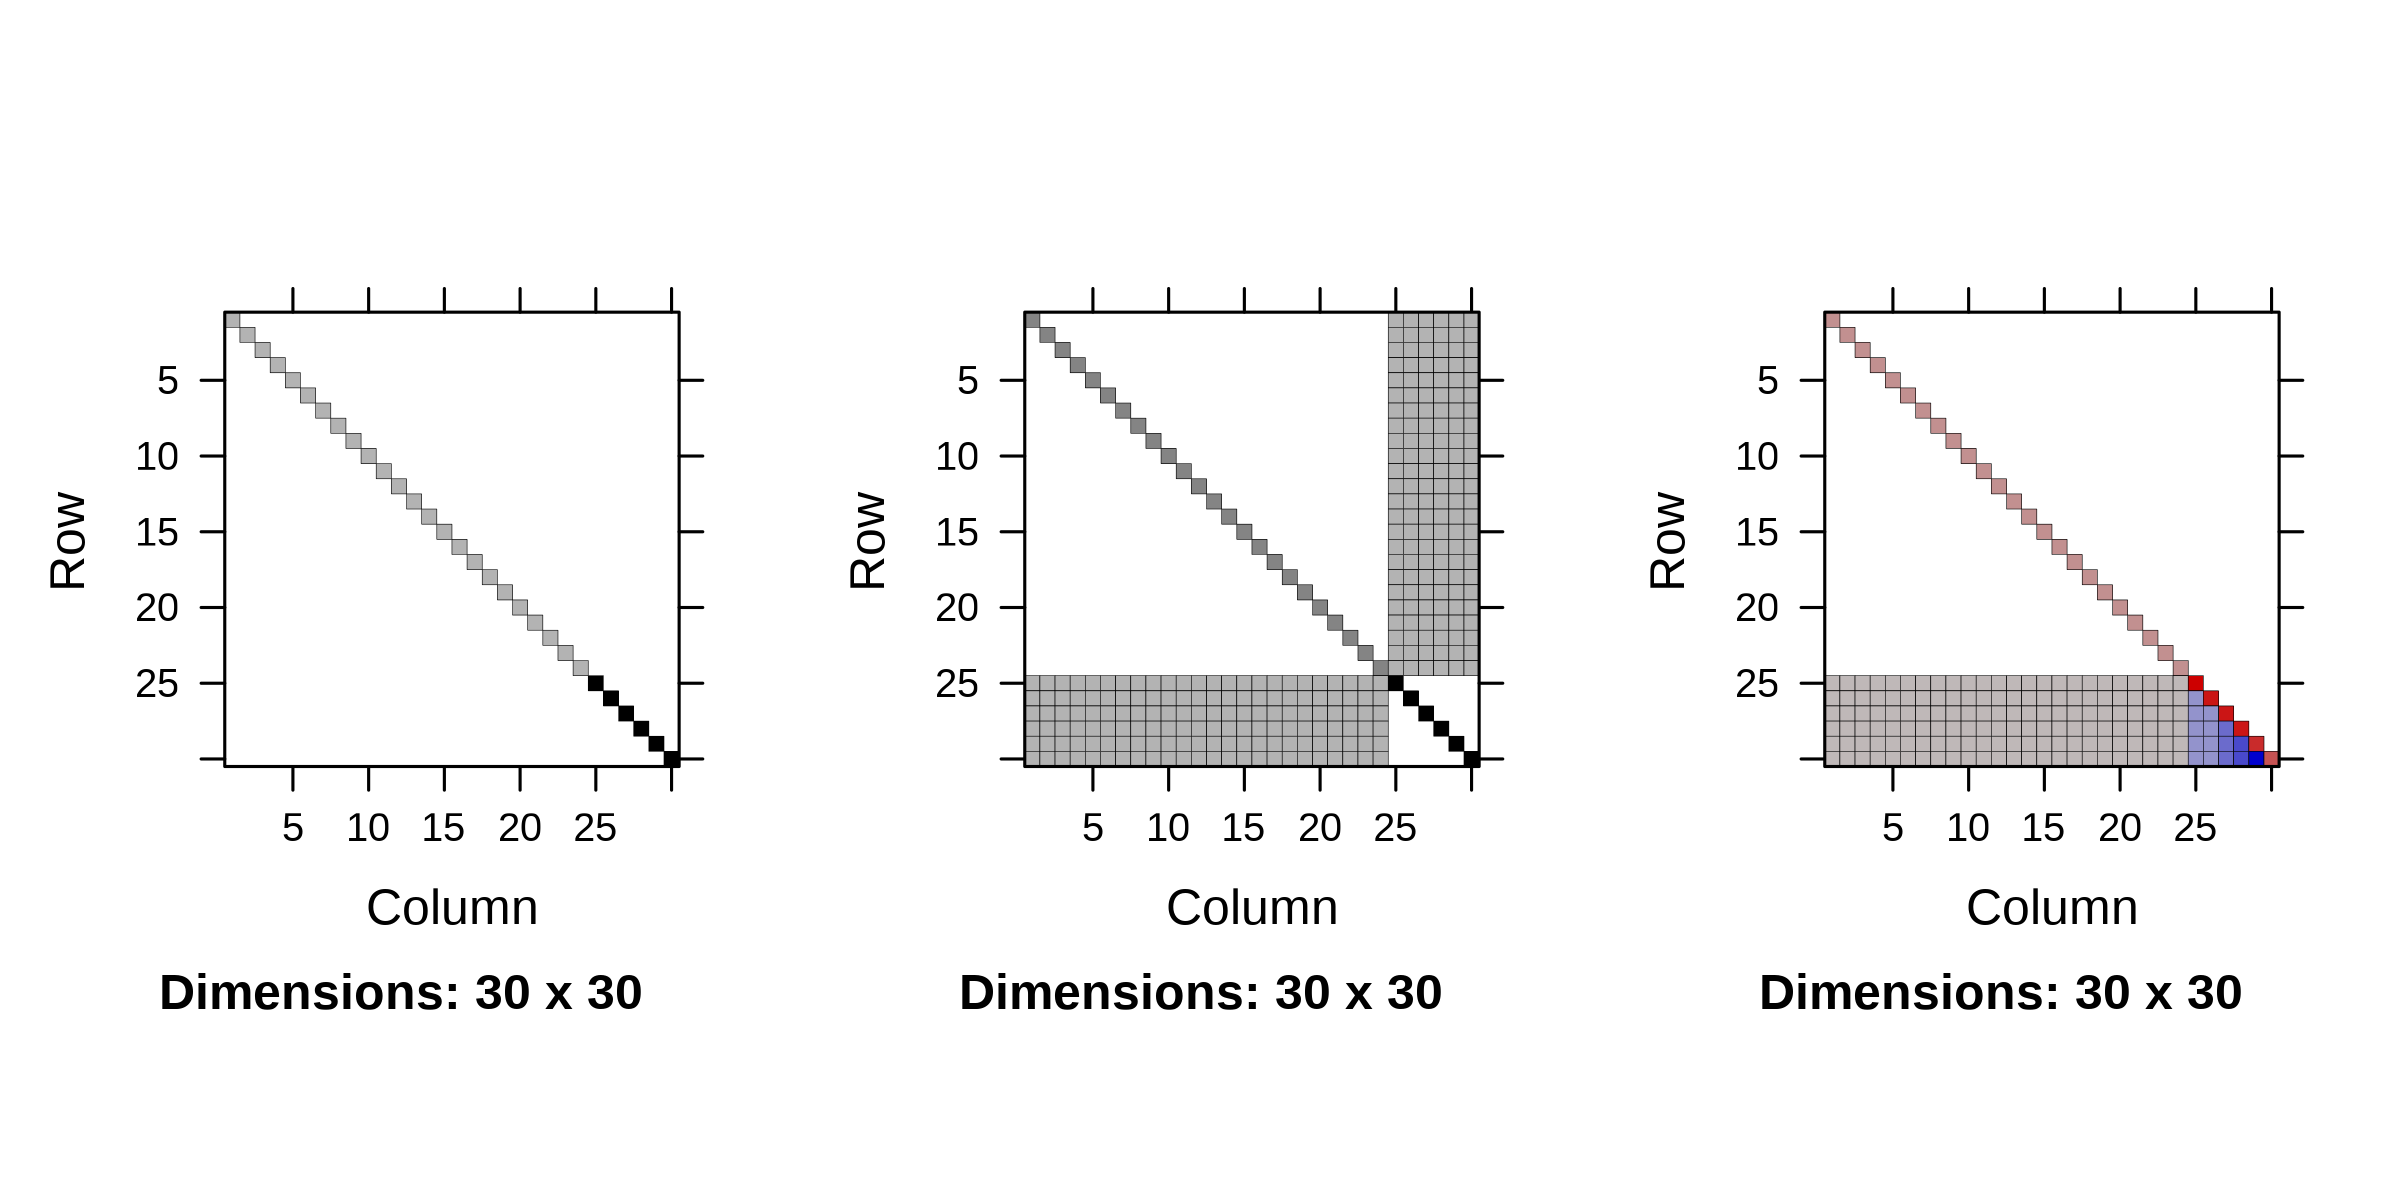

In [31]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)
getME(fm03, "Z") %>% t() %>% image()
Z <- getME(fm03, "Z")
ZtZ <- t(Z) %*% Z

getME(fm03, "Lambda") %>% image() %>% print(split=c(1,1,3,1), more=TRUE)
ZtZ %>% image() %>% print(split=c(2,1,3,1), more = TRUE)
getME(fm03, "L") %>% image(colorkey = FALSE) %>% print(split=c(3,1,3,1))




2.5 %      97.5 %    
.sig01       0.6335660  1.1821040
.sig02       1.0957893  3.5562910
.sigma       0.4858454  0.6294535
(Intercept) 21.2666274 24.6778176

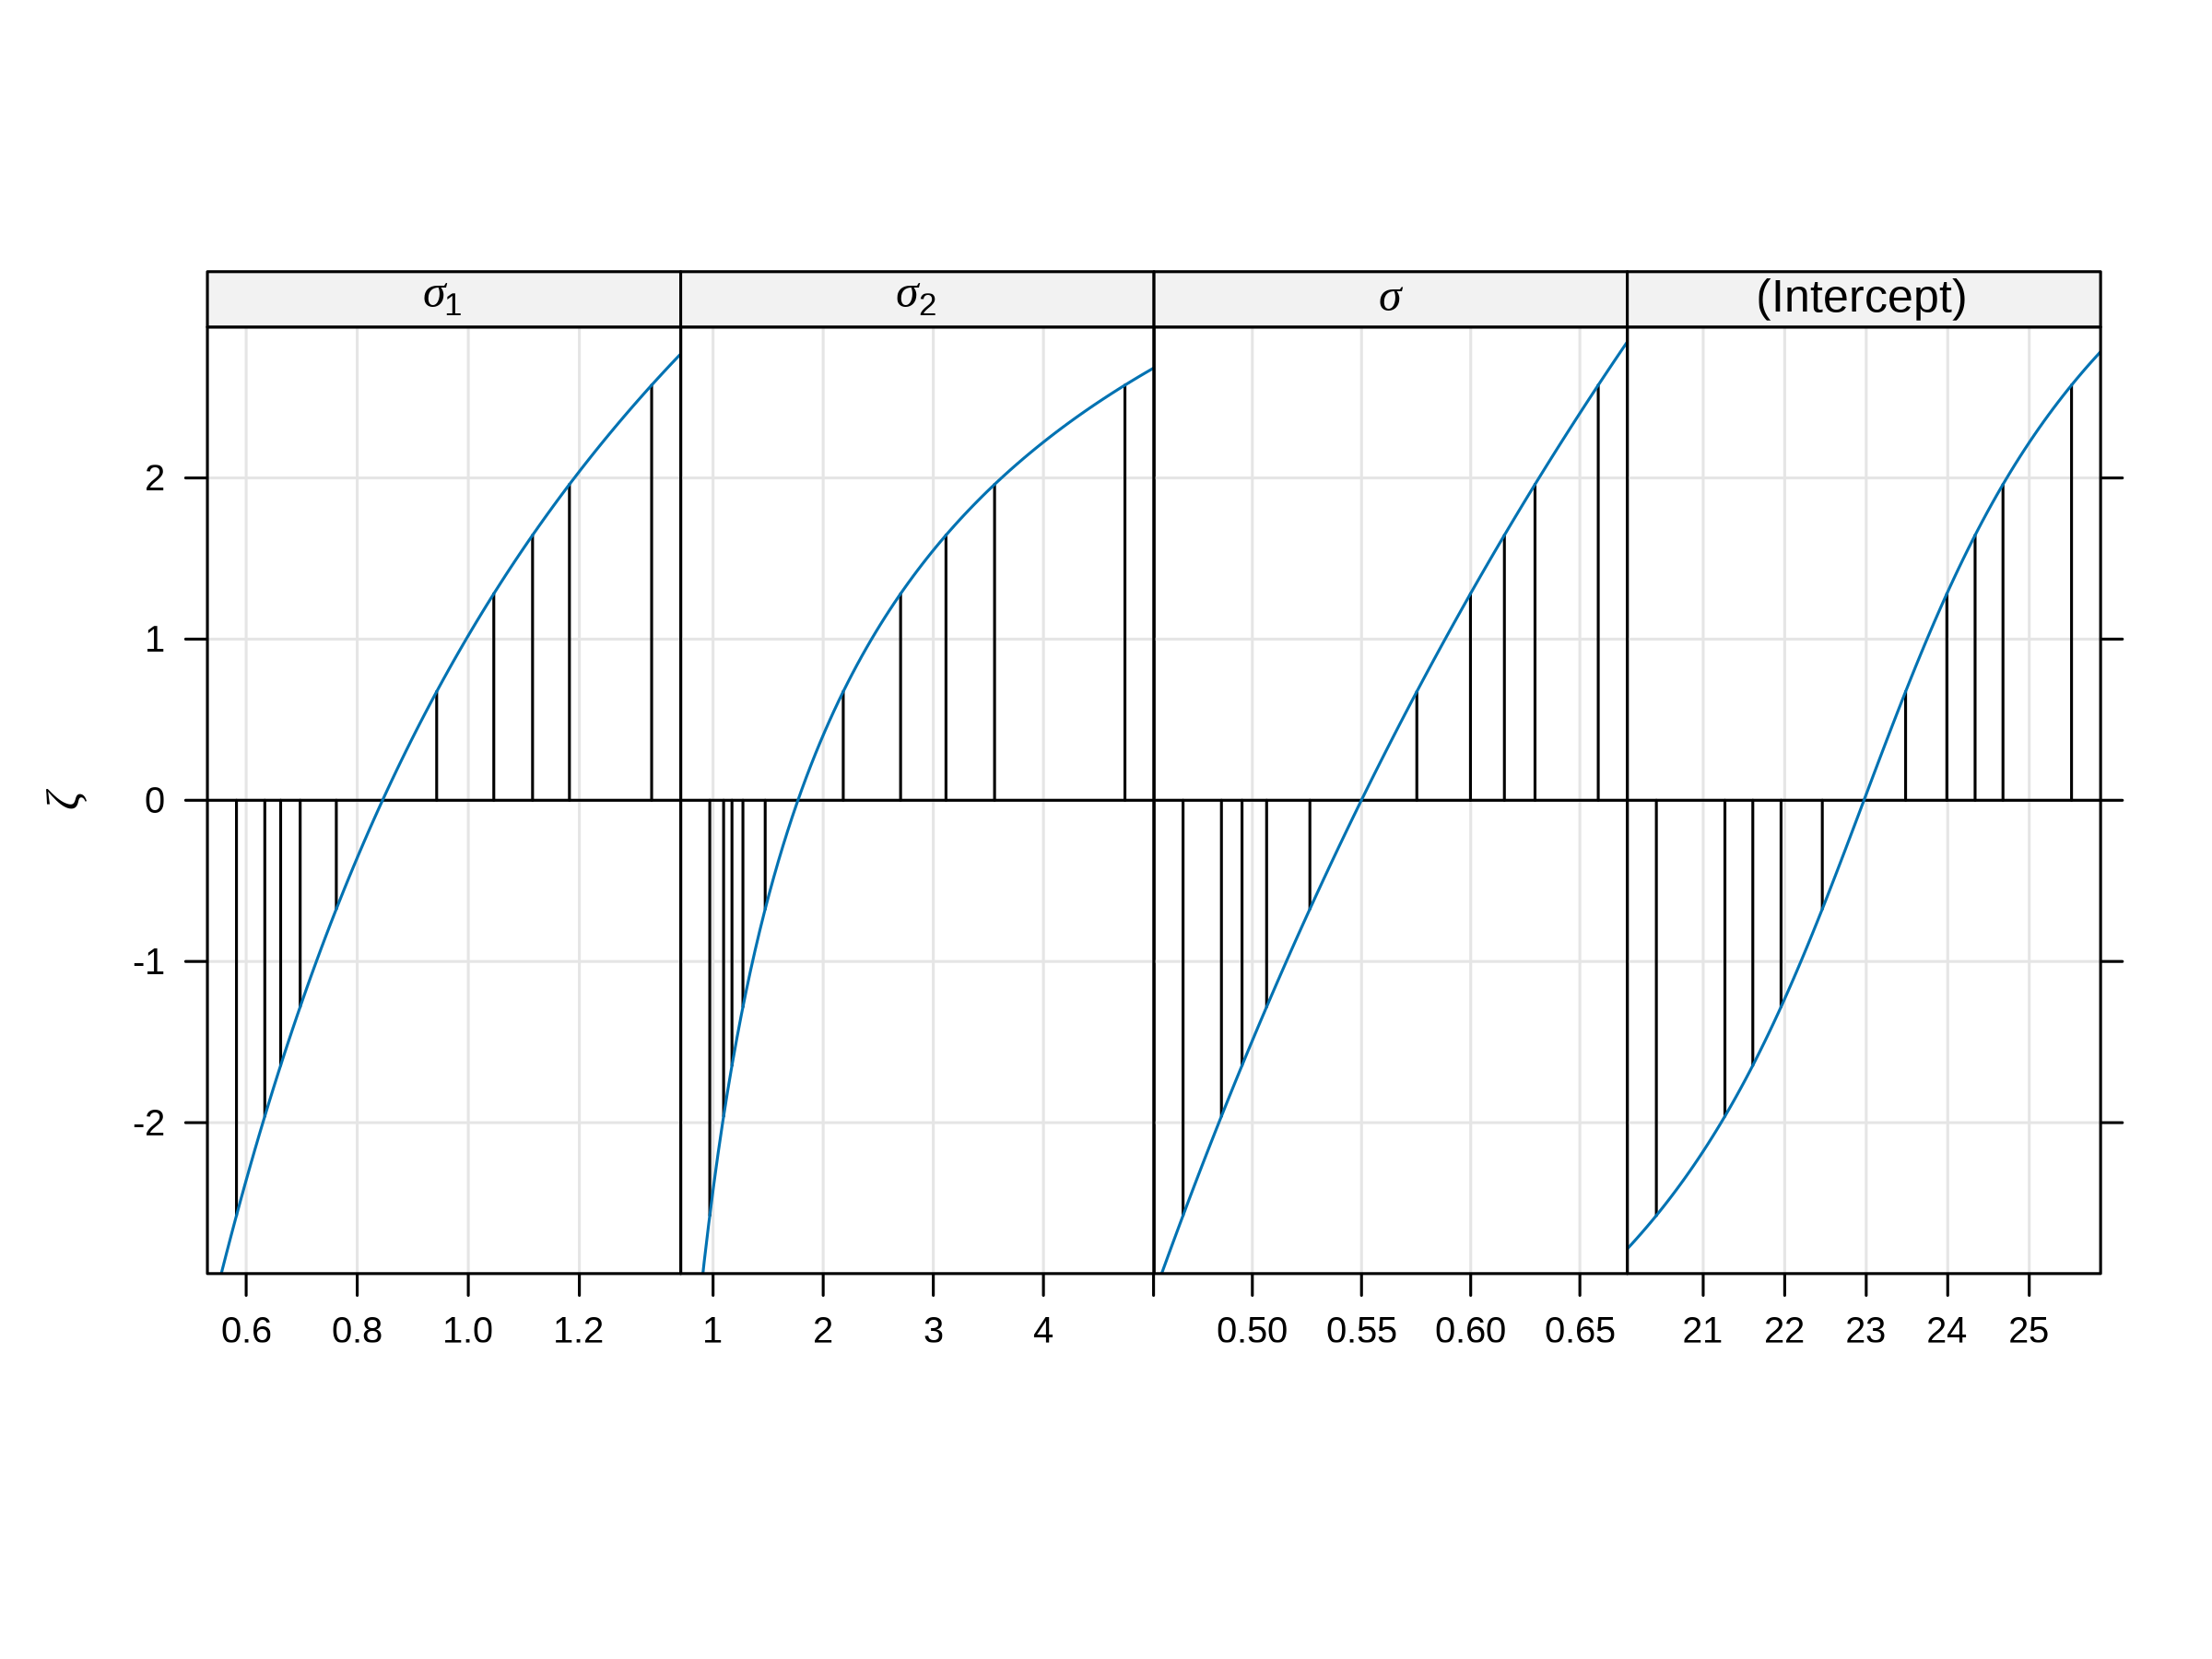

In [32]:
pr03 <- profile(fm03)
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
pr03 %>% xyplot(aspect = 2)
pr03 %>% confint()

In [33]:
fm03ML <- lmer(formula = diameter ~ 1 + (1 | plate) + (1 | sample), data = Penicillin, REML = FALSE)
fm03ML %>% summary()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: diameter ~ 1 + (1 | plate) + (1 | sample)
   Data: Penicillin

      AIC       BIC    logLik -2*log(L)  df.resid 
    340.2     352.1    -166.1     332.2       140 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.08031 -0.67227  0.06412  0.58356  2.97933 

Random effects:
 Groups   Name        Variance Std.Dev.
 plate    (Intercept) 0.7150   0.8456  
 sample   (Intercept) 3.1352   1.7706  
 Residual             0.3024   0.5499  
Number of obs: 144, groups:  plate, 24; sample, 6

Fixed effects:
            Estimate Std. Error t value
(Intercept)  22.9722     0.7446   30.85

In [34]:
pr03ML <- profile(fm03ML)
confint(pr03ML)
confint(pr03ML)[1:2,]/c(0.8455722, 1.770648)

2.5 %      97.5 %    
.sig01       0.6335660  1.1821040
.sig02       1.0957895  3.5562919
.sigma       0.4858454  0.6294535
(Intercept) 21.2666274 24.6778176

2.5 %     97.5 %  
.sig01 0.7492748 1.397993
.sig02 0.6188635 2.008469

The lack of precision comes from having the low number of levels of a factor. `sample` factor has 6 while `plate` has 24. In general it's not easy to estimate a measure of spread, i.e. std, than to estimate a measure of a location, i.e. mean. Six levels are abou the minimum number required for obtaining sensibles estimates of std for simple, scalar random effects terms.

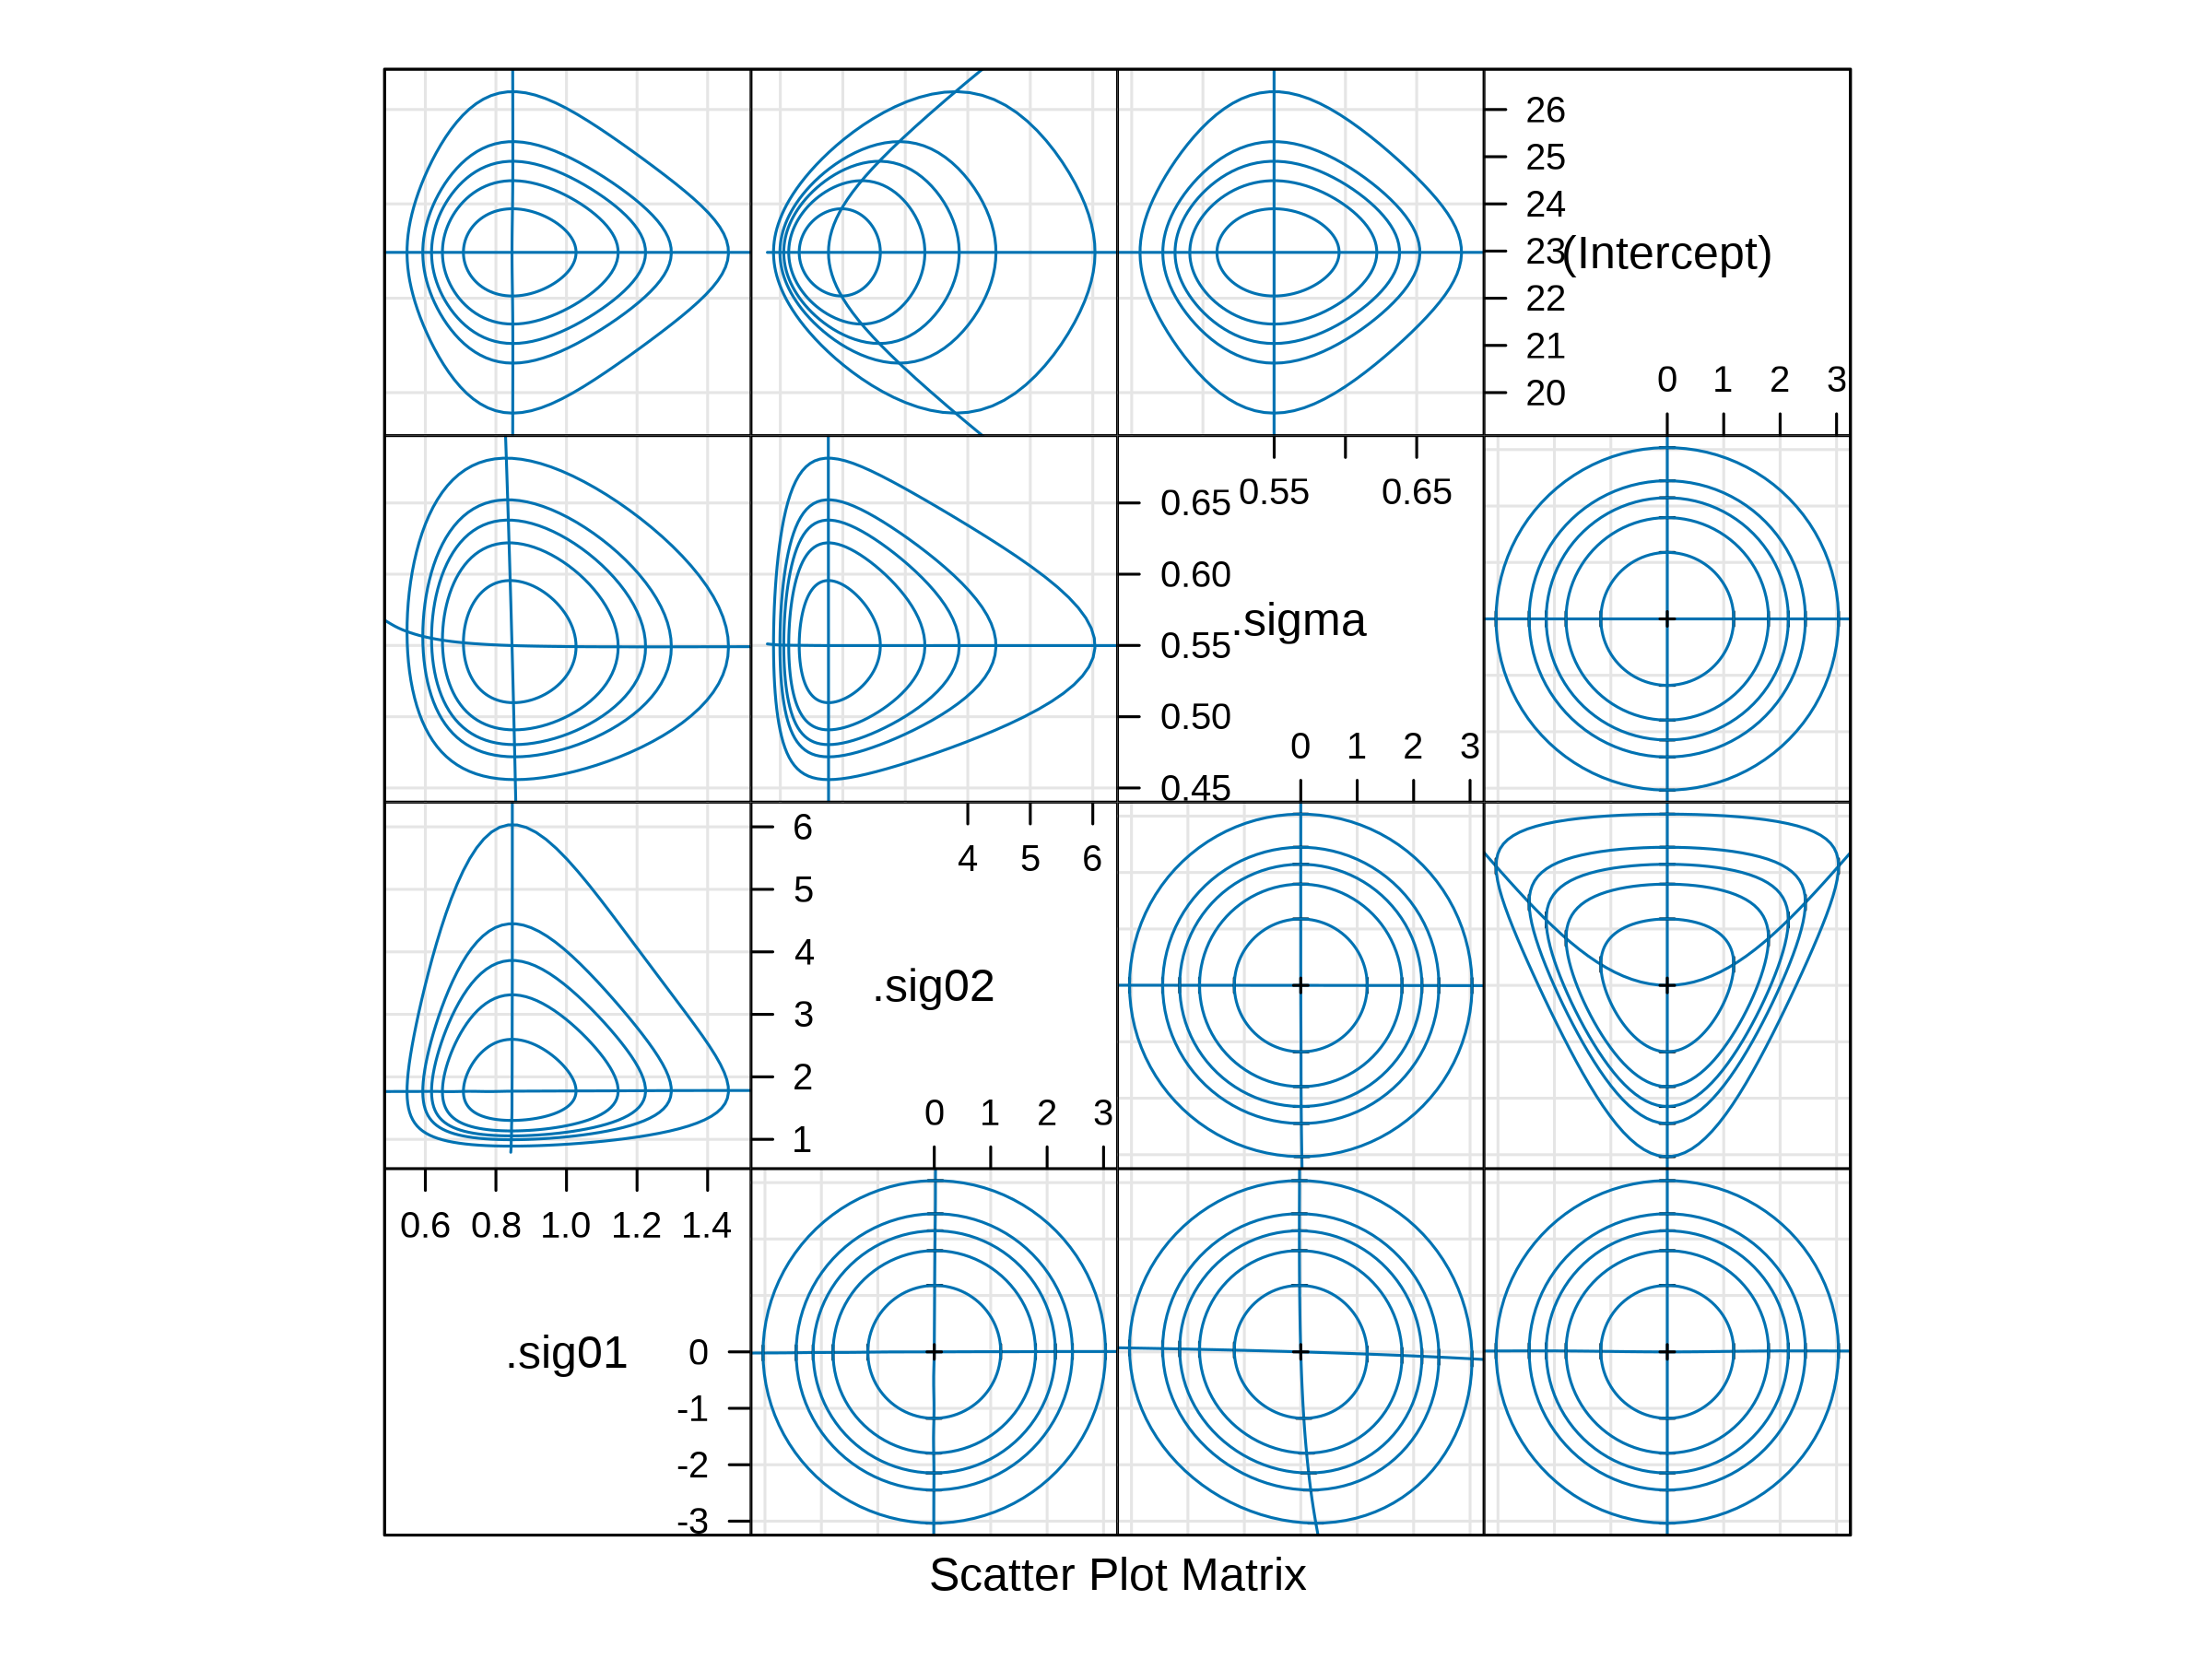

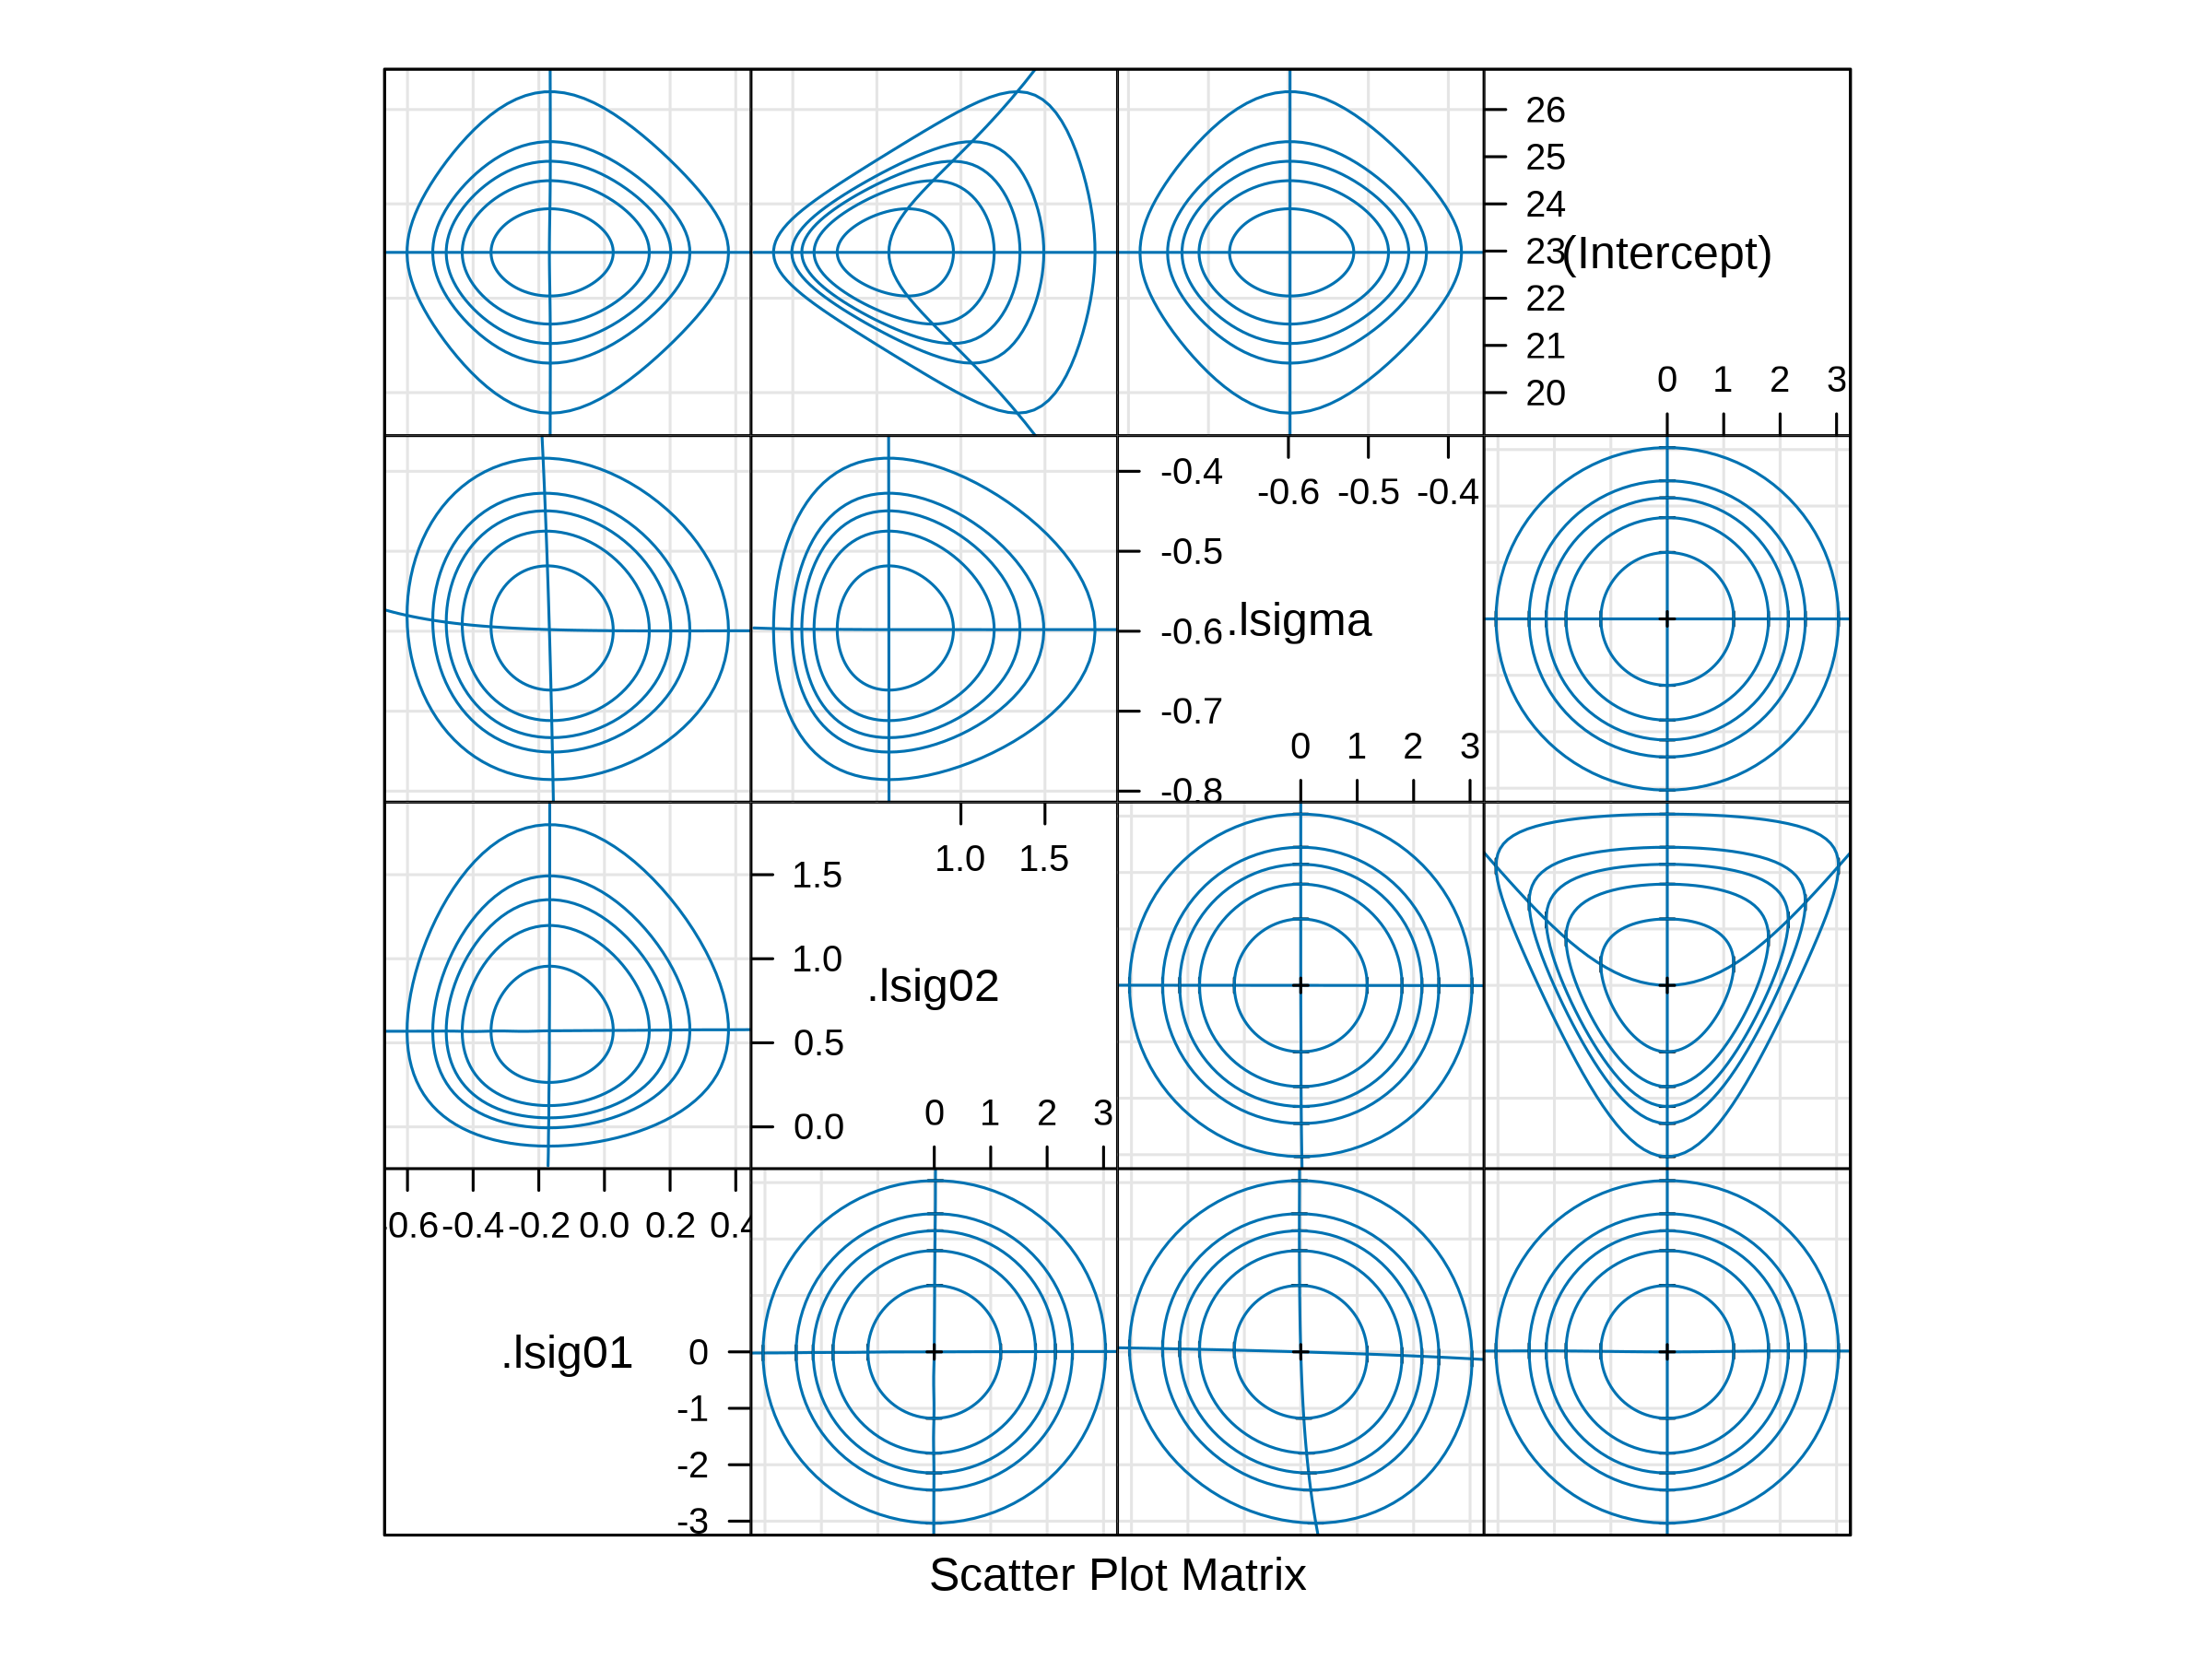

In [35]:
pr03ML %>% splom()
pr03ML %>% logProf() %>% splom()

#### Nested Random Effects

Warning message in data("Pastes", package = "MEMSS"):
“data set ‘Pastes’ not found”


'data.frame':	60 obs. of  4 variables:
 $ strength: num  62.8 62.6 60.1 62.3 62.7 63.1 60 61.4 57.5 56.9 ...
 $ batch   : Factor w/ 10 levels "A","B","C","D",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ cask    : Factor w/ 3 levels "a","b","c": 1 1 2 2 3 3 1 1 2 2 ...
 $ sample  : Factor w/ 30 levels "A:a","A:b","A:c",..: 1 1 2 2 3 3 4 4 5 5 ...


    strength         batch    cask       sample  
 Min.   :54.20   A      : 6   a:20   A:a    : 2  
 1st Qu.:57.50   B      : 6   b:20   A:b    : 2  
 Median :59.30   C      : 6   c:20   A:c    : 2  
 Mean   :60.05   D      : 6          B:a    : 2  
 3rd Qu.:62.88   E      : 6          B:b    : 2  
 Max.   :66.00   F      : 6          B:c    : 2  
                 (Other):24          (Other):48  

strength batch cask sample
1 62.8     A     a    A:a   
2 62.6     A     a    A:a   
3 60.1     A     b    A:b   
4 62.3     A     b    A:b   
5 62.7     A     c    A:c   
6 63.1     A     c    A:c

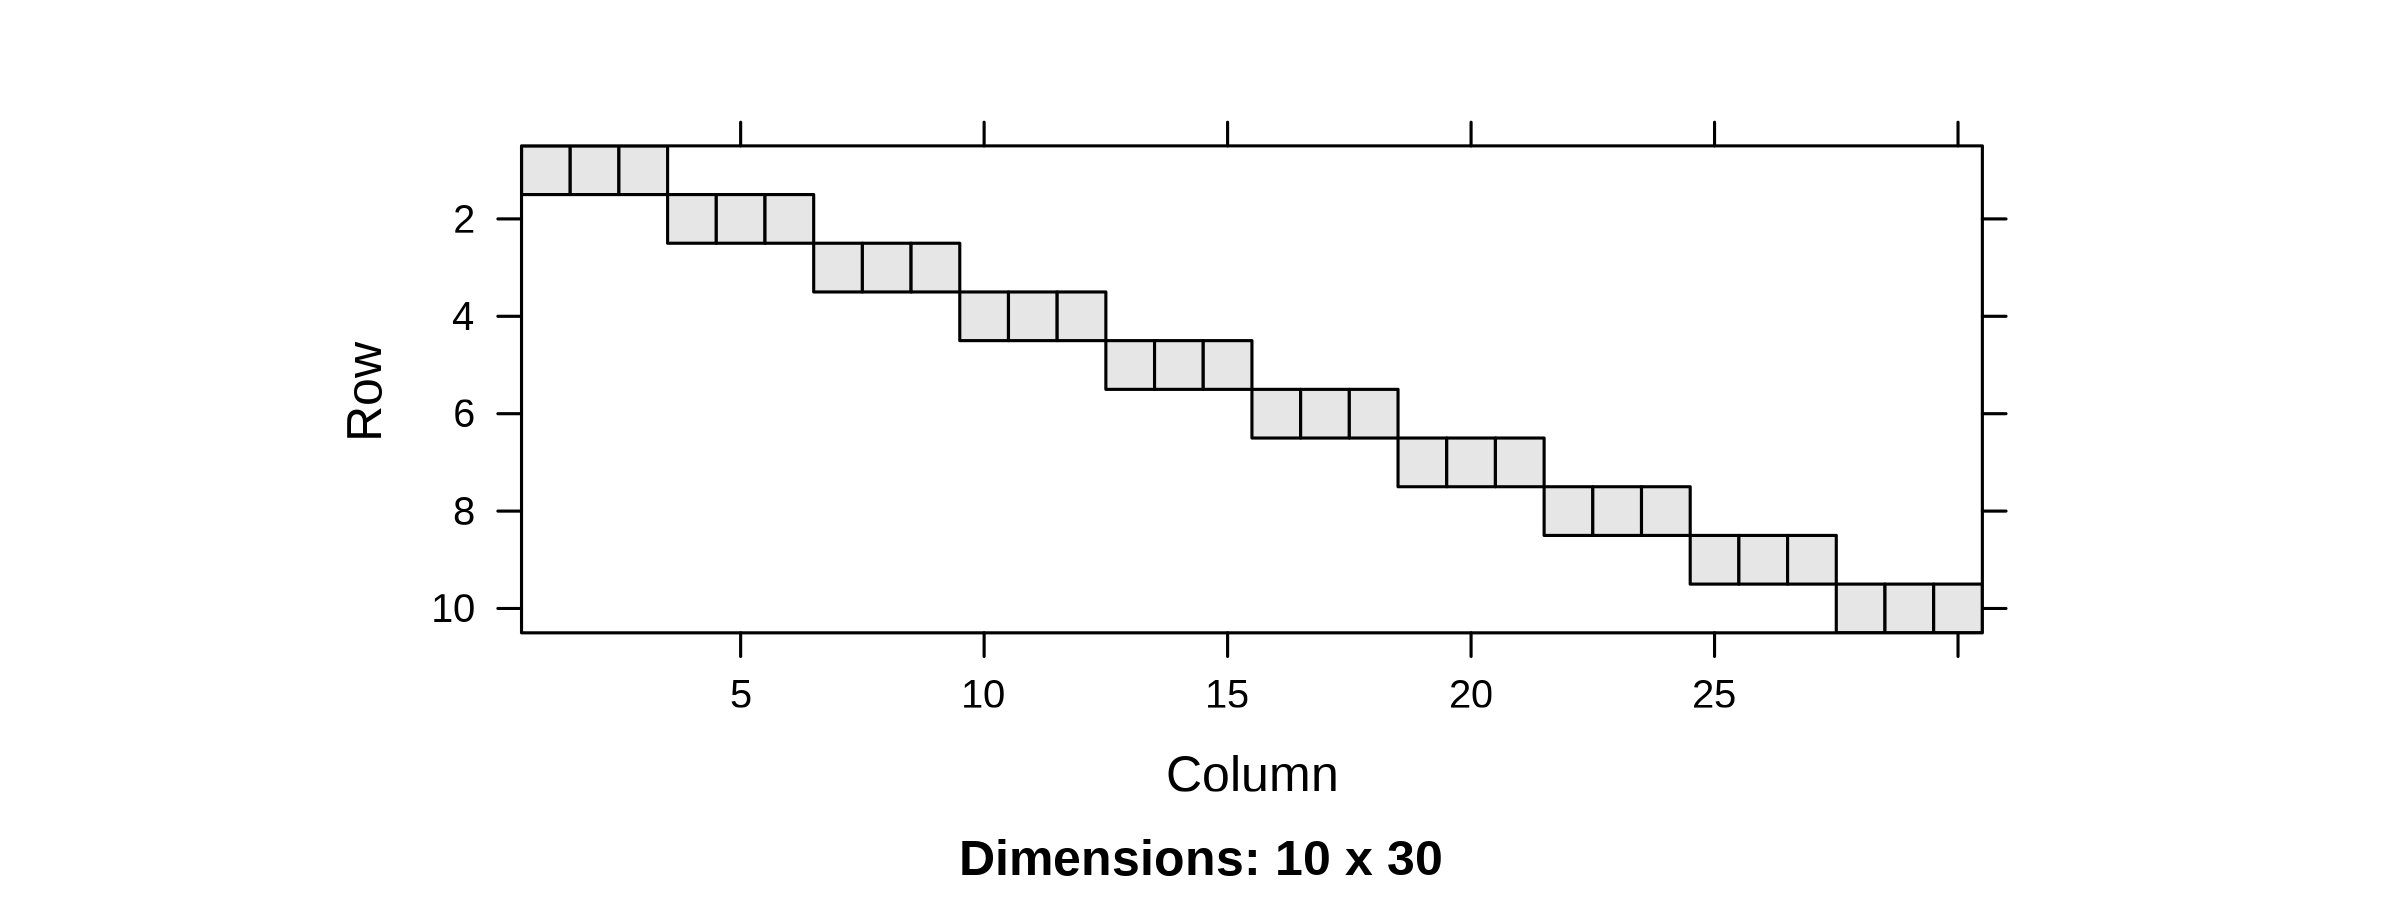

In [40]:
data("Pastes", package = "MEMSS")
Pastes %>% str()
Pastes %>% summary()
Pastes %>% head()
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
xtabs(~ batch + sample,data = Pastes, drop = TRUE, sparse = TRUE) %>% image()
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)

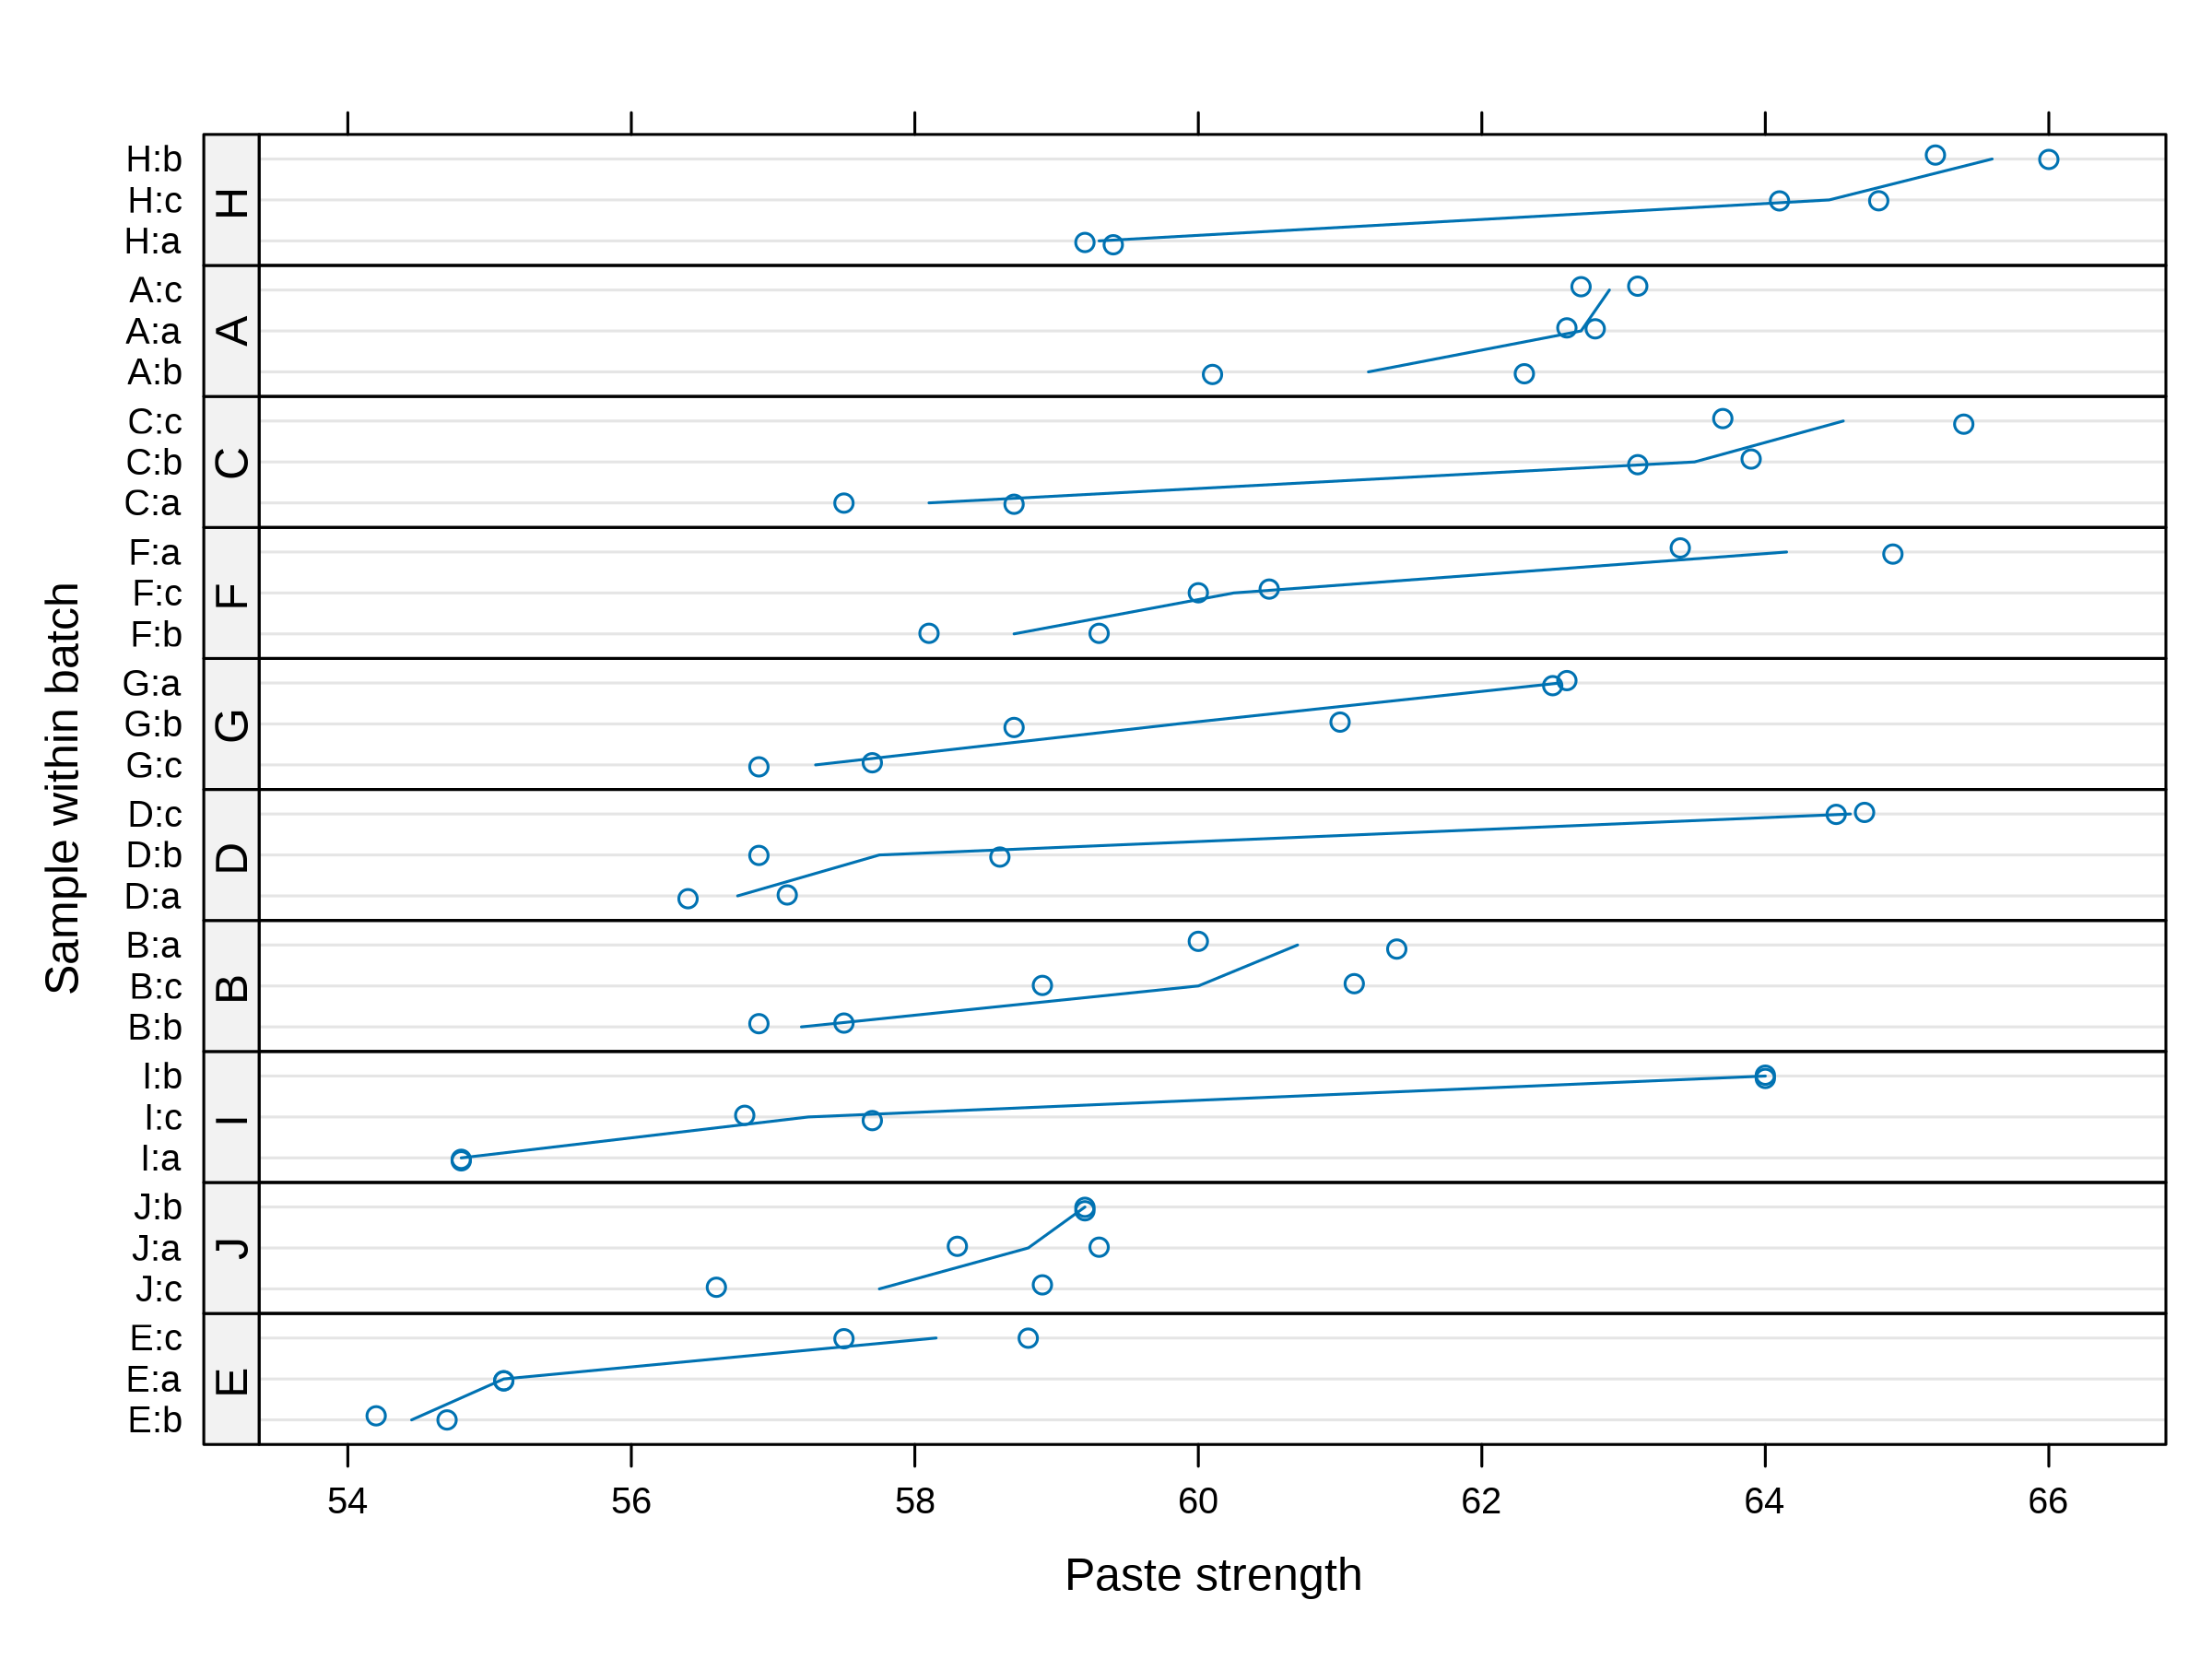

In [42]:
# TODO: Add sample with batch figure Pg. 36
pp <- Pastes
pp <- within(pp, bb <- reorder(batch, strength))
pp <- within(pp, ss <- reorder(reorder(sample, strength),
          as.numeric(batch)))
dotplot(ss ~ strength | bb, pp, pch = 21, strip = FALSE,
        strip.left = TRUE, layout = c(1, 10),
        scales = list(y = list(relation = "free")),
        ylab = "Sample within batch", type = c("p", "a"),
        xlab = "Paste strength", jitter.y = TRUE)

In [49]:
Pastes %>% xtabs (~ cask + batch, data = .)
Pastes <- Pastes %>% within(sample <- factor(batch:cask))
Pastes %>% head()

    batch
cask A B C D E F G H I J
   a 2 2 2 2 2 2 2 2 2 2
   b 2 2 2 2 2 2 2 2 2 2
   c 2 2 2 2 2 2 2 2 2 2

strength batch cask sample
1 62.8     A     a    A:a   
2 62.6     A     a    A:a   
3 60.1     A     b    A:b   
4 62.3     A     b    A:b   
5 62.7     A     c    A:c   
6 63.1     A     c    A:c

In [53]:
fm04ML <- lmer(
    formula = strength ~ 1 + (1 | batch) + (1 | sample),
    data = Pastes, 
    REML = FALSE
)
fm04ML %>% summary()

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: strength ~ 1 + (1 | batch) + (1 | sample)
   Data: Pastes

      AIC       BIC    logLik -2*log(L)  df.resid 
    256.0     264.4    -124.0     248.0        56 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.48467 -0.52624  0.01215  0.46735  1.38918 

Random effects:
 Groups   Name        Variance Std.Dev.
 sample   (Intercept) 8.434    2.9041  
 batch    (Intercept) 1.199    1.0951  
 Residual             0.678    0.8234  
Number of obs: 60, groups:  sample, 30; batch, 10

Fixed effects:
            Estimate Std. Error t value
(Intercept)  60.0533     0.6421   93.52

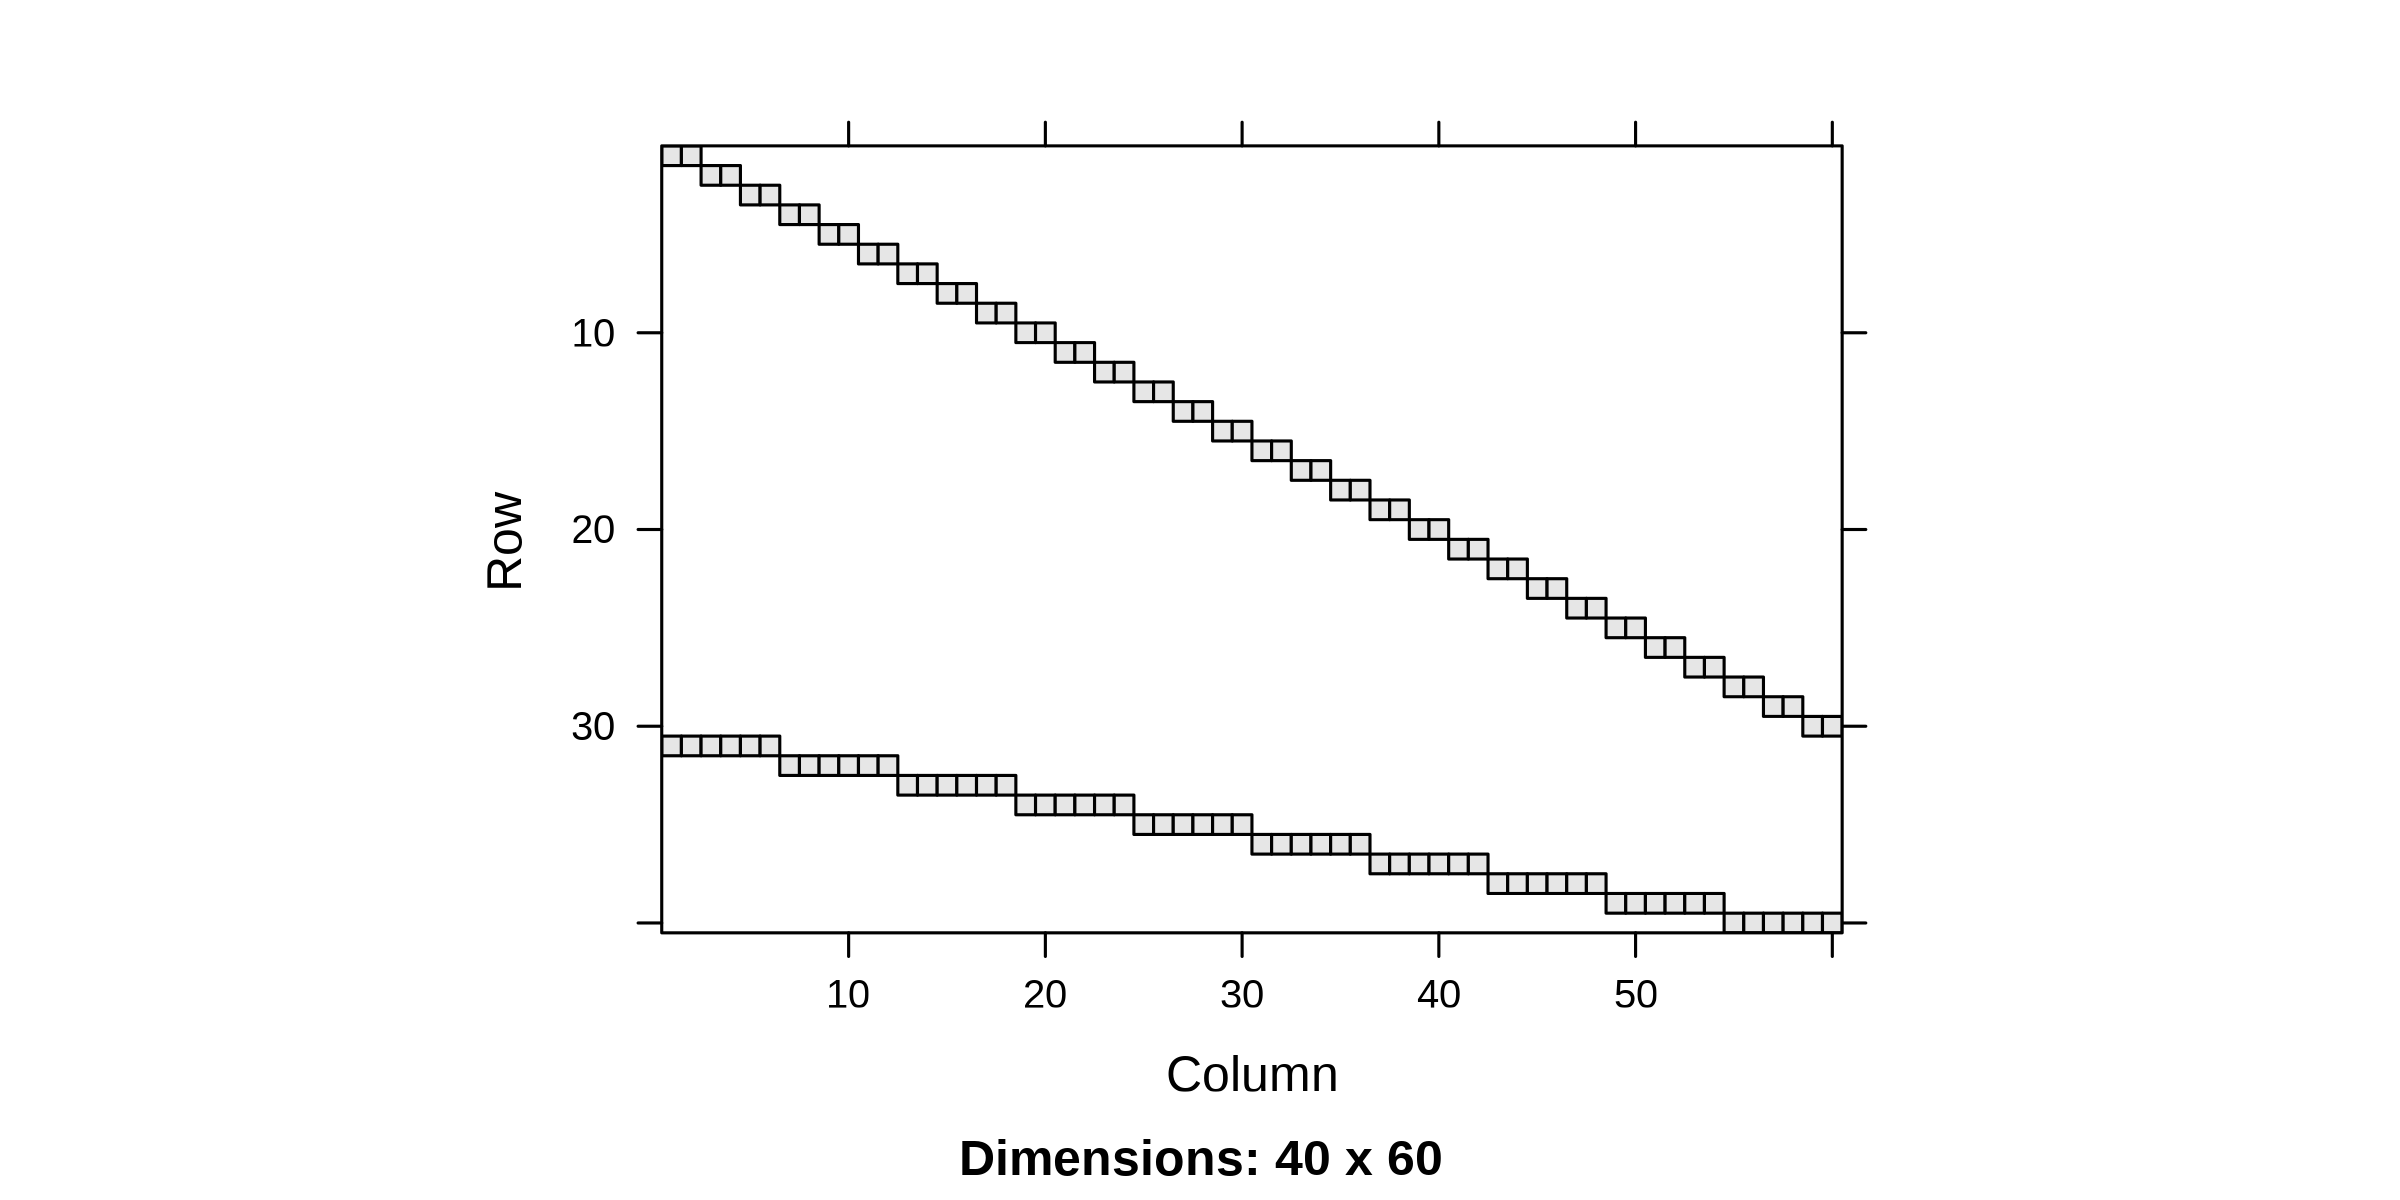

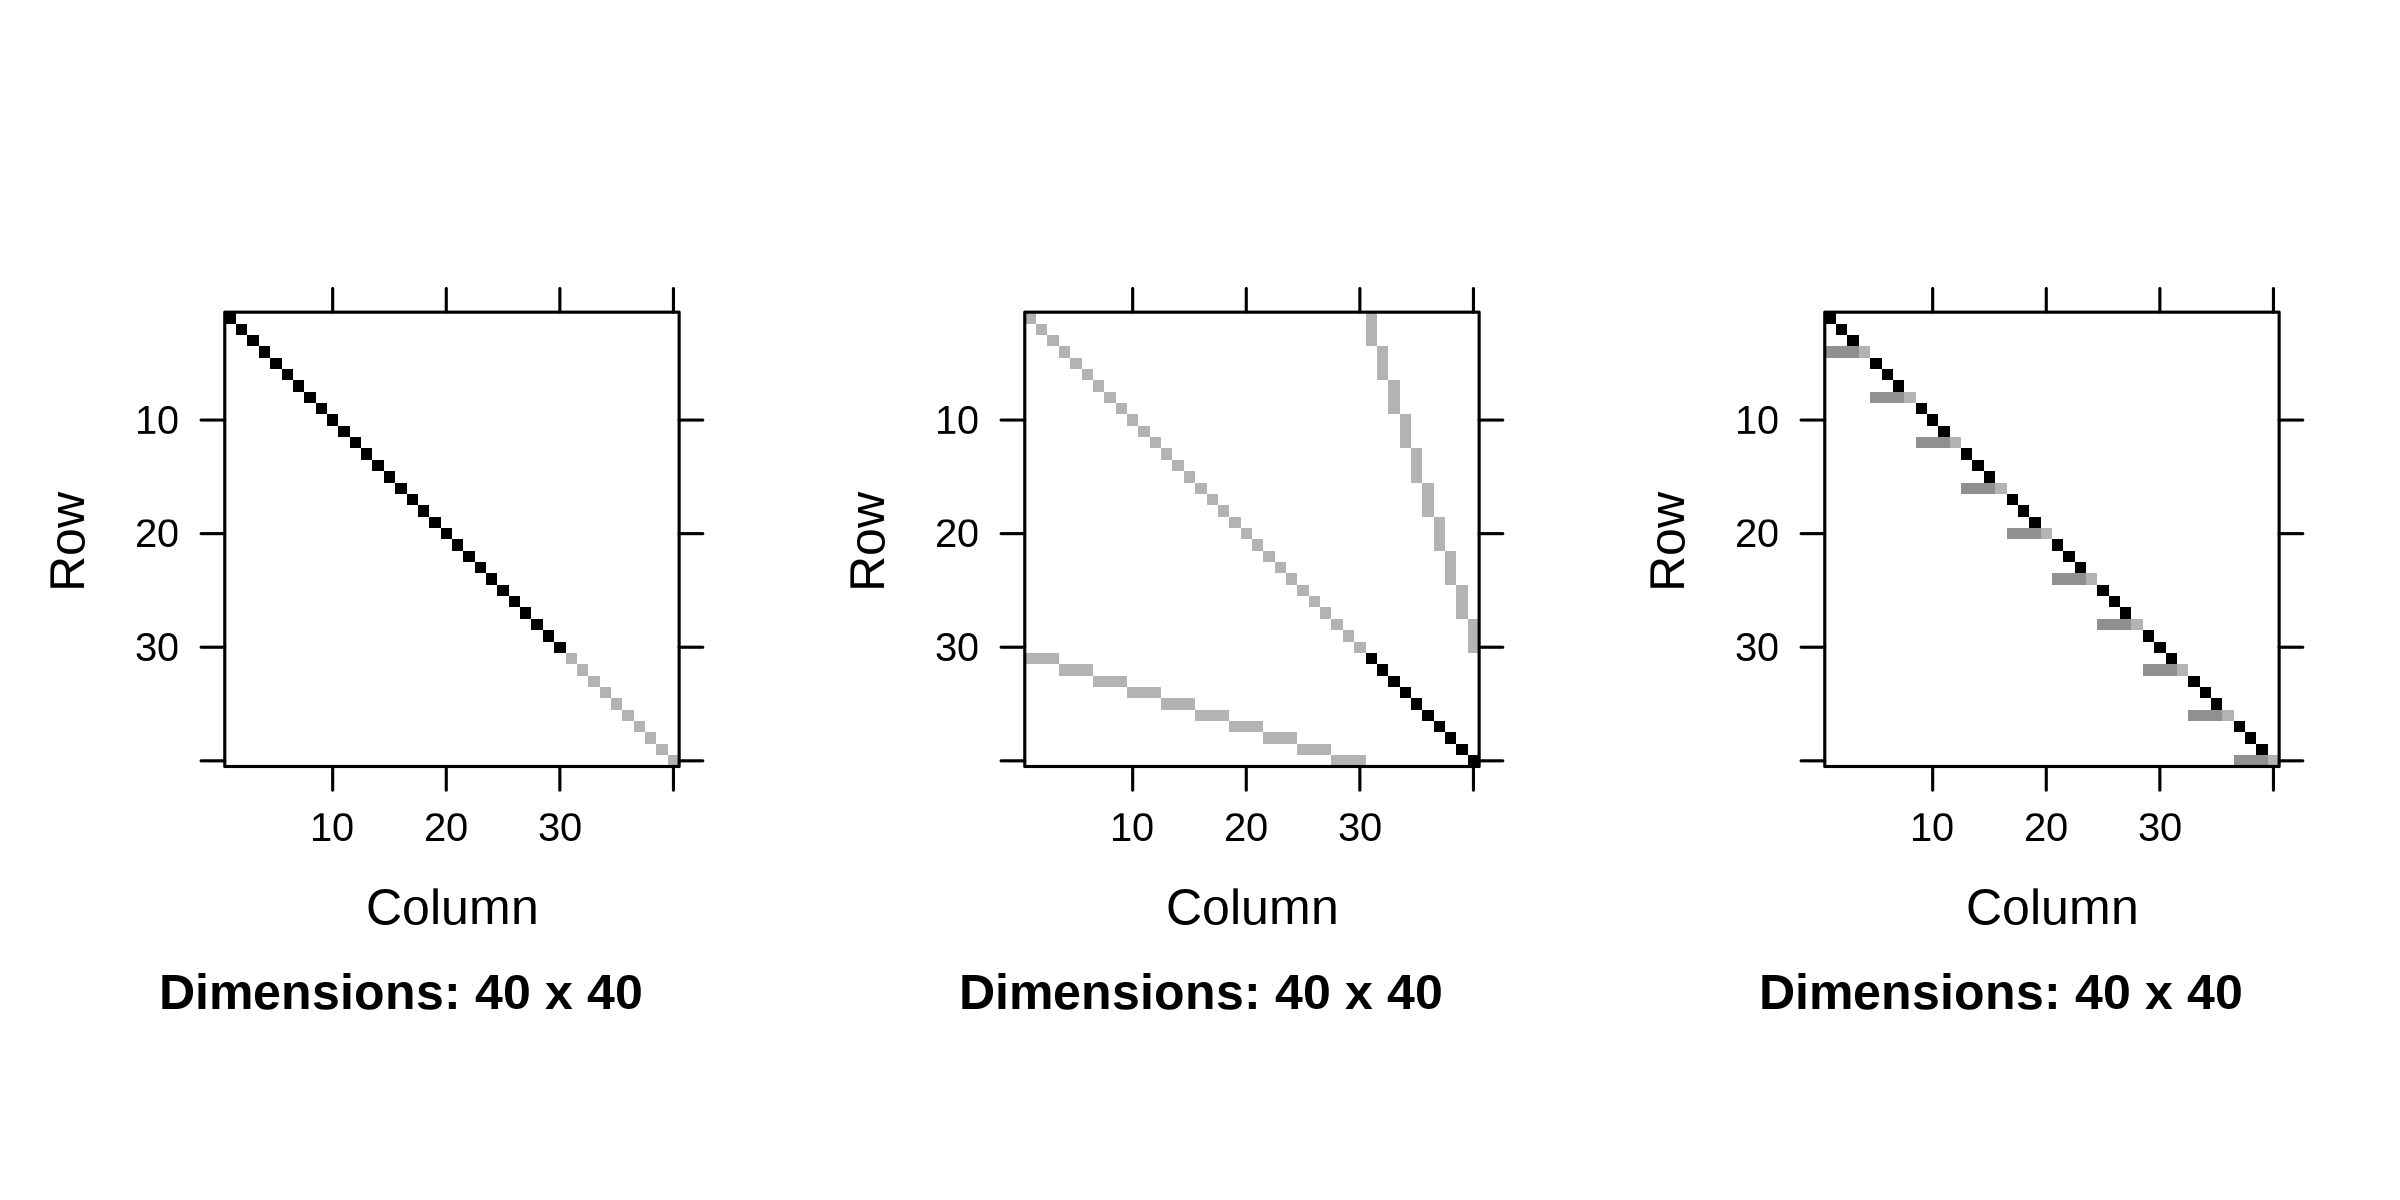

In [54]:

options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)
getME(fm04ML, "Z") %>% t() %>% image()
Z <- getME(fm04ML, "Z")
ZtZ <- t(Z) %*% Z

getME(fm04ML, "Lambda") %>% image() %>% print(split=c(1,1,3,1), more=TRUE)
ZtZ %>% image() %>% print(split=c(2,1,3,1), more = TRUE)
getME(fm04ML, "L") %>% image(colorkey = FALSE) %>% print(split=c(3,1,3,1))

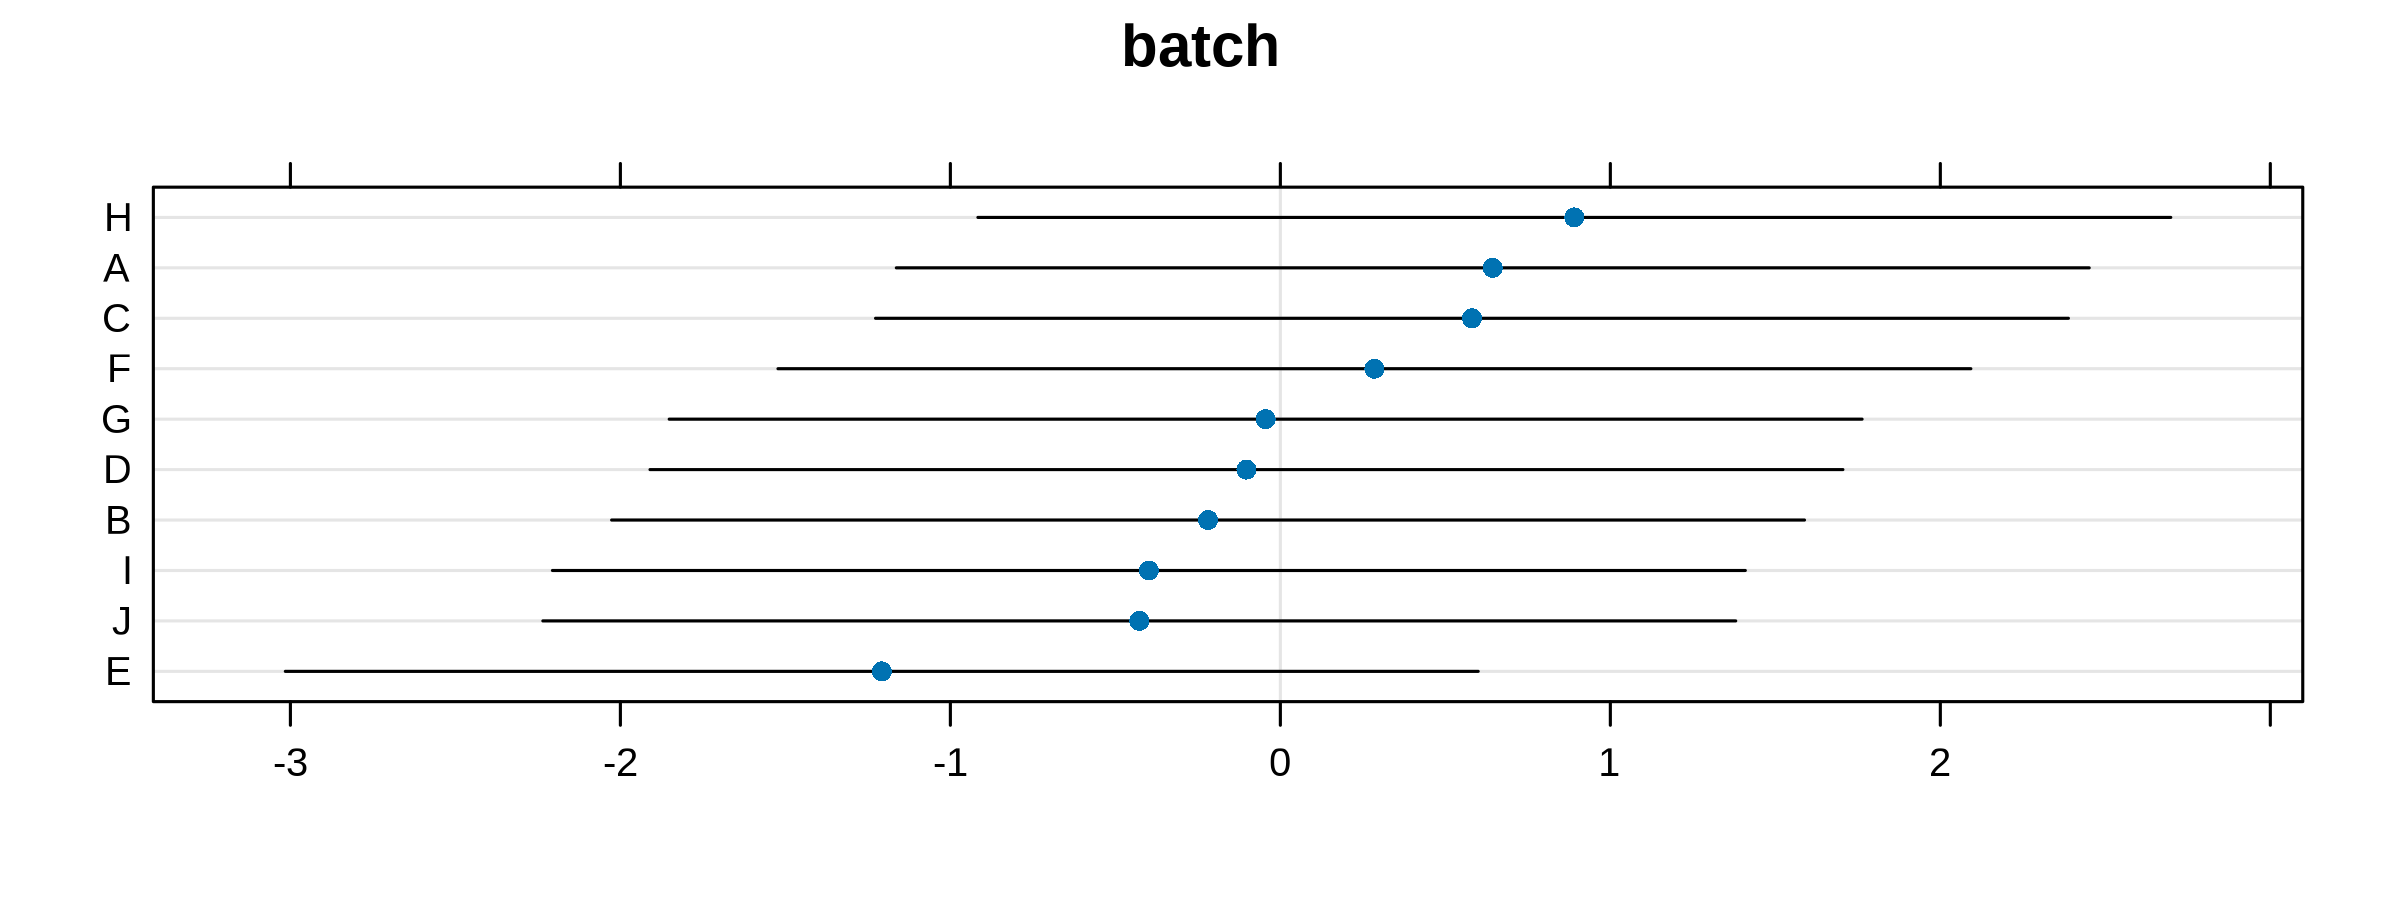

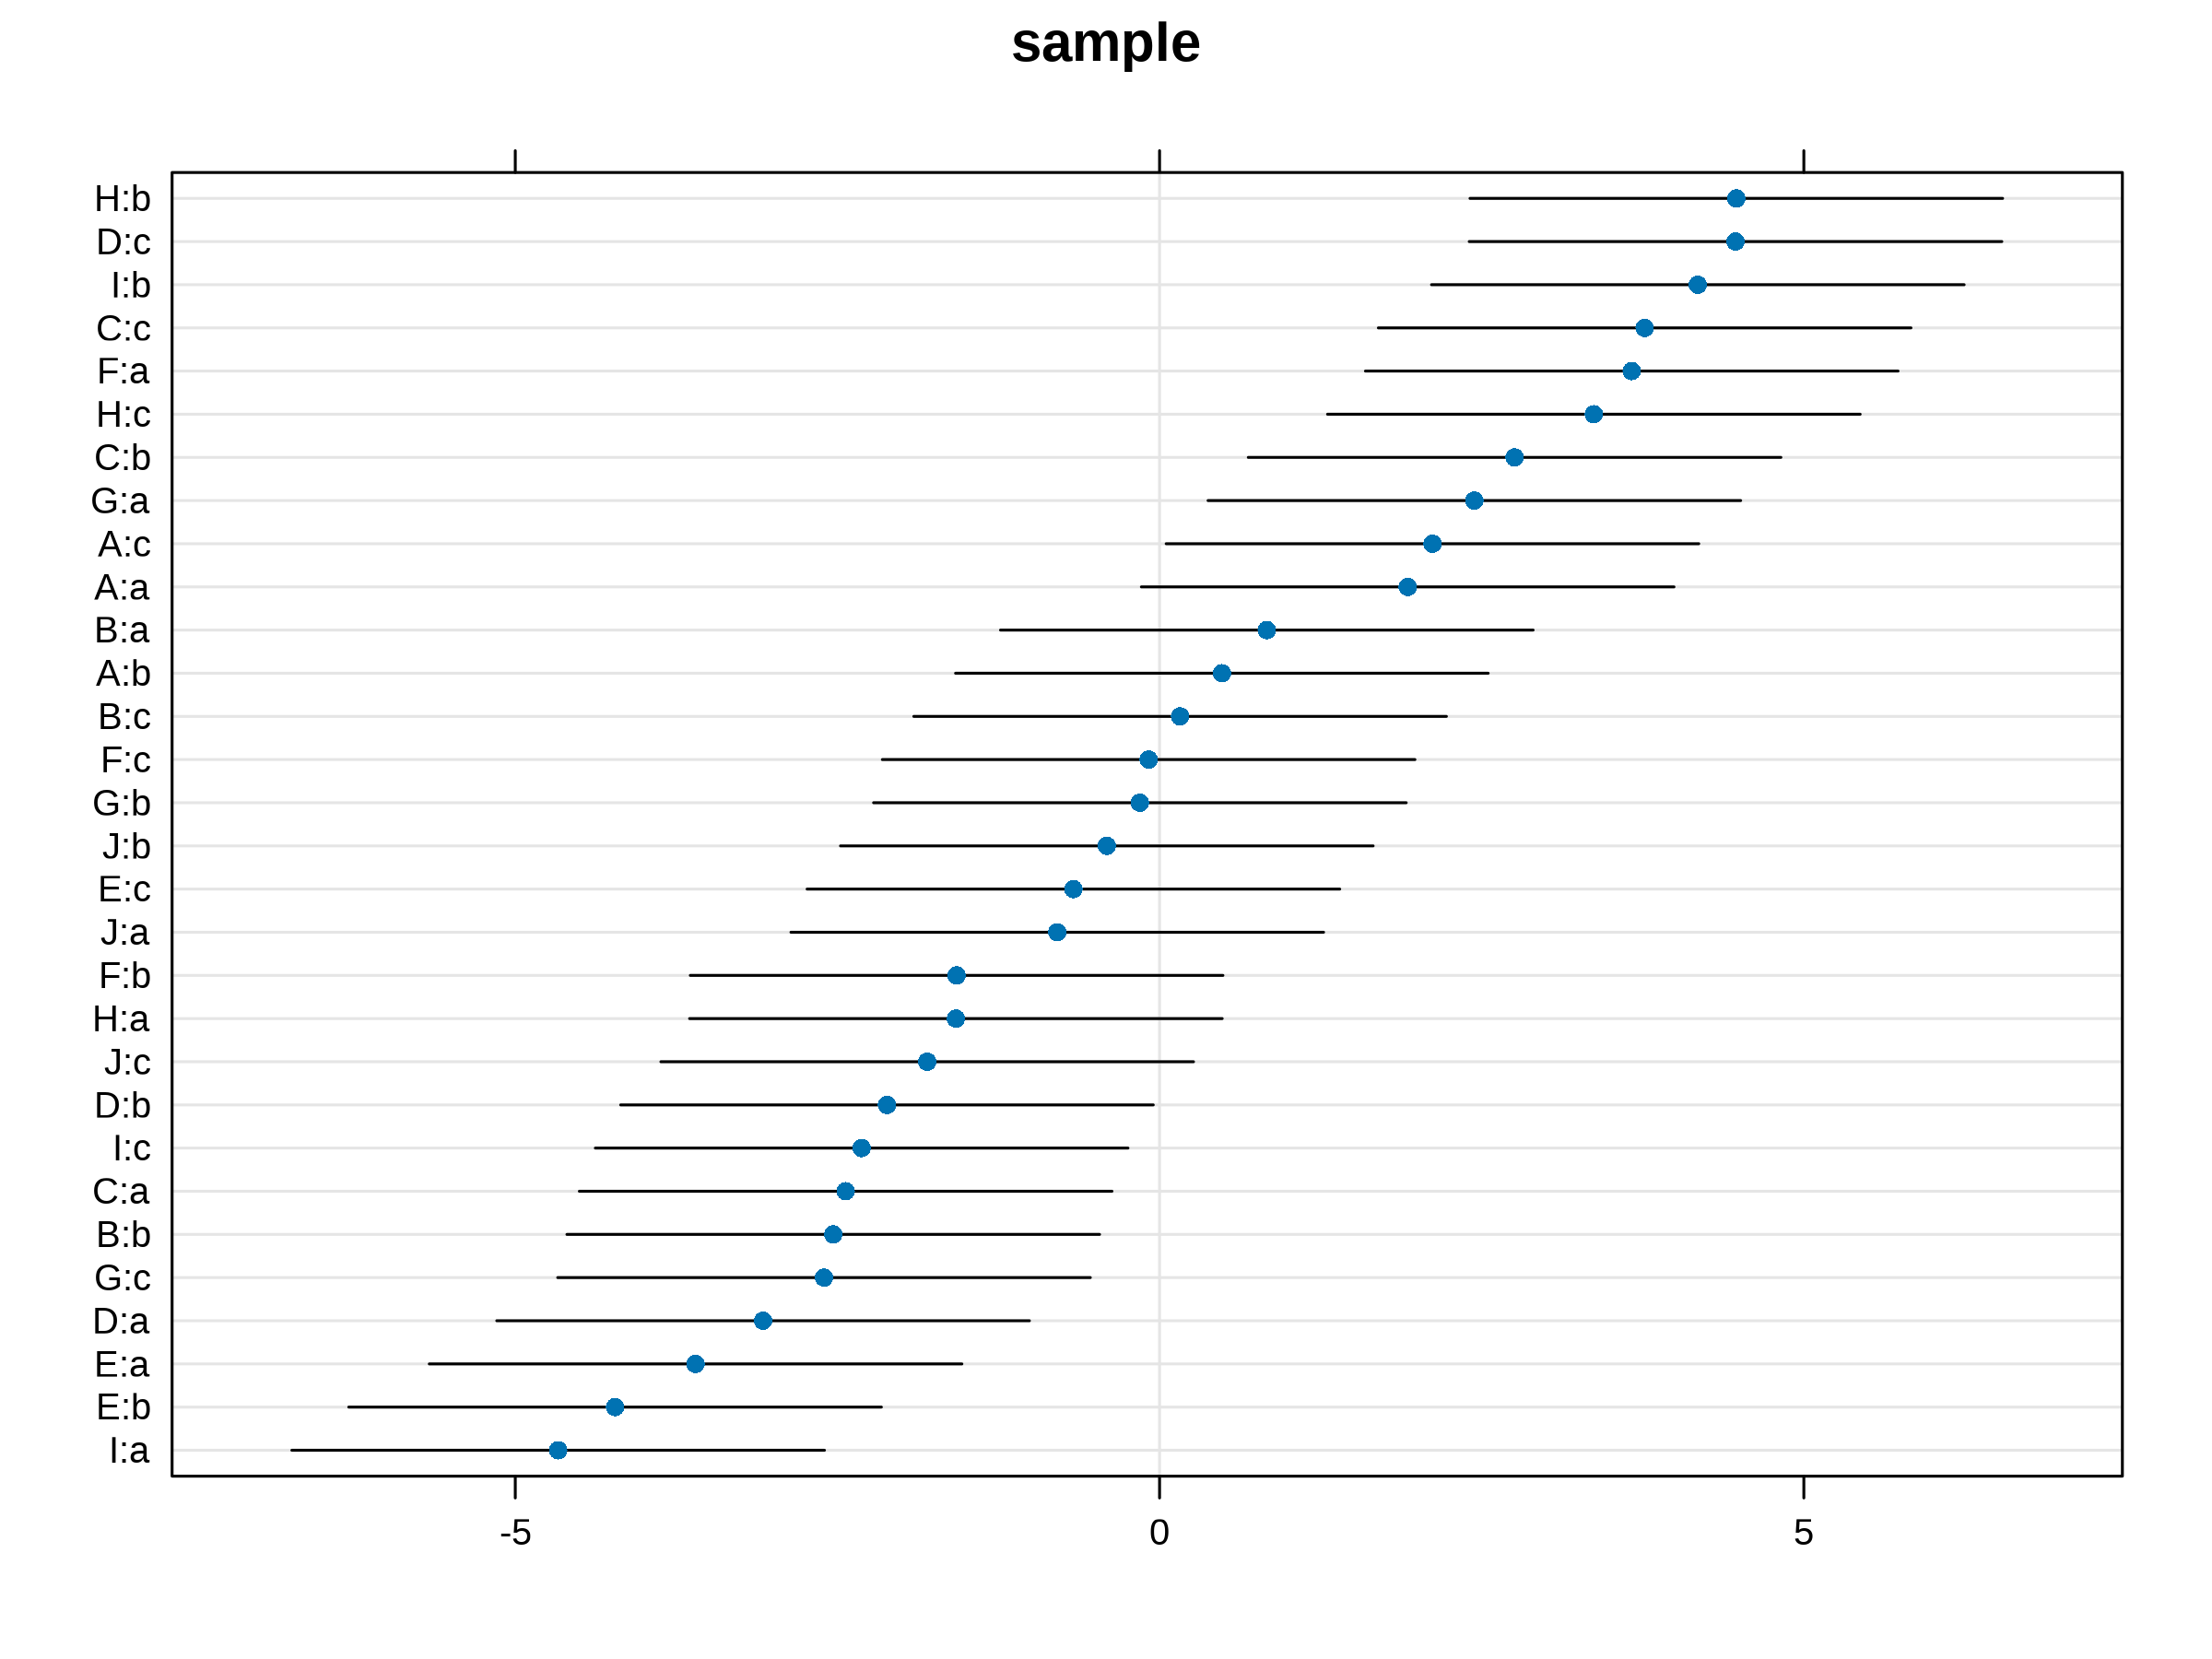

In [56]:
fm04ML_dotplots <- dotplot(ranef(fm04ML, condVar=TRUE), strip = FALSE)
options(repr.plot.width=8, repr.plot.height=3, repr.plot.res=300)
fm04ML_dotplots$batch
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
fm04ML_dotplots$sample

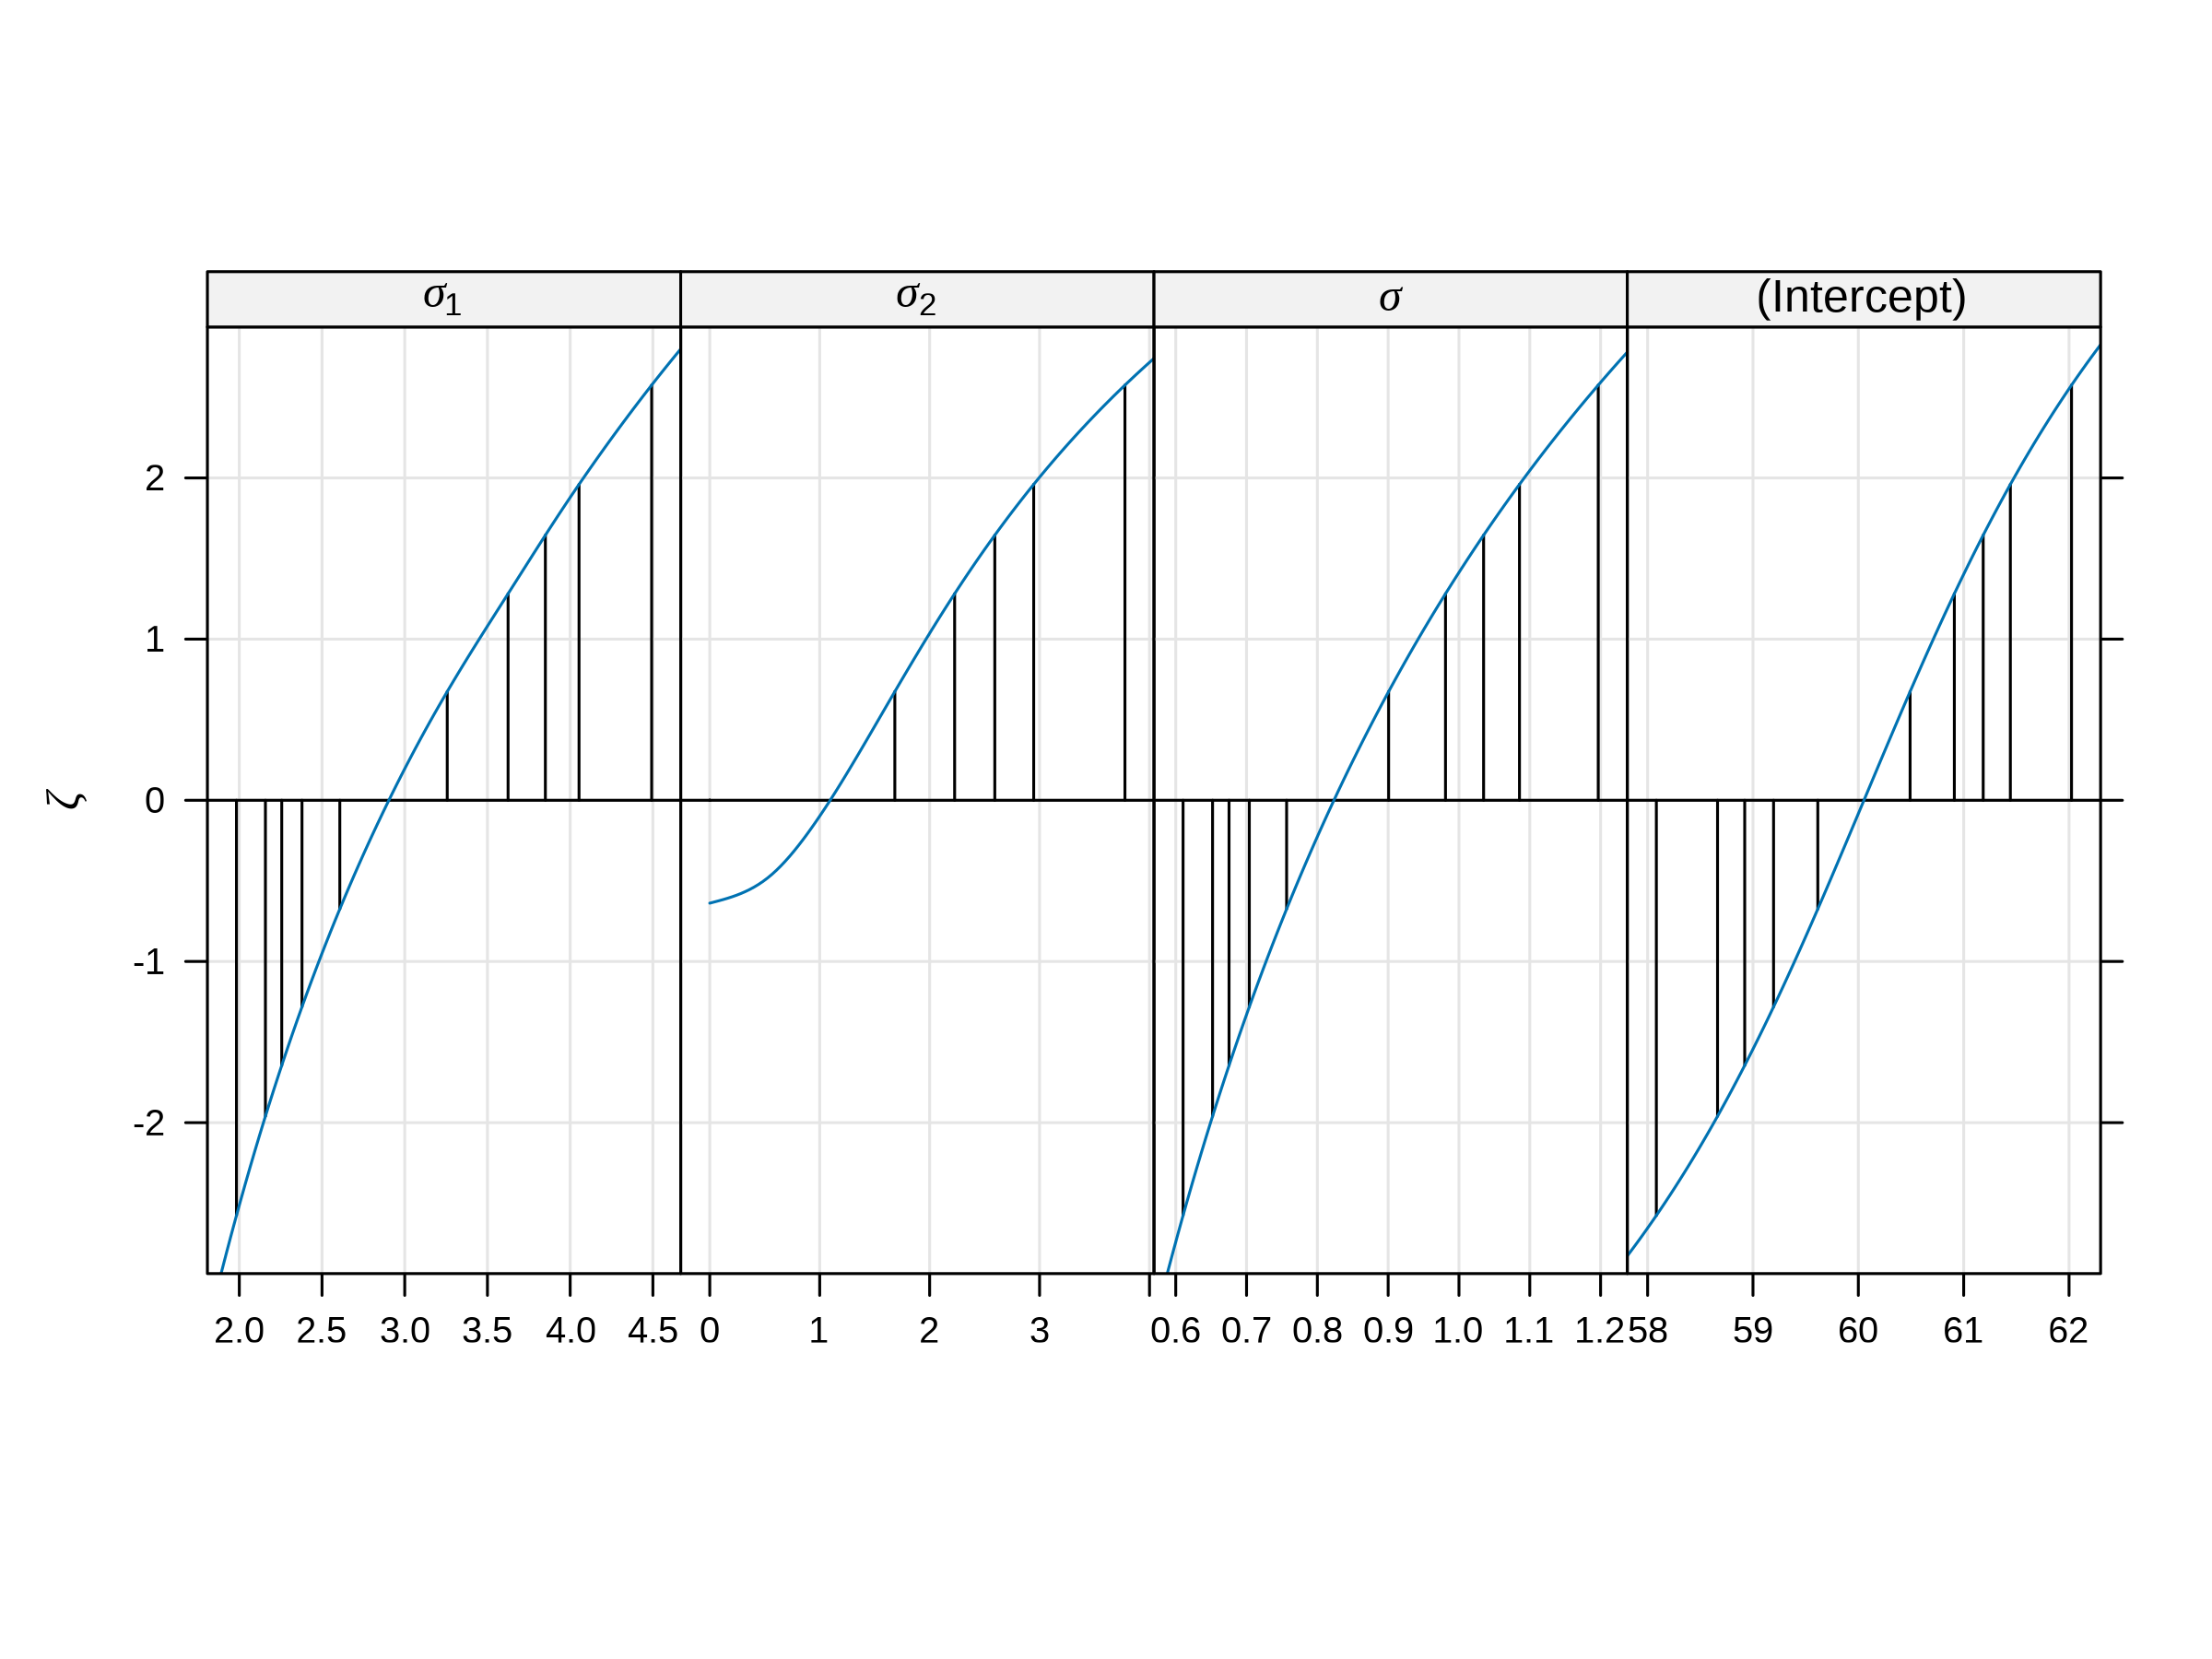

In [57]:
pr04ML <- profile(fm04ML)
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
pr04ML %>% xyplot(aspect = 2)

In [59]:
fm04MLa <- lmer(
    formula = strength ~ 1 + (1 | sample),
    data = Pastes, 
    REML = FALSE
)
fm04MLa %>% summary()
anova(fm04MLa, fm04ML)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: strength ~ 1 + (1 | sample)
   Data: Pastes

      AIC       BIC    logLik -2*log(L)  df.resid 
    254.4     260.7    -124.2     248.4        57 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.49173 -0.54158  0.01509  0.46195  1.38824 

Random effects:
 Groups   Name        Variance Std.Dev.
 sample   (Intercept) 9.633    3.1037  
 Residual             0.678    0.8234  
Number of obs: 60, groups:  sample, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept)  60.0533     0.5765   104.2

npar AIC      BIC      logLik    -2*log(L) Chisq     Df Pr(>Chisq)
fm04MLa 3    254.4017 260.6847 -124.2008 248.4017         NA NA        NA 
fm04ML  4    255.9945 264.3718 -123.9972 247.9945  0.4072339  1 0.5233768

#### Partially Crossed Random Effect

In [64]:
InstEval %>% str()
InstEval %>% summary()
InstEval %>% head()

'data.frame':	73421 obs. of  7 variables:
 $ s      : Factor w/ 2972 levels "1","2","3","4",..: 1 1 1 1 2 2 3 3 3 3 ...
 $ d      : Factor w/ 1128 levels "1","6","7","8",..: 525 560 832 1068 62 406 3 6 19 75 ...
 $ studage: Ord.factor w/ 4 levels "2"<"4"<"6"<"8": 1 1 1 1 1 1 1 1 1 1 ...
 $ lectage: Ord.factor w/ 6 levels "1"<"2"<"3"<"4"<..: 2 1 2 2 1 1 1 1 1 1 ...
 $ service: Factor w/ 2 levels "0","1": 1 2 1 2 1 1 2 1 1 1 ...
 $ dept   : Factor w/ 14 levels "15","5","10",..: 14 5 14 12 2 2 13 3 3 3 ...
 $ y      : int  5 2 5 3 2 4 4 5 5 4 ...


       s               d         studage   lectage   service        dept      
 2088   :   92   827    :  792   2:15406   1:20125   0:41638   12     : 9528  
 2410   :   89   1780   :  666   4:16888   2:16297   1:31783   11     : 8574  
 905    :   87   260    :  637   6:22107   3:10999             6      : 8097  
 1325   :   85   150    :  565   8:19020   4: 8638             4      : 6725  
 1331   :   84   2079   :  406             5: 6258             9      : 6624  
 1458   :   83   296    :  376             6:11104             3      : 4749  
 (Other):72901   (Other):69979                                 (Other):29124  
       y        
 Min.   :1.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :3.206  
 3rd Qu.:4.000  
 Max.   :5.000  
                

s d    studage lectage service dept y
1 1 1002 2       2       0       2    5
2 1 1050 2       1       1       6    2
3 1 1582 2       2       0       2    5
4 1 2050 2       2       1       3    3
5 2 115  2       1       0       5    2
6 2 756  2       1       0       5    4

In [67]:
fm05ML <- lmer(
    formula = y ~ 1 + (1 | s) + (1 | d) + (1 | dept:service),
    data = InstEval, 
    REML = FALSE
)
fm05ML %>% summary()


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y ~ 1 + (1 | s) + (1 | d) + (1 | dept:service)
   Data: InstEval

      AIC       BIC    logLik -2*log(L)  df.resid 
 237663.3  237709.3 -118826.6  237653.3     73416 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9941 -0.7474  0.0400  0.7721  3.1124 

Random effects:
 Groups       Name        Variance Std.Dev.
 s            (Intercept) 0.10541  0.3247  
 d            (Intercept) 0.26256  0.5124  
 dept:service (Intercept) 0.01213  0.1101  
 Residual                 1.38495  1.1768  
Number of obs: 73421, groups:  s, 2972; d, 1128; dept:service, 28

Fixed effects:
            Estimate Std. Error t value
(Intercept)  3.25521    0.02824   115.3

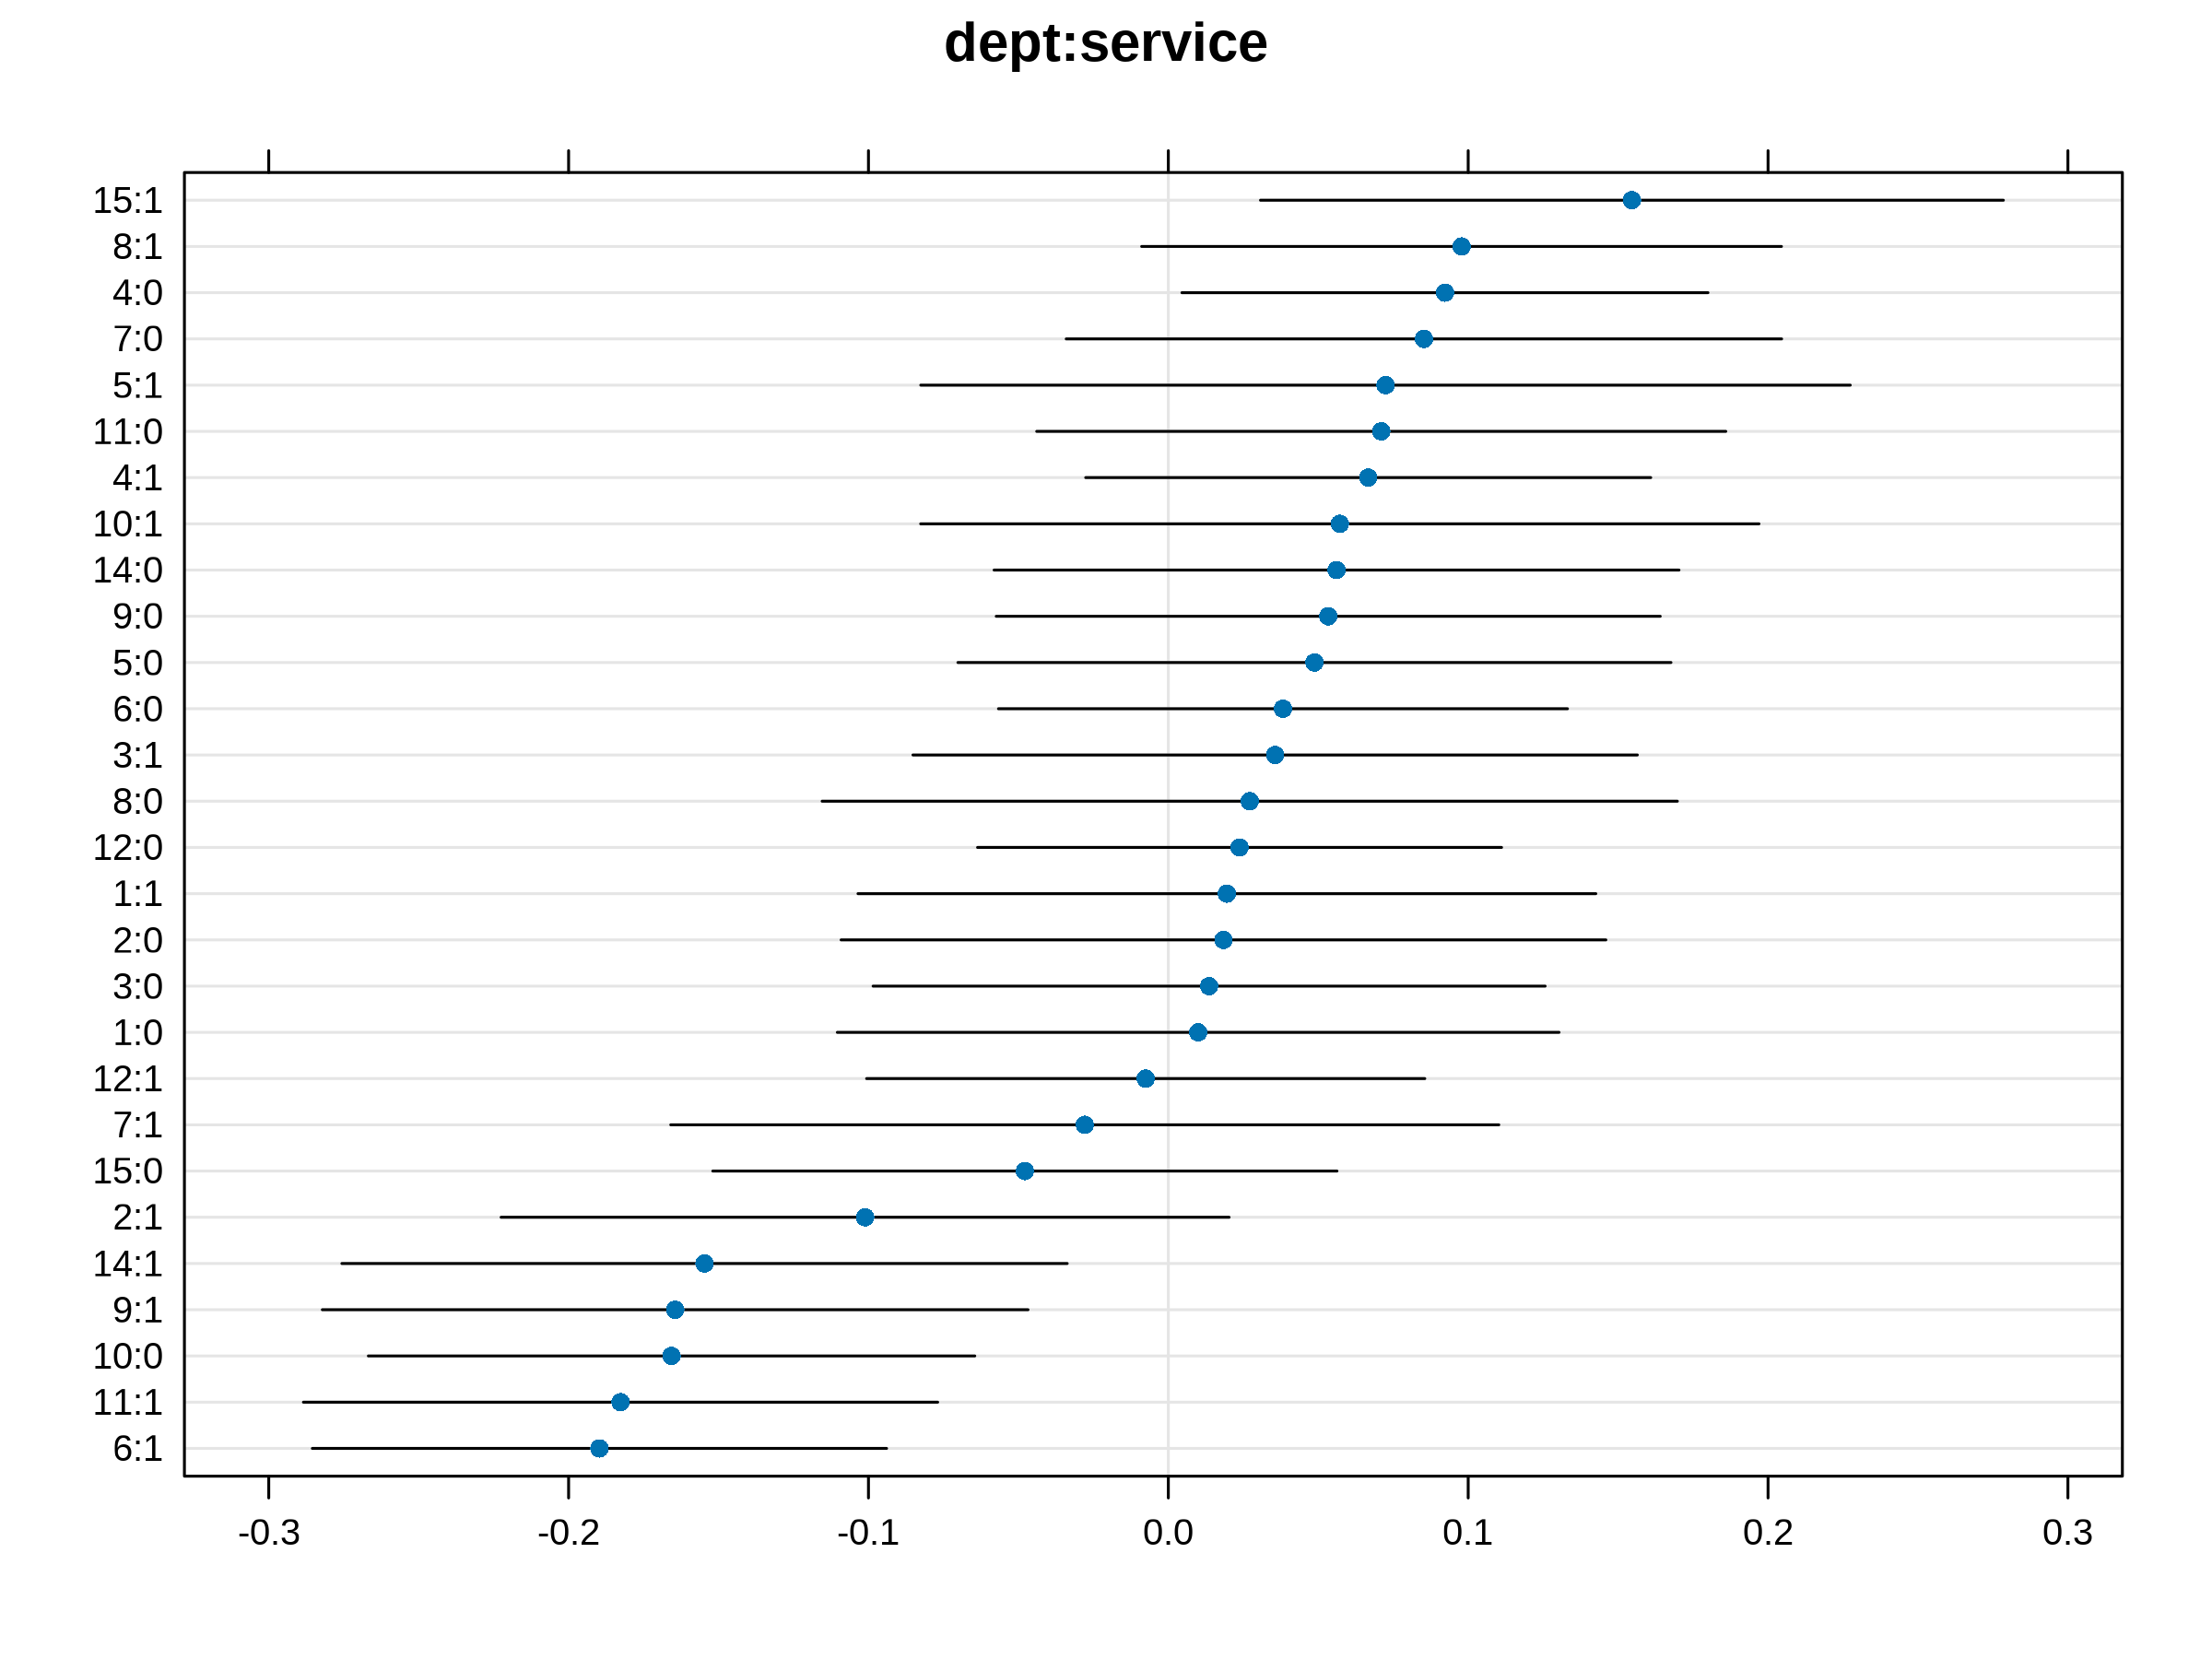

In [69]:
fm05ML_dotplots <- dotplot(ranef(fm05ML, condVar=TRUE), strip = FALSE)
options(repr.plot.width=8, repr.plot.height=6, repr.plot.res=300)
fm05ML_dotplots[["dept:service"]]

### Models for Longitudinal Data